In [1]:
import numpy as np
import configur
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import math
import heapq

In [2]:
tradeable = False

percentages = []
wouldve = []
profits = []
lengths = []
ticker_list = []
tickers = []
trade_counts = []

without_bests = []
profitable_trade_ratios = []
average_returns = []

new = [()]


In [3]:
# Smoothing with Wilder puts emphasis on recent values
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] # Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() # Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods # Wilder Smoothing
    return(Wilder)

In [4]:
def update():
    global profits    
    global lengths
    global maximum
    global percentages
    global wouldve
    global new
    global profitable_trades
    global nonprofitable_trades
    global profitable_trade_ratios
    global average_returns
    global without_bests
    global trade_counts
    global tickers
    global tradeable
    
    # Can run with any CSV in the same format as this one - check datasets directory
    path = r'C:\Users\amoog\Desktop\crypto_trader\datasets\companies1.csv'
    ticker_df = pd.read_csv(path)
    display(ticker_df.head(10))
    ticker_list = ticker_df.values.tolist()
    
    d = {'key': 'value'}
    ticker_list =['PACB', 'DSE', 'GSL', 'AEIS', 'SSY', 'RIBT', 'TATT', 'NNDM', 'UXIN', 'MRNA', 'NS', 'TV', 'DTEA', 'LKCO', 'CREG', 'SYTA', 'MSTR', 'WWE', 'ARCB', 'YTRA', 'VIAC', 'SPB', 'CTXR', 'RLGT', 'RNLX', 'MARA', 'BCOR', 'AINC', 'CYBE', 'MIE', 'MCHP', 'ADBE', 'PHD', 'PFSI', 'ALEC', 'GMS', 'HOLX', 'MMSI', 'CATO', 'ELY', 'DKNG', 'CTR', 'BSTZ', 'CPG', 'CBLI', 'NTNX', 'JPC', 'BCOV', 'BSQR', 'RFI', 'AVNW', 'VIACA', 'DISCK', 'SMM', 'KOD', 'MCS', 'THRY', 'CDOR', 'ZS', 'LPI', 'SI', 'HEAR', 'COKE', 'OKTA', 'CRC', 'KYMR', 'DFIN', 'RADI', 'FTHM', 'CCK', 'IBN', 'RDI', 'ACY', 'DB', 'TEGS', 'OCCI', 'UVV', 'ADSK', 'HROW', 'FDG', 'APPF', 'ASYS', 'ECF', 'NVRO', 'CRUS', 'ANSS', 'NICE', 'PFD', 'EW', 'DDOG', 'IRDM', 'NMTR', 'ID', 'GME', 'ROKU', 'HI', 'LPG', 'BOXL', 'SQ', 'CTLT', 'REKR', 'FIZZ', 'SPSC', 'JRO', 'EBON', 'MYJ', 'CDNS', 'SRV', 'SYX', 'HUBS', 'ANGI', 'MORN', 'NSTG', 'MDLA', 'GRFS', 'AGR', 'JNJ', 'SRAX', 'NET', 'FFC', 'TIPT', 'CL', 'SMPL', 'CDLX', 'CLWT', 'TWLO', 'NGMS', 'SESN', 'STAA', 'Z', 'NOVT', 'TEAF', 'GEVO', 'CYTHW', 'KDP', 'FSI', 'CALB', 'HQL', 'BXC', 'JJSF', 'GMAB', 'TRNO', 'CIDM', 'SWCH', 'BILL', 'USWS', 'ZUO', 'RYN', 'EXPR', 'ESSCU', 'VOSOU', 'PFO', 'MDB', 'ELTK', 'XYF', 'JFR', 'EXPO', 'EYES', 'UFPI', 'TAEQ', 'GILT', 'SNEX', 'SZC', 'INOV', 'ODP', 'NRK', 'SOHO', 'CE', 'CWEN', 'PTR', 'SNPS', 'RWLK', 'GLV', 'BERY', 'SWBI', 'OSH', 'CNSL', 'NRUC', 'ZG', 'IAA', 'PCTY', 'IVSG', 'FOCS', 'BST', 'TEF', 'GH', 'PD', 'WDAY', 'AES', 'SNFCA', 'SWI', 'TDF', 'RMBS', 'SULR', 'MODV', 'MMP', 'CVAC', 'CORE', 'FLC', 'TLRY', 'TPIC', 'QTWO', 'CHN', 'DISCA', 'PSAC', 'NQP', 'VVR', 'INSM', 'AVDG', 'SJR', 'NCV', 'MGIC', 'BFK', 'TWN', 'NAC', 'PFH', 'AEZS', 'PRO', 'CVEO', 'FGB', 'FMX', 'AAPL', 'SPGI', 'SXTC', 'EGHT', 'LIVKU', 'ABNB', 'NEO', 'SSP', 'NVDA', 'LEG', 'SRAC', 'COR', 'VVPR', 'PBPB', 'BAMH', 'AER', 'SAIC', 'PCI', 'ESTC', 'WTFCM', 'CLDR', 'GBLI', 'LAIX', 'NXTD', 'PANW', 'BYND', 'ALRM', 'DISH', 'NTRSO', 'SREA', 'OLED', 'UZD', 'DFHY', 'HFRO', 'EQH', 'PNW', 'EXC', 'GGT', 'AHT', 'FPAY', 'AWK', 'TWTR', 'HBM', 'CIG', 'WEA', 'NCA', 'FAMI', 'NCZ', 'WUGI', 'HPI', 'G', 'BFZ', 'IVDG', 'EUCG', 'SOJC', 'EBR']
    for t in ticker_list:
        try: 
            tradeable = False
            ticker = t
            # Gets data for backtesting
            df = yf.download(tickers=ticker, period = '1y', interval = '1d')

            df.drop(['Close'], axis=1, inplace=True)
            df['Close'] = df['Adj Close']
            close = df.iloc[-1, df.columns.get_loc('Adj Close')]
            tradeable = True
                
            if (tradeable):
                df['symbol'] = str(t).upper()
                # We are trying a 3 35 5 approach to begin with
                # First find the MACD and check if it is higher than the signal (bullish)
                df['ShortEMA'] = df.Close.transform(lambda x: x.ewm(span=5, adjust=False).mean())
                df['LongEMA'] = df.Close.transform(lambda x: x.ewm(span=35, adjust=False).mean())
                df['MACD'] = df.ShortEMA - df.LongEMA
                df['signal'] = df.MACD.transform(lambda x: x.ewm(span=5, adjust=False).mean())

                # Shifts in MACD and RVI are used to determine signal direction
                # All the necessary calculations for the RVI, including the RVI Signal (lot of shifting to get past data)
                df['open_shift'] = df.Open.shift(1)
                df['open_shift2'] = df.Open.shift(2)
                df['open_shift3'] = df.Open.shift(3)
                df['low_shift'] = df.Low.shift(1)
                df['low_shift2'] = df.Low.shift(2)
                df['low_shift3'] = df.Low.shift(3)
                df['numerator'] = ((1 * (df.Close - df.Open)) + (2 * (df.Close - df.open_shift)) + (2 * (df.Close - df.open_shift2)) + 
                                   (1 * (df.Close - df.open_shift3))) / 6
                df['denominator'] = (1 * (df.High - df.Low) + (2 * (df.High - df.low_shift)) + (2 * (df.High - df.low_shift2)) + 
                                   (1 * (df.High - df.low_shift3))) / 6
                df['SMA_numerator'] = df['numerator'].transform(lambda x: x.rolling(window = 10).mean())
                df['SMA_denominator'] = df['denominator'].transform(lambda x: x.rolling(window = 10).mean())   
                df['RVI'] = df['SMA_numerator'] / df['SMA_denominator']          
                df['rvishift'] = df.RVI.shift(1)
                df['rvishift2'] = df.RVI.shift(2)
                df['rvishift3'] = df.RVI.shift(3)
                df['RVI_Signal'] = ((1* df.RVI) + (2 * df.rvishift) + (2 * df.rvishift2) + (1*df.rvishift3)) / 6

                # ATR ratio and ADX is used to figure out a true range, for volatility and signal strength
                df['prev_close'] = df.groupby('symbol')['Close'].shift(1)
                df['TR'] = np.maximum((df['High'] - df['Low']), 
                                    np.maximum(abs(df['High'] - df['prev_close']), 
                                    abs(df['prev_close'] - df['Low'])))

                for i in df['symbol'].unique():
                    TR_data = df[df.symbol == i].copy()
                    df.loc[df.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
                    df.loc[df.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)
                df['ATR_Ratio'] = df['ATR_5'] / df['ATR_15']

                df['prev_high'] = df.groupby('symbol')['High'].shift(1)
                df['prev_low'] = df.groupby('symbol')['Low'].shift(1)
                df['+DM'] = np.where(~np.isnan(df.prev_high),
                                        np.where((df['High'] > df['prev_high']) & 
                        (((df['High'] - df['prev_high']) > (df['prev_low'] - df['Low']))), 
                                                                                df['High'] - df['prev_high'], 
                                                                                0),np.nan)
                df['-DM'] = np.where(~np.isnan(df.prev_low),
                                        np.where((df['prev_low'] > df['Low']) & 
                        (((df['prev_low'] - df['Low']) > (df['High'] - df['prev_high']))), 
                                                    df['prev_low'] - df['Low'], 
                                                    0),np.nan)
                for i in df['symbol'].unique():
                    ADX_data = df[df.symbol == i].copy()
                    df.loc[df.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
                    df.loc[df.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)
                df['+DI_15'] = (df['+DM_15']/df['ATR_15'])*100
                df['-DI_15'] = (df['-DM_15']/df['ATR_15'])*100
                df['DX_15'] = (np.round(abs(df['+DI_15'] - df['-DI_15'])/(df['+DI_15'] + df['-DI_15']) * 100))
                for i in df['symbol'].unique():
                    ADX_data = df[df.symbol == i].copy()
                    df.loc[df.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)

                df['rvi_bullish'] = df.apply(lambda x : 1 if (x['RVI'] - x['RVI_Signal'] > 0) else 0, axis = 1)
                df['macd_bullish'] = df.apply(lambda x : 1 if (x['MACD'] - x['signal'] > 0) else 0, axis = 1)
                df['adx_signal'] = df.apply(lambda x : 1 if (x['ADX_15'] >= 25) else 0, axis = 1)
                df['atr_signal'] = df.apply(lambda x : 1 if (x['ATR_Ratio'] >= 1) else 0, axis = 1)
                
                tickers.append(t)
                

                # Bullish when [(MACD or RVI) and (ADX or ATR) bullish] or [(MACD and RVI) bullish]
                df['in_position'] = df.apply(lambda x : 1 if ((x.macd_bullish + x.rvi_bullish >= 1 and x.adx_signal + x.atr_signal >= 1) or (x.macd_bullish + x.rvi_bullish == 2)) else 0, axis = 1)
                # Bearish when [(MACD and RVI) bearish] or [(MACD and (ADX or ATR)) bearish]
                df['in_position'] = df.apply(lambda x : (0) if (x.macd_bullish + x.rvi_bullish == 0) or (x.macd_bullish == 0 and x.adx_signal + x.atr_signal > 1) else x['in_position'], axis = 1)

                flag = False
                while (flag==False):    # Iterates through past data; stops when loop is not causing any changes to df
                    copy = df.copy()
                    # Checks if it was in position yesterday
                    df['in_position_shifted'] = df['in_position'].shift(1)
                    # If [MACD or RVI bullish] and [it was in position yesterday], stays in position 
                    df['in_position'] = df.apply(lambda x : (1) if ((x.macd_bullish + x.rvi_bullish >= 1) or (x.adx_signal + x.atr_signal == 2 and x.macd_bullish + x.rvi_bullish >= 1)) and (x.in_position_shifted == 1) else x['in_position'], axis = 1)
                    flag = ((df.in_position == copy.in_position).all())

                i = 0
                df['bought'] = 0
                df['sold'] = 0
                bought = []
                sold = []
                profits = []
                profitable_trades = []
                nonprofitable_trades = []

                # Gets prices that were bought and sold at, and calculates profit
                while (i < len(df)):
                    if (df.iloc[i, df.columns.get_loc('in_position')] == 1):
                        if (df.iloc[i, df.columns.get_loc('in_position_shifted')] == 0):
                            df.iloc[i, df.columns.get_loc('bought')] = df.iloc[i, df.columns.get_loc('Close')]
                            bought.append(df.iloc[i, df.columns.get_loc('Close')])
                            if (i == len(df) -1):
                                print('buying at close ' + t)
                        # Checks if this individual trade is profitable so far
                        if (close / bought[-1] > 1 and i == len(df) - 1): 
                            profitable_trades.append(((close / bought[-1]) - 1 )* 100)
                        elif (close / bought[-1] < 1 and i == len(df) - 1):
                            nonprofitable_trades.append(((close / bought[-1]) - 1 )* 100)

                    if (df.iloc[i, df.columns.get_loc('in_position')] == 0 and df.iloc[i, df.columns.get_loc('in_position_shifted')] == 1):
                        df.iloc[i, df.columns.get_loc('sold')] = df.iloc[i, df.columns.get_loc('Close')]
                        sold.append(df.iloc[i, df.columns.get_loc('Close')])
                        profits.append(sold[-1] - bought[-1])
                        if (i == len(df) -1):
                                print('selling at close ' + t)

                        # Checks if this individual trade was profitable and adds it to lists
                        if (sold[-1] / bought[-1] >= 1): 
                            profitable_trades.append(((sold[-1] / bought[-1]) - 1) * 100)
                        else:
                            nonprofitable_trades.append(((sold[-1] / bought[-1]) - 1) * 100)   
                    i += 1
    #                 print(sum(profits))

                # Calculates profit and handles case where the bot is in position
                df.index = df.index.tz_localize(None)
                df['Profit'] = df.sold.sum() - df.bought.sum()
                if df.iloc[-1, df.columns.get_loc('in_position')] == 1:
                    df['Profit'] += close
    #                     print ('Yearly profit $', ticker, str(df['Profit'][0]))
    #                     print ('If had held $', ticker, str(close - bought[0]))

                # Percentage of "buy and hold" strategy VS percentage gains of this strategy
                perc = (((df['Profit'][0] + bought[0]) / bought[0]) -1) * 100
                wouldveperc = ((close / bought[0]) * 100) - 100
                percentages.append('{0:.2f}'.format(perc) + "%") # % would have made if had followed the strat
                wouldve.append('{0:.2f}'.format(wouldveperc) + "%") # % wouldve made from buying and holding
                trade_counts.append(len(profitable_trades) + len(nonprofitable_trades))

                # Checks ratio of profitable to non-profitable trades and average % per trade
                profitable_trade_ratio = len(profitable_trades) / (len(nonprofitable_trades) + len(profitable_trades))
                average_return = (sum(profitable_trades) + sum(nonprofitable_trades)) / (len(profitable_trades) + len(nonprofitable_trades))
                # Removes the 2 best trades (outliers) and calculates average return
                without_best = (sum(profitable_trades) - max(profitable_trades) - heapq.nlargest(2, profitable_trades)[1] + sum(nonprofitable_trades)) / (len(profitable_trades) + len(nonprofitable_trades) - 2)

                profitable_trade_ratios.append('{0:.5f}'.format(profitable_trade_ratio))
                average_returns.append('{0:.5f}'.format(average_return))
                without_bests.append('{0:.5f}'.format(without_best))
                
                # Realignment -- fixes any potential issues through splicing
                while (len(tickers) != len(profitable_trade_ratios)):
                    tickers = tickers[:-2] + tickers[-1:]
                    percentages = percentages[:-2] + percentages[-1:]
                    wouldve = wouldve[:-2] + wouldve[-1:]
                while (len(trade_counts) != len(profitable_trade_ratios)):
                    trade_counts = trade_counts[:-2] + trade_counts[-1:]

                new = list(zip(tickers,percentages,wouldve,profitable_trade_ratios,average_returns,without_bests,trade_counts))
                print (new[-1])

                if (str(t[0]) == str(ticker_list[-1][0])):
                    print(new)

    #          replaces nans for plotting
                df.bought.replace(0, np.nan, inplace=True)
                df.sold.replace(0, np.nan, inplace=True)

                #Show buy/sell signals for strategy
                plt.figure(figsize=(12,6))
                plt.scatter(df.index, df['bought'],
                            color='green', 
                            label='Buy', 
                            marker = '^', 
                            alpha=1)
                plt.scatter(df.index, df['sold'],
                            color='red', 
                            label='Sell', 
                            marker = 'v', 
                            alpha=1)
                plt.plot(df['Close'], label='Close Price', alpha = 0.9)
                plt.title('Close Price; Buy & Sell signals for ' + str(t))
                plt.xticks(rotation = 45)
                plt.xlabel('Date')
                plt.ylabel('Close Price USD ($)')
                plt.legend(loc='upper left')
                plt.show()

#                 df.to_excel( r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\{fdate}.xlsx'.format(fdate = ticker + ' analysis'), sheet_name = datetime.now().strftime("%m-%d-%H-%M"), index=True)
#                 display (df.tail(3))
        except Exception as e:
            print (e)
            

Ticker
0       A
1      AA
2    AACG
3    AACQ
4   AACQU
5   AACQW
6    AAIC
7  AAIC^B
8  AAIC^C
9     AAL

[*********************100%***********************]  1 of 1 completed
('PACB', '174.77%', '115.55%', '0.56250', '5.93863', '3.18820', 16)


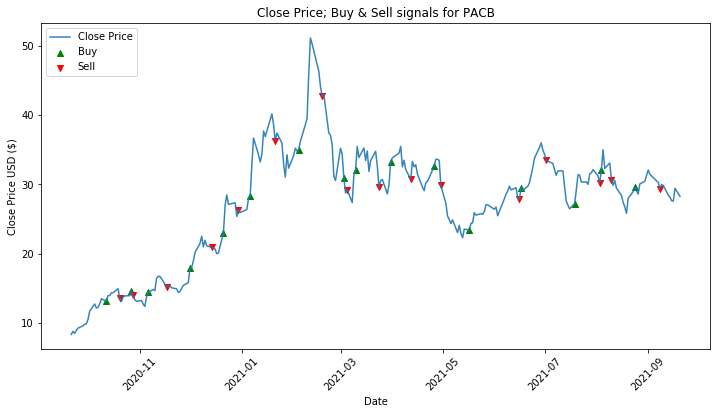

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DSE: No data found, symbol may be delisted
single positional indexer is out-of-bounds
[*********************100%***********************]  1 of 1 completed
('GSL', '224.25%', '218.05%', '0.56250', '7.52029', '4.94733', 16)


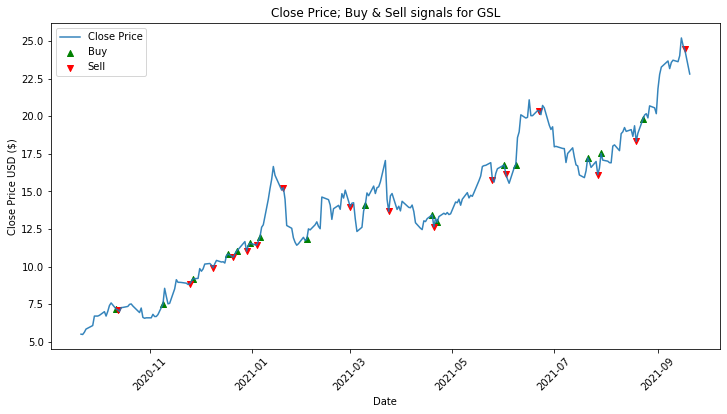

[*********************100%***********************]  1 of 1 completed
selling at close AEIS
('AEIS', '54.32%', '16.68%', '0.57895', '2.50692', '0.13773', 19)


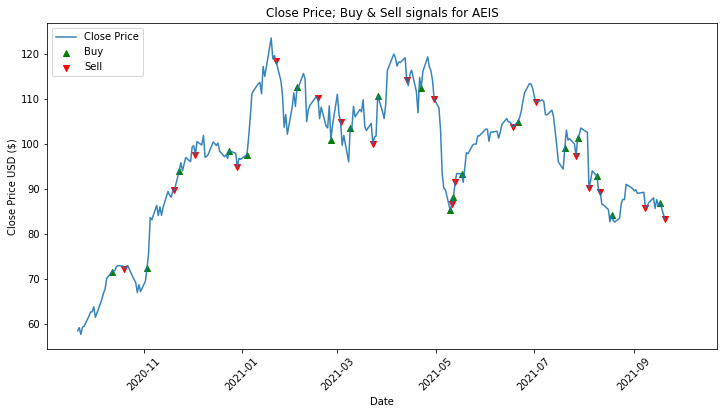

[*********************100%***********************]  1 of 1 completed
buying at close SSY
('SSY', '161.68%', '124.30%', '0.43750', '6.56135', '0.32743', 16)


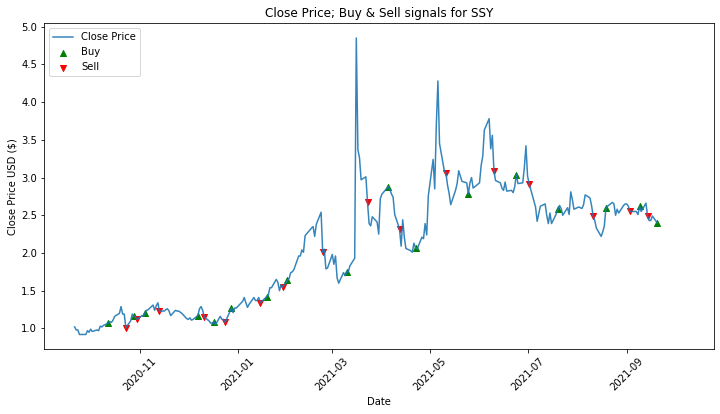

[*********************100%***********************]  1 of 1 completed
('RIBT', '41.26%', '32.57%', '0.50000', '2.73743', '-0.38476', 18)


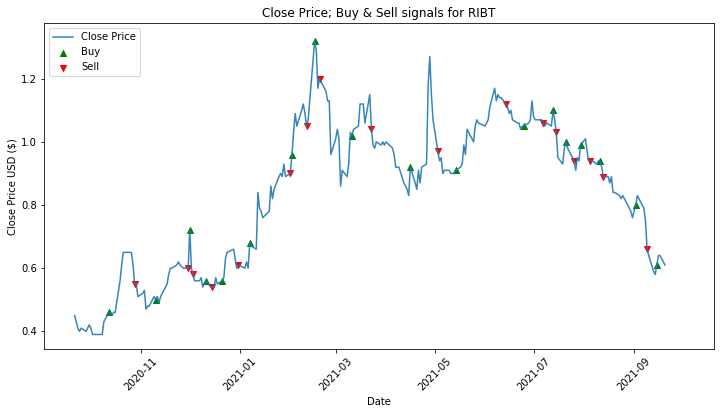

[*********************100%***********************]  1 of 1 completed
('TATT', '53.90%', '26.15%', '0.41176', '2.90898', '-0.27885', 17)


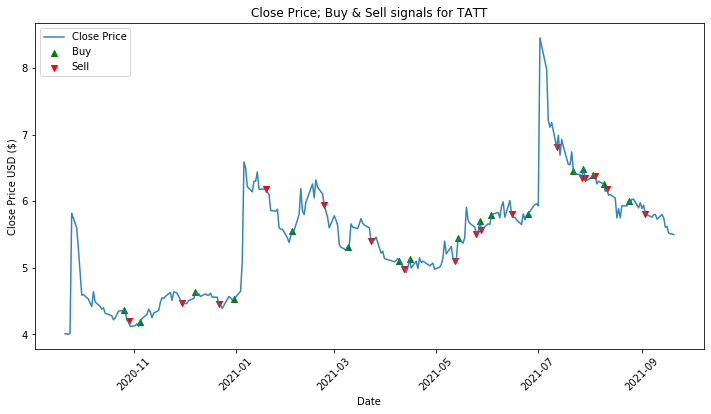

[*********************100%***********************]  1 of 1 completed
('NNDM', '151.96%', '87.42%', '0.50000', '6.68680', '0.98500', 18)


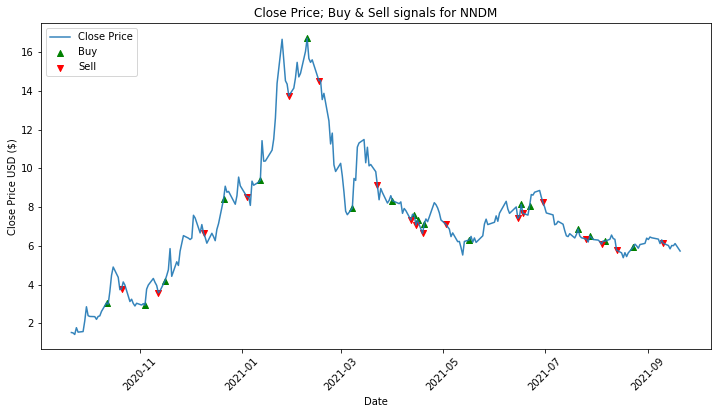

[*********************100%***********************]  1 of 1 completed
('UXIN', '192.12%', '162.50%', '0.50000', '9.92565', '0.79316', 16)


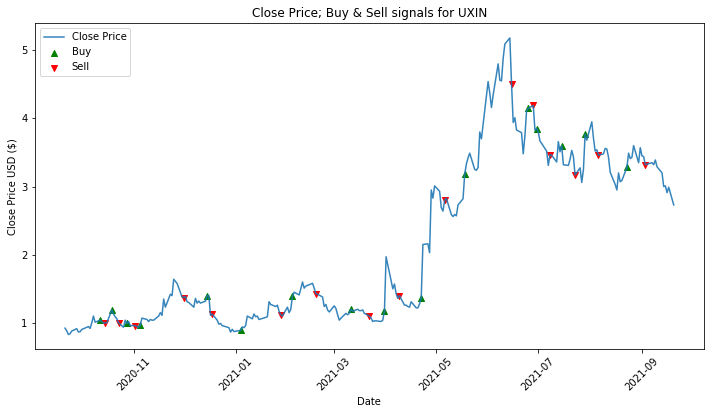

[*********************100%***********************]  1 of 1 completed
('MRNA', '448.00%', '449.60%', '0.61538', '22.26658', '9.10491', 13)


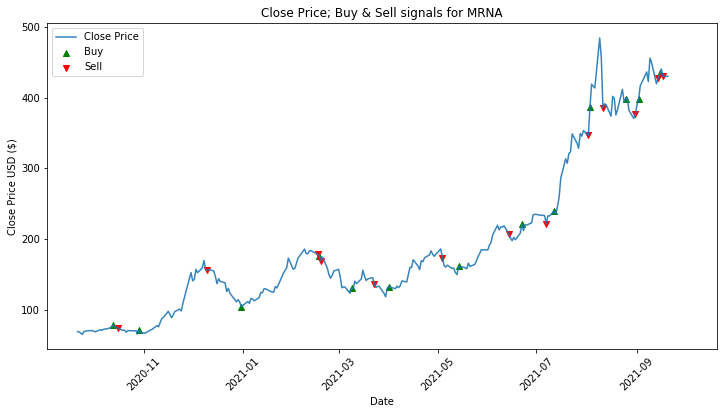

[*********************100%***********************]  1 of 1 completed
('NS', '84.00%', '45.47%', '0.60000', '4.39725', '1.60723', 15)


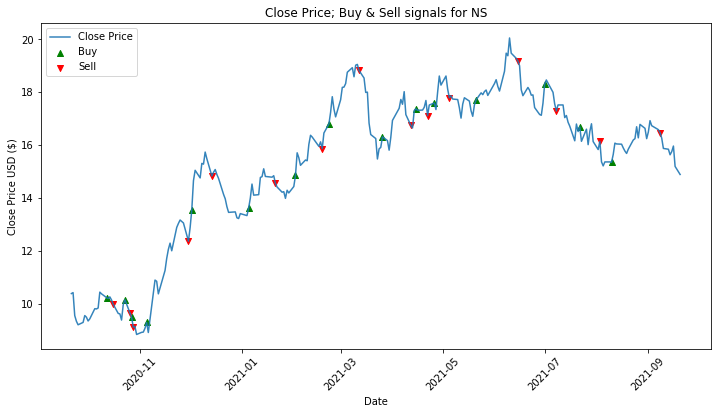

[*********************100%***********************]  1 of 1 completed
('TV', '78.35%', '73.01%', '0.41176', '4.06541', '0.91533', 17)


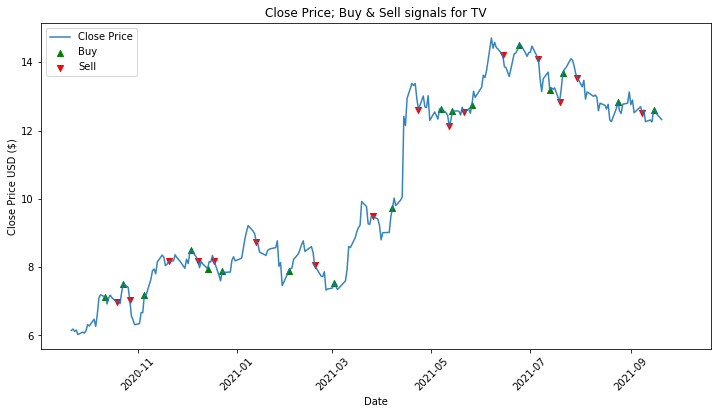

[*********************100%***********************]  1 of 1 completed
('DTEA', '273.69%', '108.20%', '0.57143', '10.70707', '4.73991', 14)


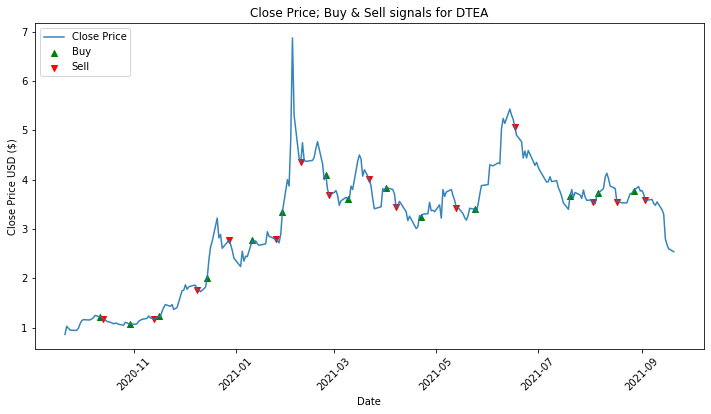

[*********************100%***********************]  1 of 1 completed
selling at close LKCO
('LKCO', '507.37%', '121.36%', '0.57143', '24.56689', '3.86870', 14)


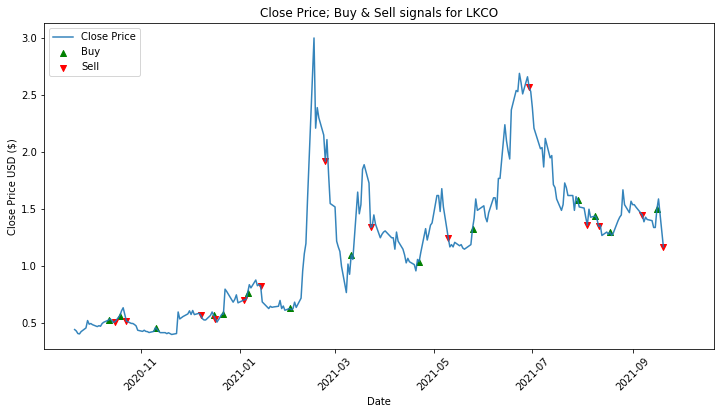

[*********************100%***********************]  1 of 1 completed
('CREG', '90.23%', '34.09%', '0.50000', '5.02926', '0.87336', 16)


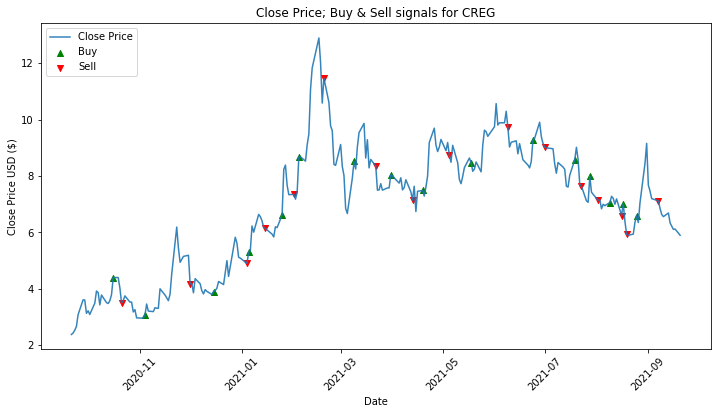

[*********************100%***********************]  1 of 1 completed
('SYTA', '105.72%', '-27.51%', '0.61538', '4.55414', '0.14891', 13)


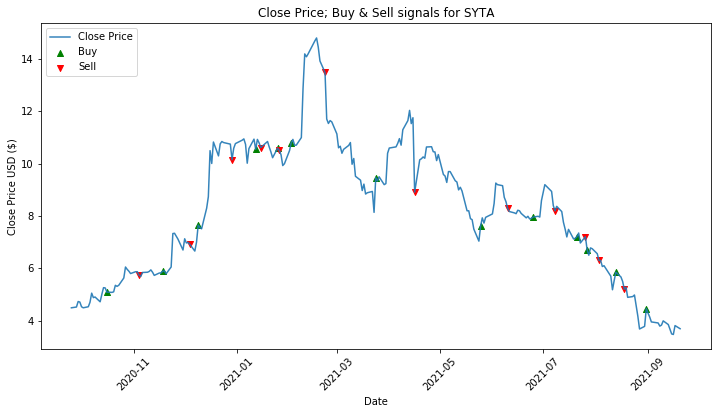

[*********************100%***********************]  1 of 1 completed
('MSTR', '432.70%', '253.48%', '0.66667', '17.33591', '7.52804', 12)


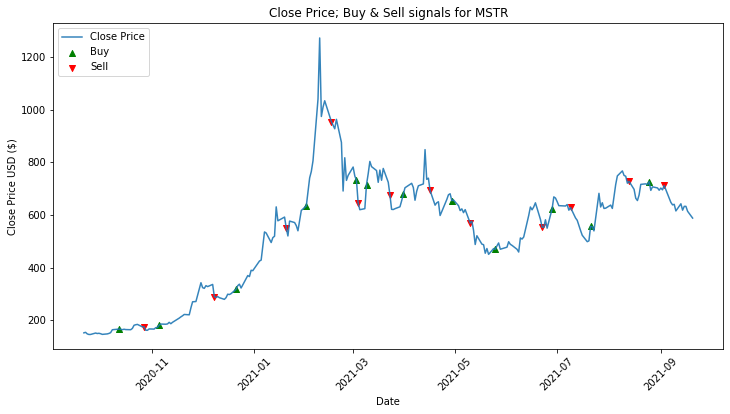

[*********************100%***********************]  1 of 1 completed
('WWE', '58.56%', '32.58%', '0.68750', '3.26019', '1.39736', 16)


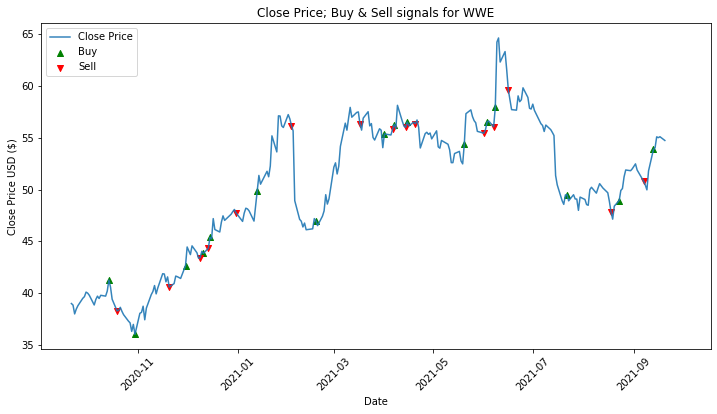

[*********************100%***********************]  1 of 1 completed
('ARCB', '89.74%', '107.70%', '0.66667', '4.69608', '1.96573', 15)


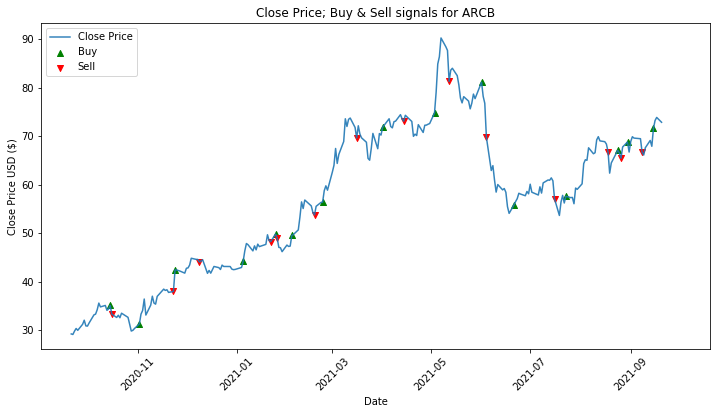

[*********************100%***********************]  1 of 1 completed
selling at close YTRA
('YTRA', '188.89%', '143.21%', '0.62500', '6.43901', '3.51549', 16)


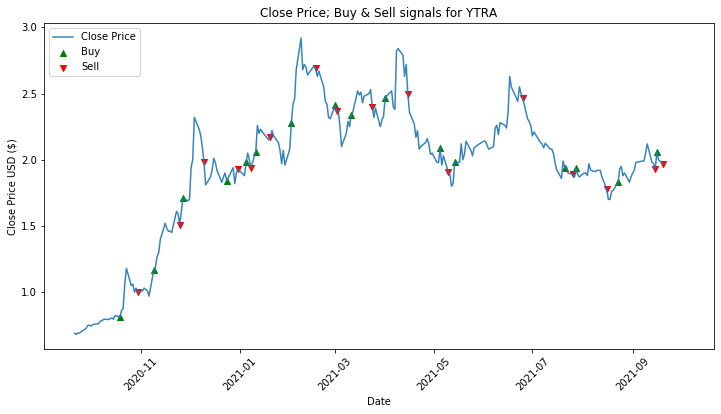

[*********************100%***********************]  1 of 1 completed
('VIAC', '154.84%', '37.14%', '0.58333', '7.38542', '3.04445', 12)


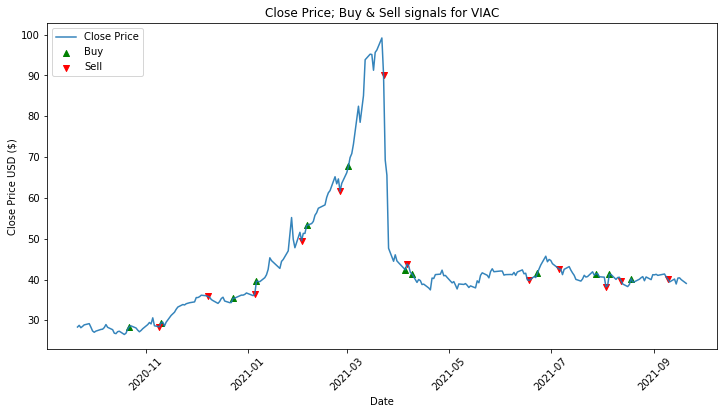

[*********************100%***********************]  1 of 1 completed
selling at close SPB
('SPB', '64.50%', '47.31%', '0.58333', '4.72038', '2.01570', 12)


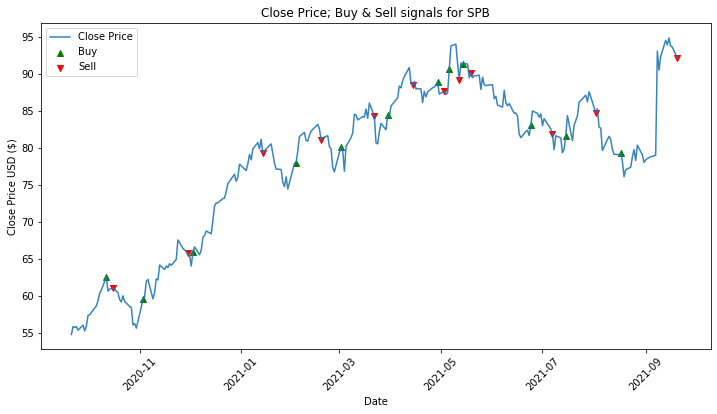

[*********************100%***********************]  1 of 1 completed
('CTXR', '230.19%', '91.51%', '0.83333', '10.44363', '5.67564', 12)


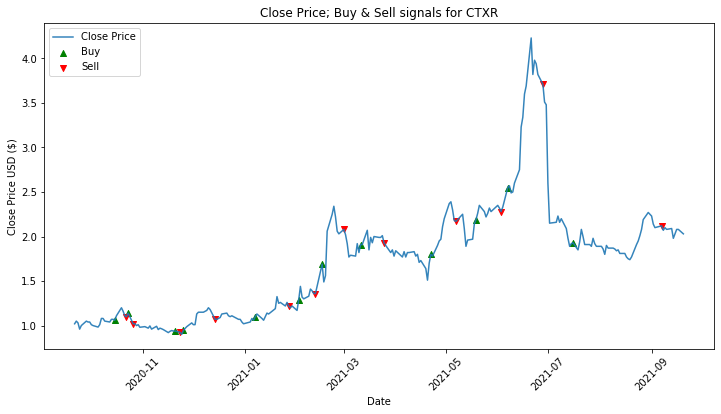

[*********************100%***********************]  1 of 1 completed
('RLGT', '34.46%', '19.21%', '0.50000', '2.32728', '0.67404', 14)


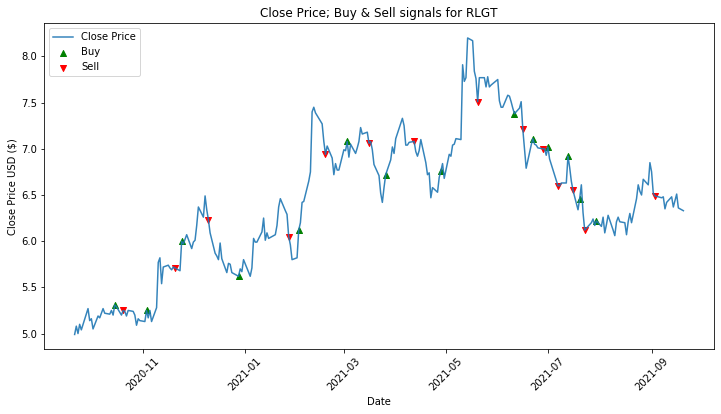

[*********************100%***********************]  1 of 1 completed
buying at close RNLX
('RNLX', '149.33%', '65.57%', '0.64286', '6.60598', '1.92153', 14)


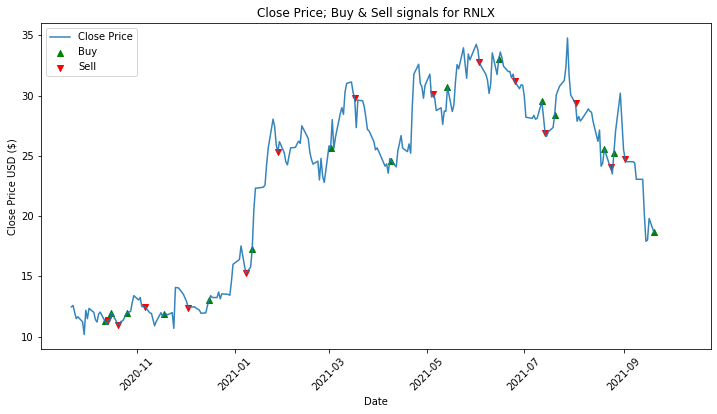

[*********************100%***********************]  1 of 1 completed
('MARA', '1842.15%', '1310.74%', '0.75000', '29.58069', '16.12318', 12)


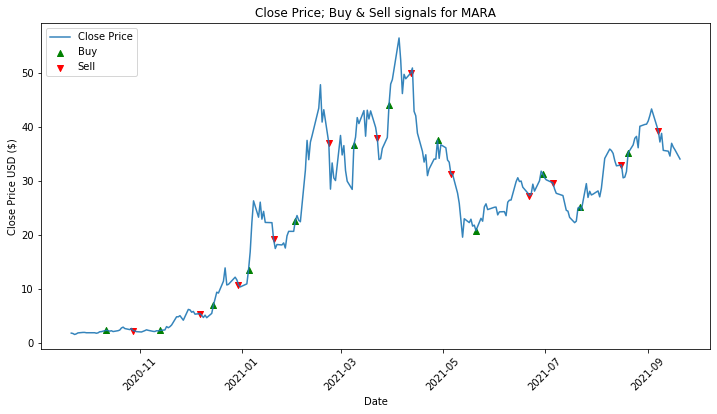

[*********************100%***********************]  1 of 1 completed
('BCOR', '31.72%', '41.88%', '0.47059', '1.68452', '-0.64079', 17)


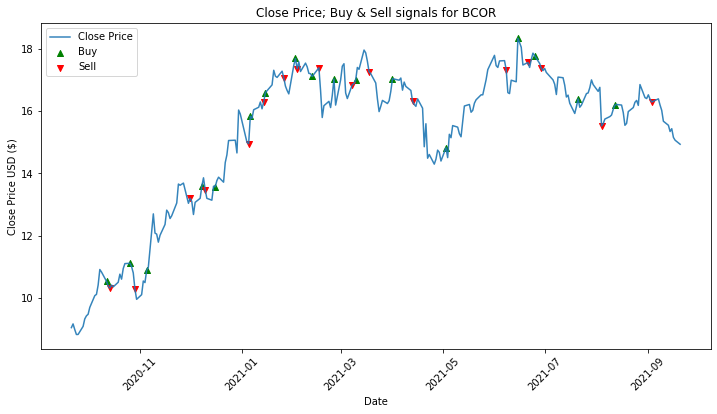

[*********************100%***********************]  1 of 1 completed
('AINC', '238.75%', '152.39%', '0.57143', '10.70567', '1.78096', 14)


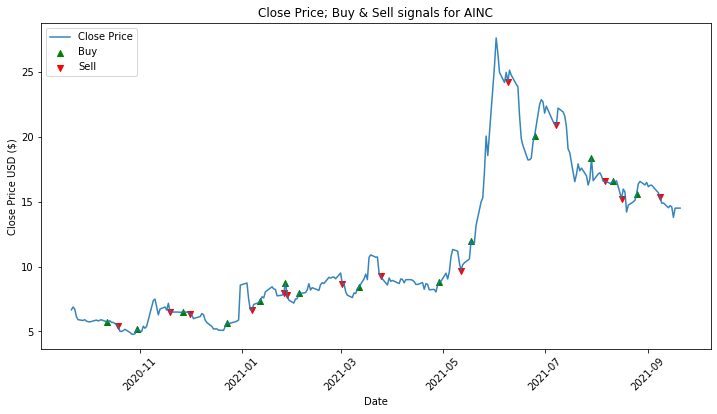

[*********************100%***********************]  1 of 1 completed
('CYBE', '55.04%', '0.10%', '0.92308', '5.36878', '4.23571', 13)


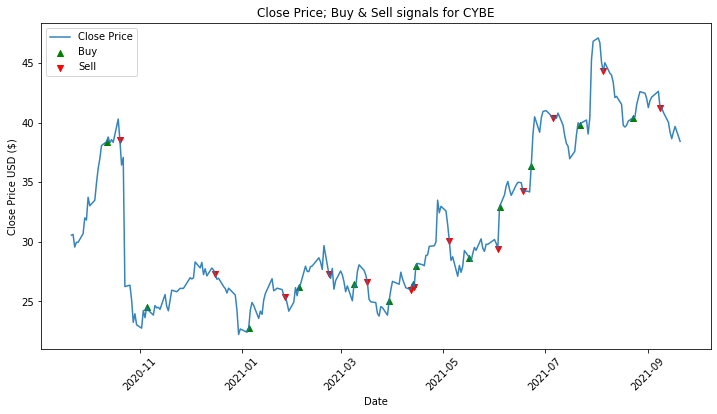

[*********************100%***********************]  1 of 1 completed
('MIE', '122.56%', '141.78%', '0.66667', '5.72702', '2.99339', 15)


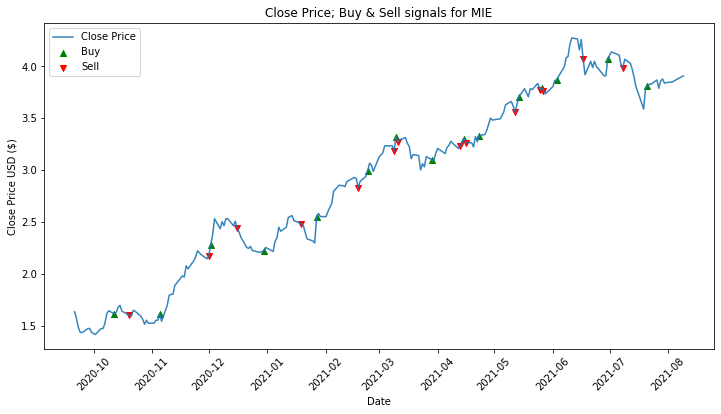

[*********************100%***********************]  1 of 1 completed
('MCHP', '41.93%', '39.71%', '0.56250', '2.29337', '1.30598', 16)


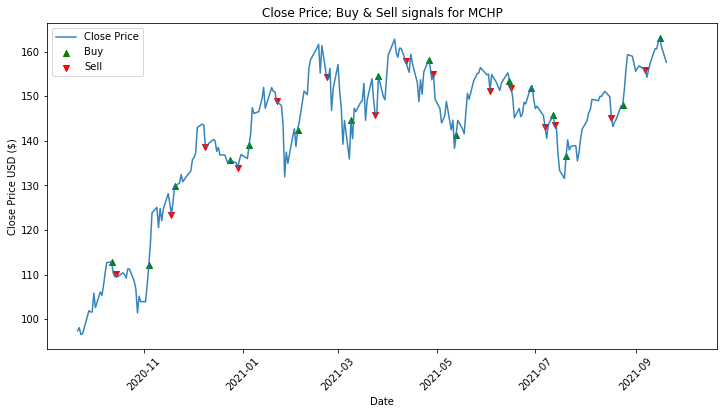

[*********************100%***********************]  1 of 1 completed
('ADBE', '43.60%', '25.76%', '0.55556', '2.65107', '0.57675', 18)


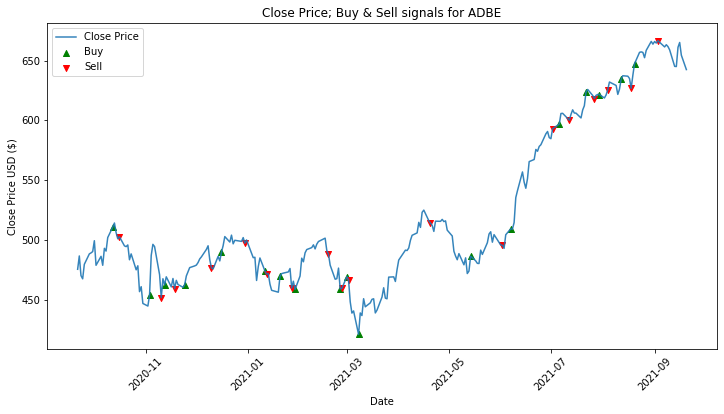

[*********************100%***********************]  1 of 1 completed
('PHD', '15.03%', '16.77%', '0.47368', '0.76607', '-0.08569', 19)


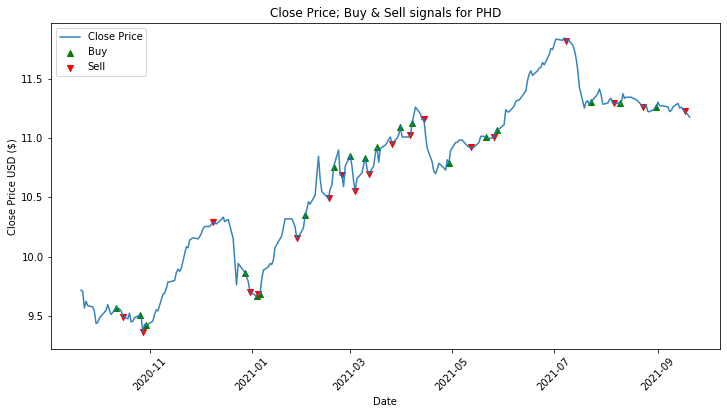

[*********************100%***********************]  1 of 1 completed
('PFSI', '20.06%', '-1.44%', '0.53333', '1.64870', '0.14428', 15)


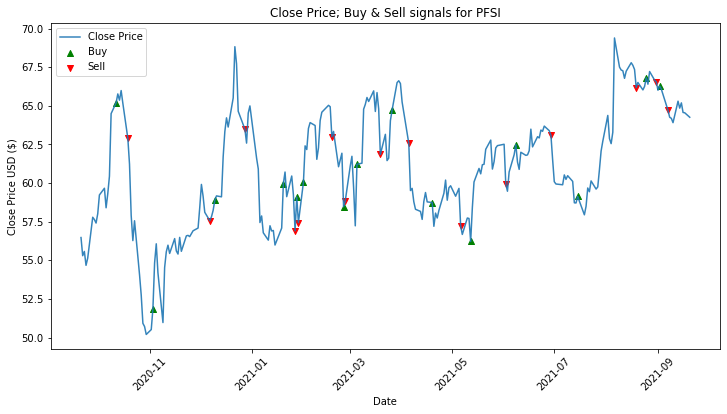

[*********************100%***********************]  1 of 1 completed
('ALEC', '197.52%', '148.38%', '0.63158', '6.29411', '1.87346', 19)


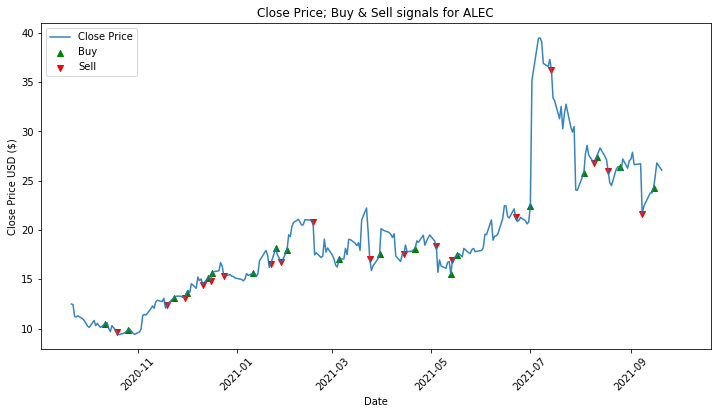

[*********************100%***********************]  1 of 1 completed
('GMS', '87.75%', '77.70%', '0.57143', '5.44640', '1.77842', 14)


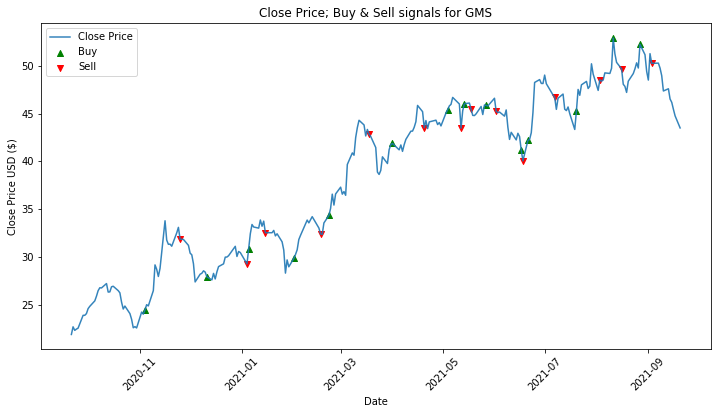

[*********************100%***********************]  1 of 1 completed
('HOLX', '32.29%', '14.06%', '0.61111', '1.76323', '0.70129', 18)


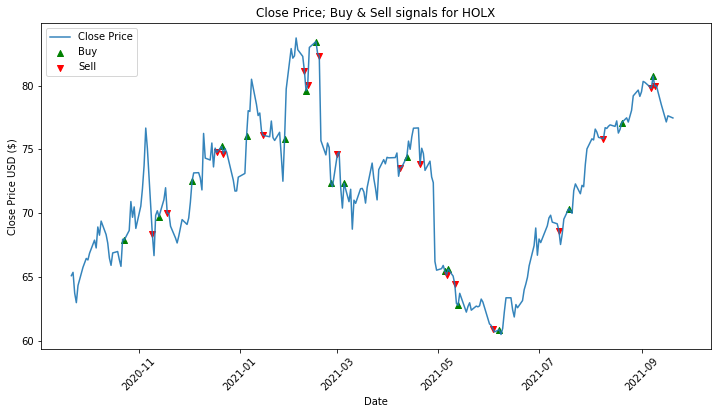

[*********************100%***********************]  1 of 1 completed
('MMSI', '29.60%', '43.49%', '0.62500', '1.50618', '0.55166', 16)


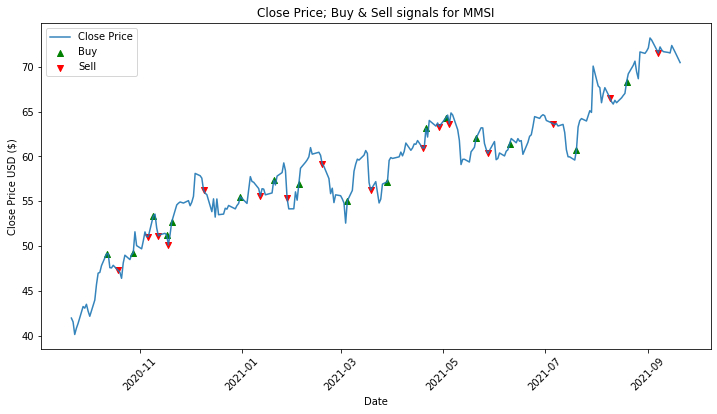

[*********************100%***********************]  1 of 1 completed
('CATO', '89.06%', '145.44%', '0.40000', '3.45603', '0.63320', 20)


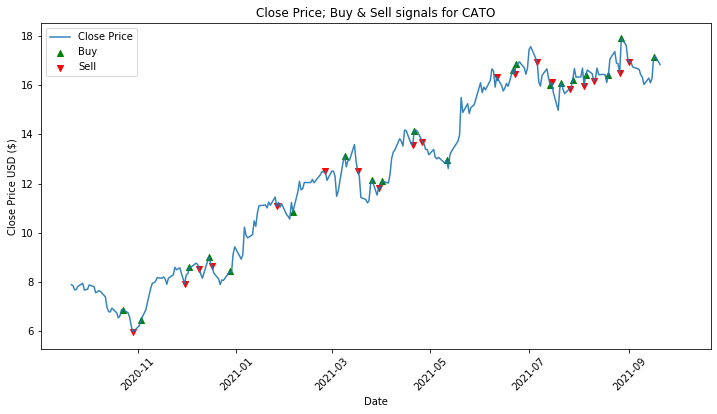

[*********************100%***********************]  1 of 1 completed
('ELY', '59.27%', '91.50%', '0.46667', '3.57950', '-0.18459', 15)
[('PACB', '174.77%', '115.55%', '0.56250', '5.93863', '3.18820', 16), ('GSL', '224.25%', '218.05%', '0.56250', '7.52029', '4.94733', 16), ('AEIS', '54.32%', '16.68%', '0.57895', '2.50692', '0.13773', 19), ('SSY', '161.68%', '124.30%', '0.43750', '6.56135', '0.32743', 16), ('RIBT', '41.26%', '32.57%', '0.50000', '2.73743', '-0.38476', 18), ('TATT', '53.90%', '26.15%', '0.41176', '2.90898', '-0.27885', 17), ('NNDM', '151.96%', '87.42%', '0.50000', '6.68680', '0.98500', 18), ('UXIN', '192.12%', '162.50%', '0.50000', '9.92565', '0.79316', 16), ('MRNA', '448.00%', '449.60%', '0.61538', '22.26658', '9.10491', 13), ('NS', '84.00%', '45.47%', '0.60000', '4.39725', '1.60723', 15), ('TV', '78.35%', '73.01%', '0.41176', '4.06541', '0.91533', 17), ('DTEA', '273.69%', '108.20%', '0.57143', '10.70707', '4.73991', 14), ('LKCO', '507.37%', '121.36%', '0.57143', '24.566

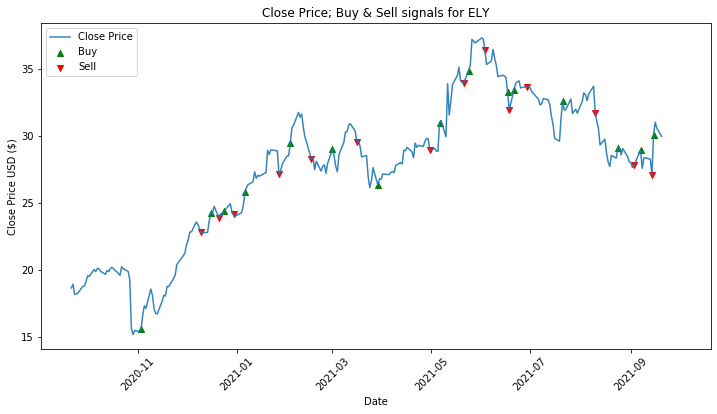

[*********************100%***********************]  1 of 1 completed
('DKNG', '82.95%', '64.94%', '0.57143', '5.24153', '1.46877', 14)


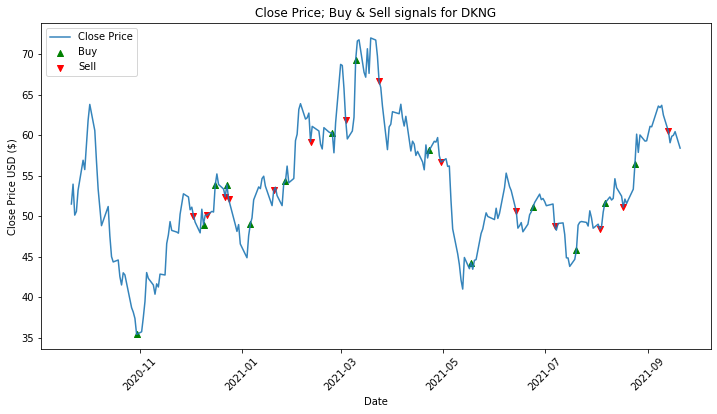

[*********************100%***********************]  1 of 1 completed
('CTR', '117.21%', '118.22%', '0.60000', '5.75234', '2.49415', 15)


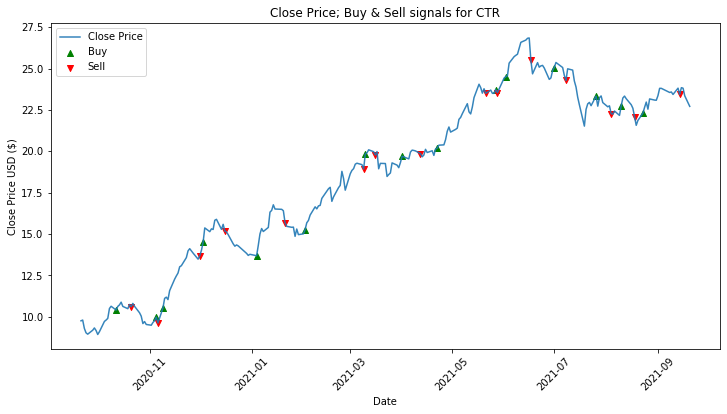

[*********************100%***********************]  1 of 1 completed
('BSTZ', '81.53%', '47.99%', '0.72727', '6.46779', '2.26779', 11)


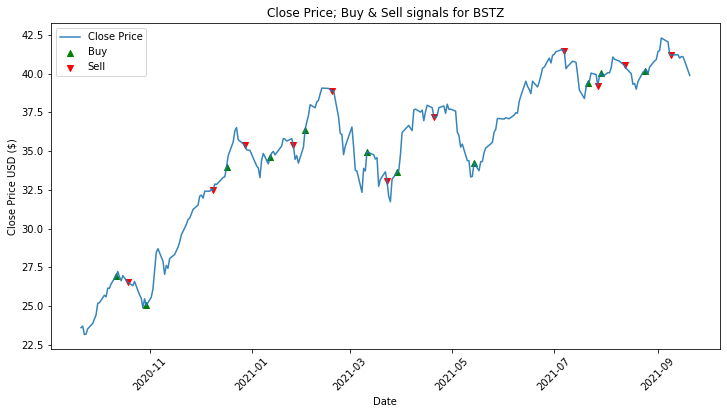

[*********************100%***********************]  1 of 1 completed
('CPG', '169.43%', '181.36%', '0.50000', '5.46887', '2.68058', 16)


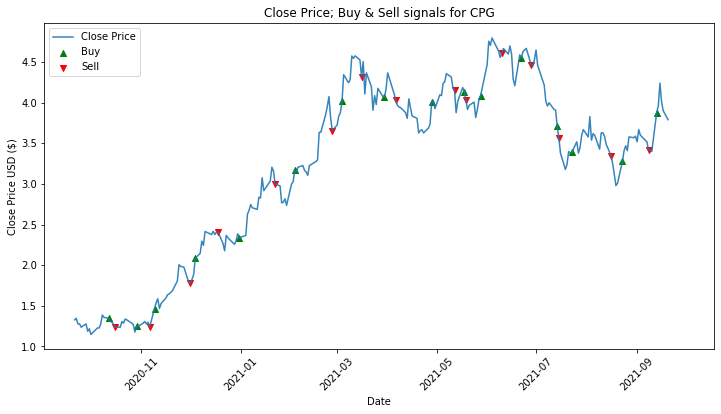

[*********************100%***********************]  1 of 1 completed
list index out of range
[*********************100%***********************]  1 of 1 completed
('NTNX', '68.07%', '72.58%', '0.50000', '2.88597', '0.40058', 18)


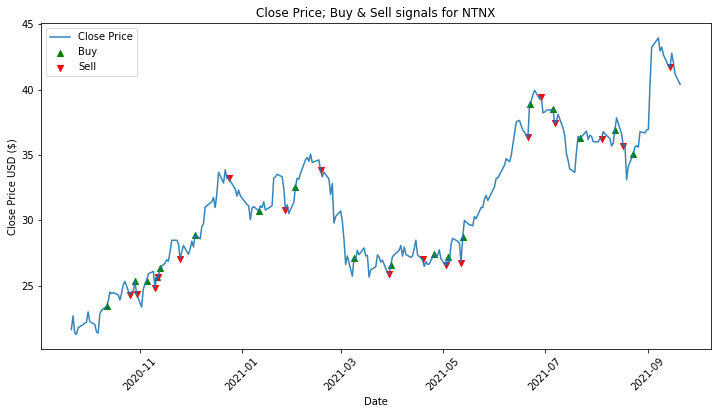

[*********************100%***********************]  1 of 1 completed
('JPC', '23.14%', '22.44%', '0.64706', '1.29400', '0.69840', 17)


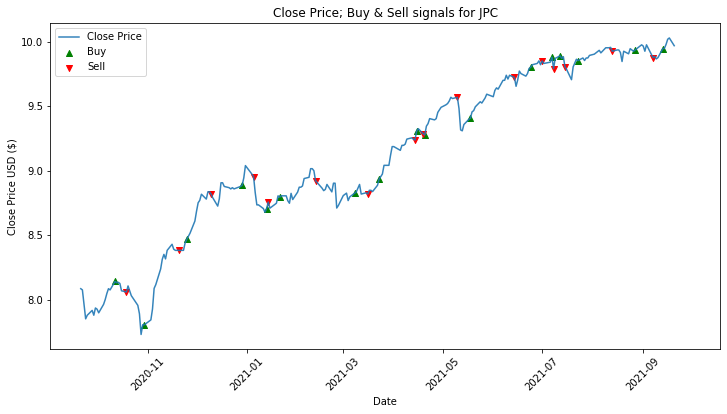

[*********************100%***********************]  1 of 1 completed
('BCOV', '81.26%', '1.36%', '0.64286', '4.70881', '0.20789', 14)


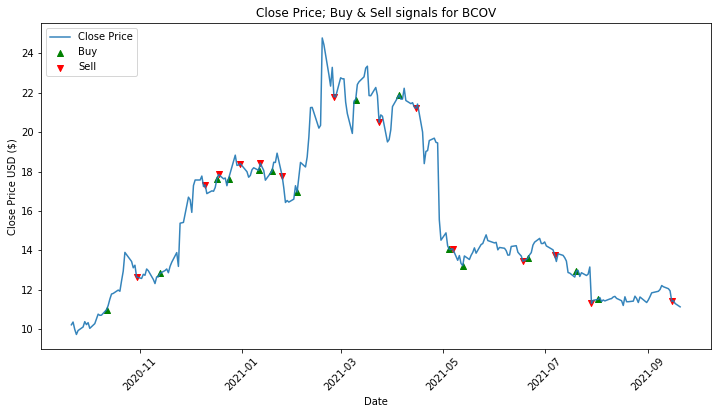

[*********************100%***********************]  1 of 1 completed
('BSQR', '528.23%', '91.53%', '0.46154', '27.64885', '0.44727', 13)


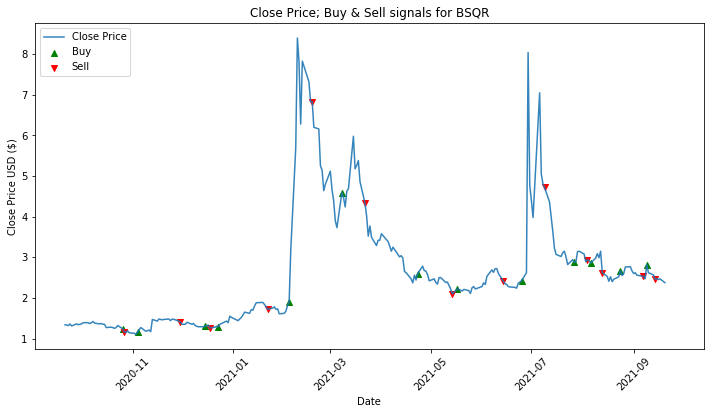

[*********************100%***********************]  1 of 1 completed
('RFI', '37.44%', '44.03%', '0.56250', '2.07535', '0.93023', 16)


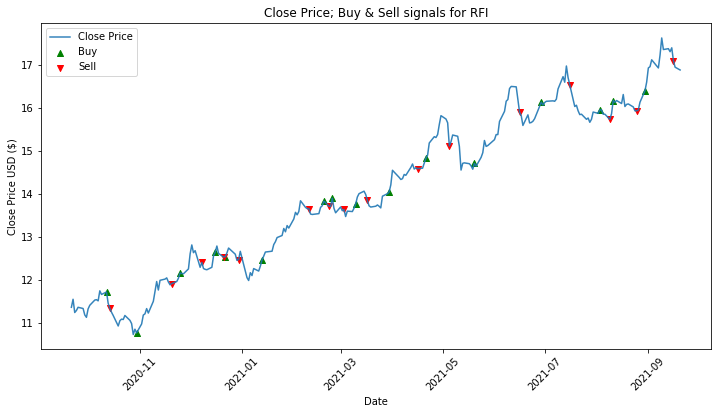

[*********************100%***********************]  1 of 1 completed
('AVNW', '218.62%', '186.71%', '0.50000', '10.91665', '1.71102', 14)


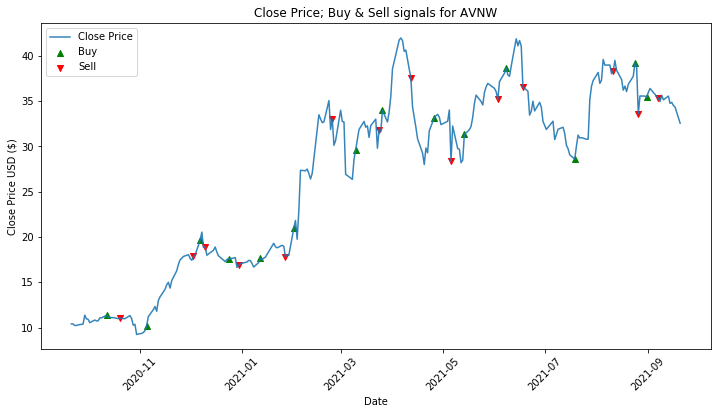

[*********************100%***********************]  1 of 1 completed
selling at close VIACA
('VIACA', '132.23%', '43.26%', '0.50000', '5.50133', '1.61902', 14)


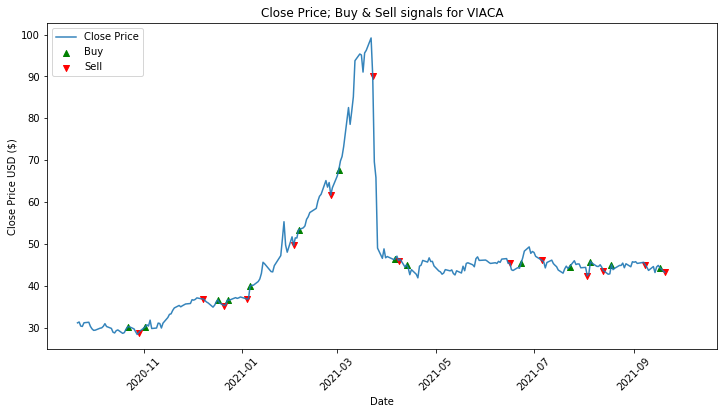

[*********************100%***********************]  1 of 1 completed
('DISCK', '121.80%', '25.44%', '0.46667', '4.92898', '1.00962', 15)


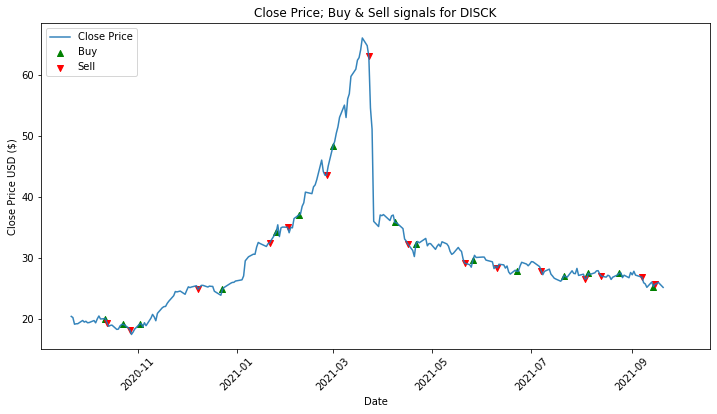

[*********************100%***********************]  1 of 1 completed
selling at close SMM
('SMM', '63.04%', '62.06%', '0.62500', '3.32357', '1.50391', 16)


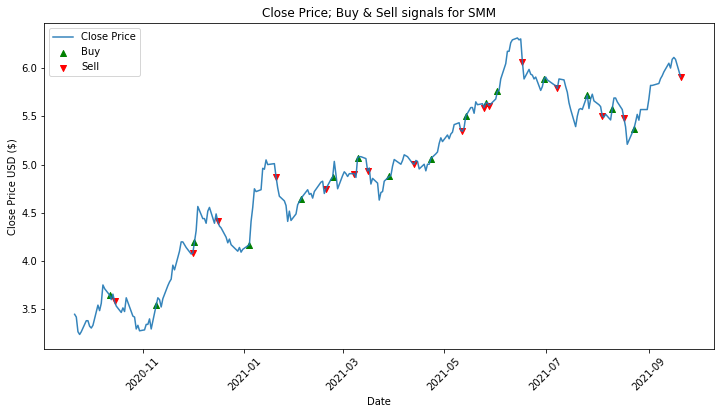

[*********************100%***********************]  1 of 1 completed
('KOD', '75.40%', '37.77%', '0.64286', '4.24133', '1.40361', 14)


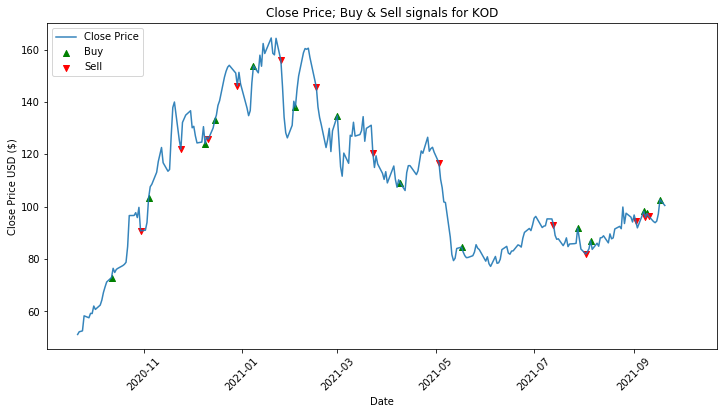

[*********************100%***********************]  1 of 1 completed
('MCS', '139.33%', '106.86%', '0.42857', '5.93757', '0.44869', 14)


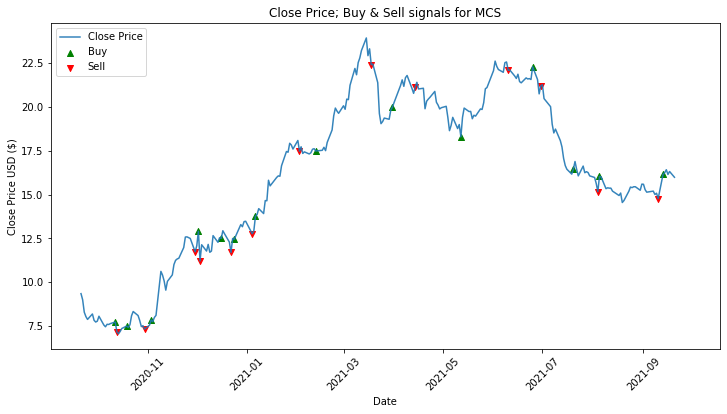

[*********************100%***********************]  1 of 1 completed
('THRY', '194.06%', '195.19%', '0.47059', '6.80939', '1.89843', 17)


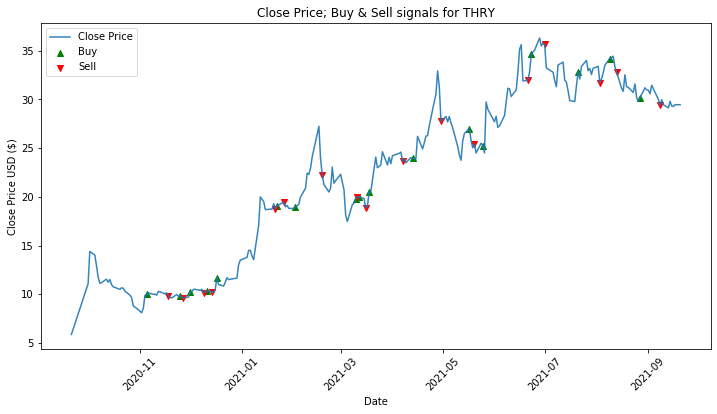

[*********************100%***********************]  1 of 1 completed
('CDOR', '77.69%', '120.32%', '0.47368', '3.26596', '0.58663', 19)


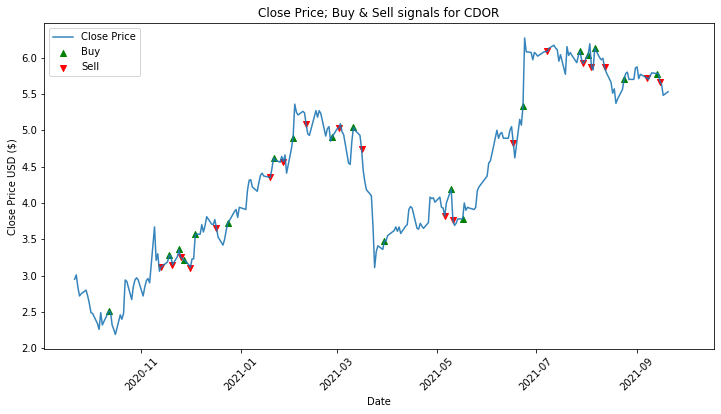

[*********************100%***********************]  1 of 1 completed
('ZS', '81.47%', '73.58%', '0.60000', '4.74205', '1.67651', 15)


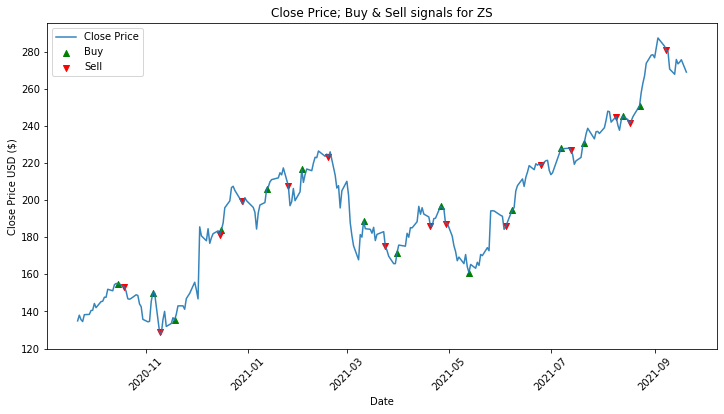

[*********************100%***********************]  1 of 1 completed
('LPI', '605.72%', '616.11%', '0.58824', '10.93612', '4.88912', 17)


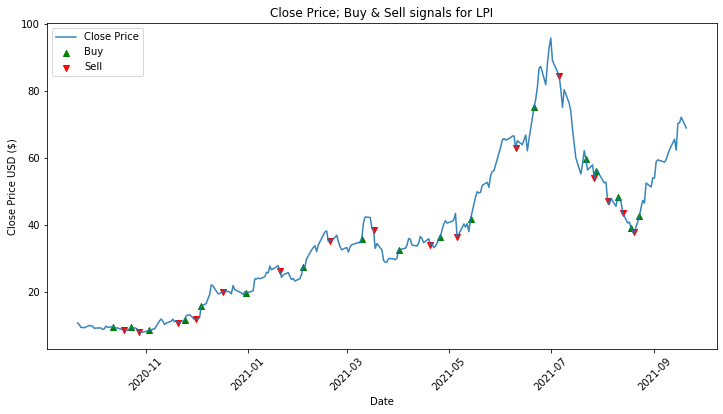

[*********************100%***********************]  1 of 1 completed
('SI', '871.62%', '561.71%', '0.80000', '31.57279', '7.73795', 10)


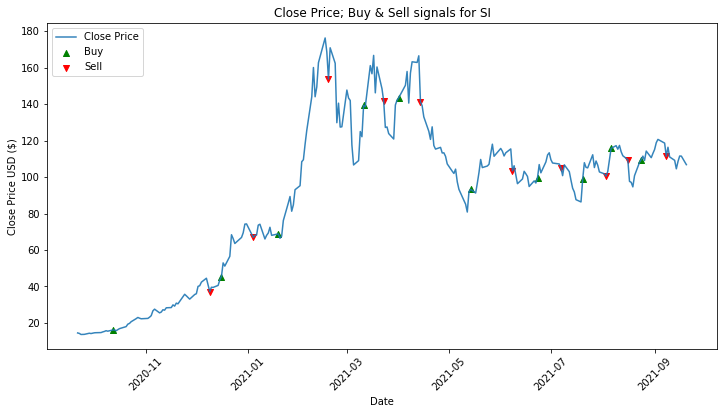

[*********************100%***********************]  1 of 1 completed
('HEAR', '124.45%', '53.18%', '0.53846', '8.33143', '2.68787', 13)


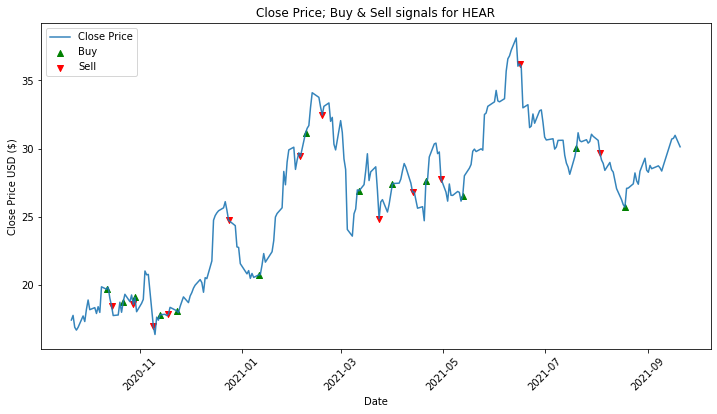

[*********************100%***********************]  1 of 1 completed
('COKE', '71.63%', '56.59%', '0.50000', '4.63518', '0.75555', 14)


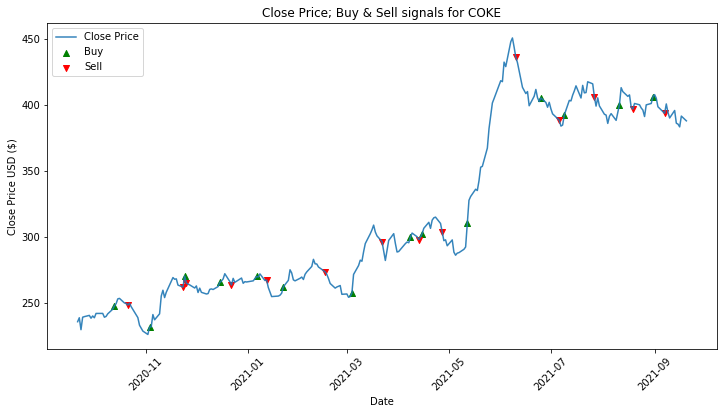

[*********************100%***********************]  1 of 1 completed
('OKTA', '37.73%', '3.05%', '0.66667', '3.22970', '1.25844', 12)


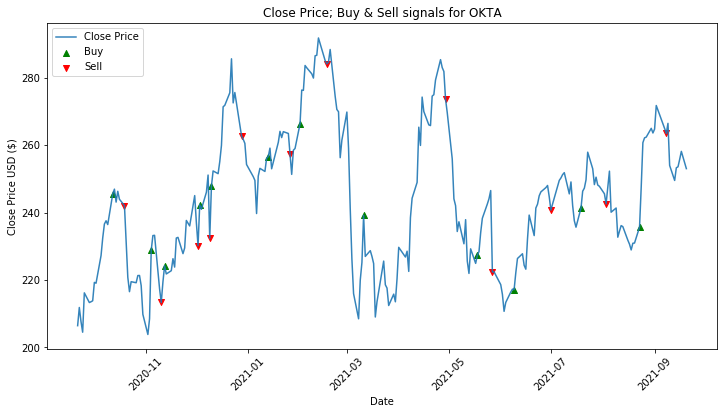

[*********************100%***********************]  1 of 1 completed
selling at close CRC
('CRC', '181.15%', '171.03%', '0.70000', '12.81305', '5.80112', 10)


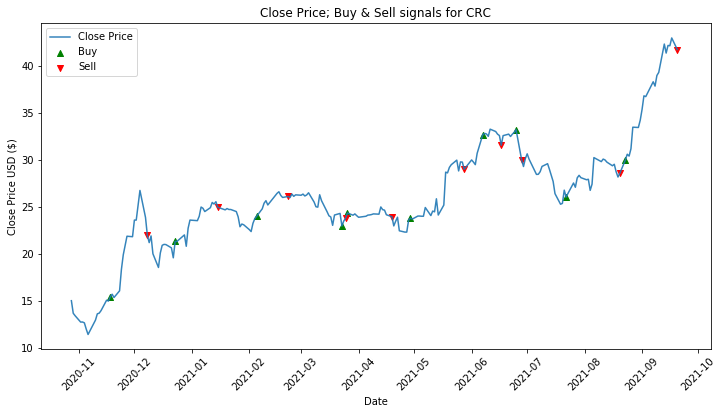

[*********************100%***********************]  1 of 1 completed
('KYMR', '104.91%', '65.56%', '0.66667', '7.83382', '3.31252', 12)


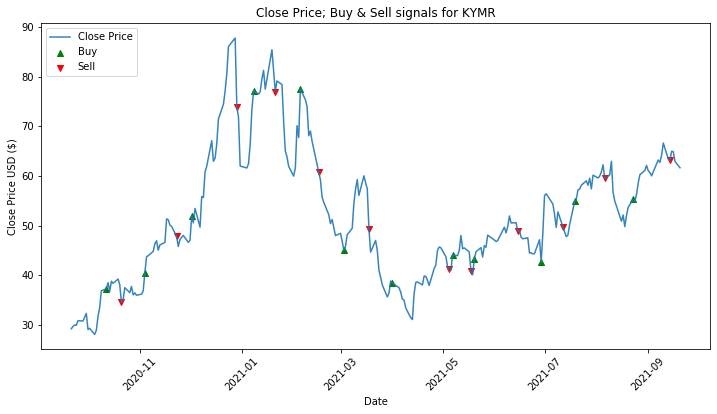

[*********************100%***********************]  1 of 1 completed
selling at close DFIN
('DFIN', '106.16%', '133.80%', '0.66667', '5.19033', '2.93154', 15)


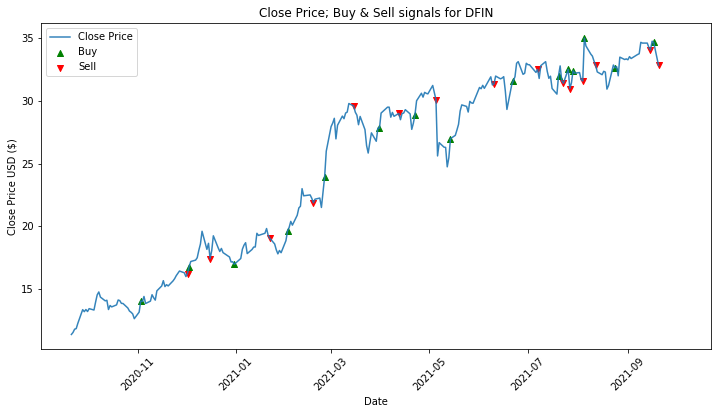

[*********************100%***********************]  1 of 1 completed
('RADI', '144.60%', '107.41%', '0.66667', '6.78053', '3.87673', 15)


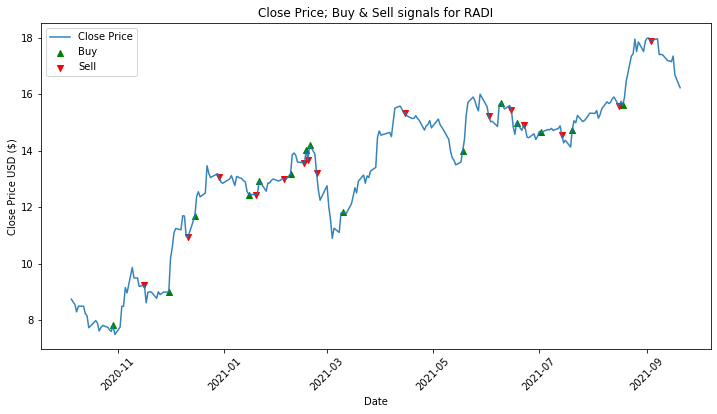

[*********************100%***********************]  1 of 1 completed
('FTHM', '79.11%', '43.45%', '0.50000', '3.79186', '1.58554', 16)


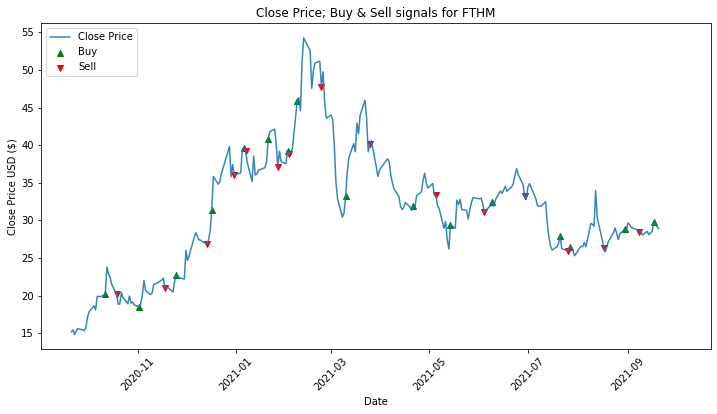

[*********************100%***********************]  1 of 1 completed
('CCK', '25.84%', '28.96%', '0.52174', '0.94788', '0.21825', 23)


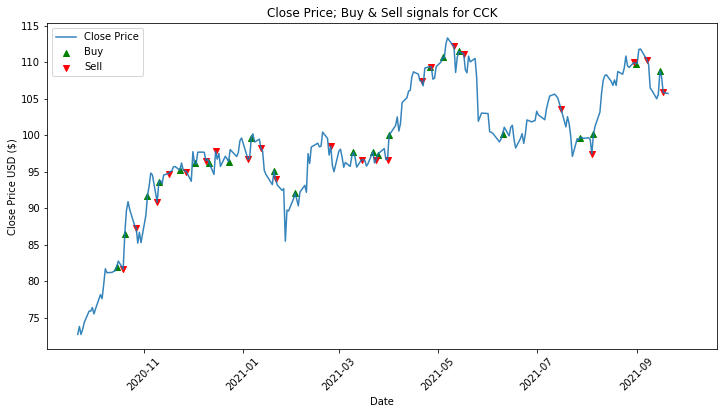

[*********************100%***********************]  1 of 1 completed
selling at close IBN
('IBN', '47.05%', '74.41%', '0.50000', '1.89192', '0.44653', 20)


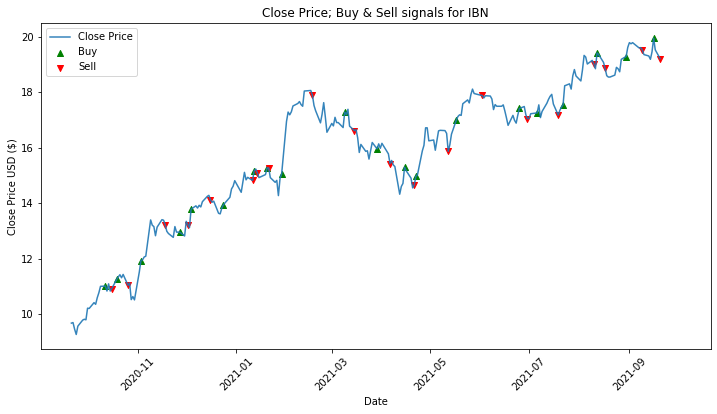

[*********************100%***********************]  1 of 1 completed
('RDI', '181.62%', '96.58%', '0.50000', '9.53673', '3.07348', 12)


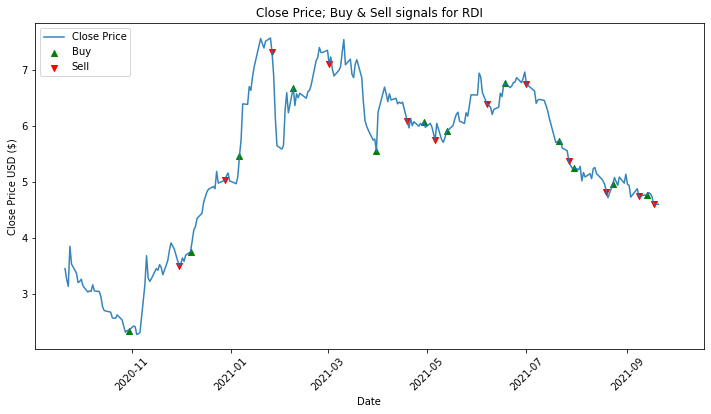

[*********************100%***********************]  1 of 1 completed
('ACY', '1377.95%', '1703.59%', '0.68750', '25.71659', '8.92208', 16)


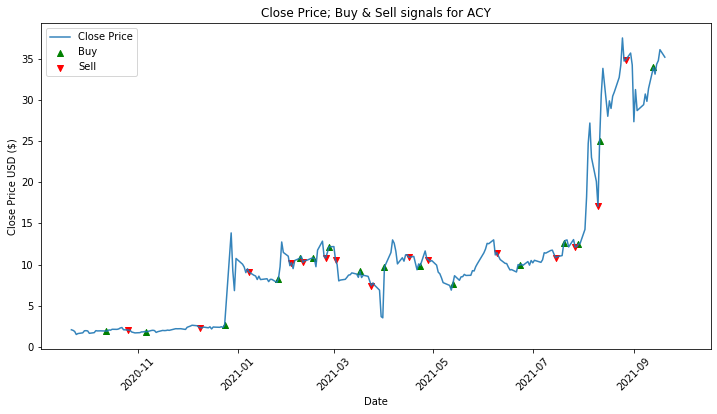

[*********************100%***********************]  1 of 1 completed
selling at close DB
('DB', '10.33%', '28.53%', '0.45000', '0.50109', '-1.03196', 20)


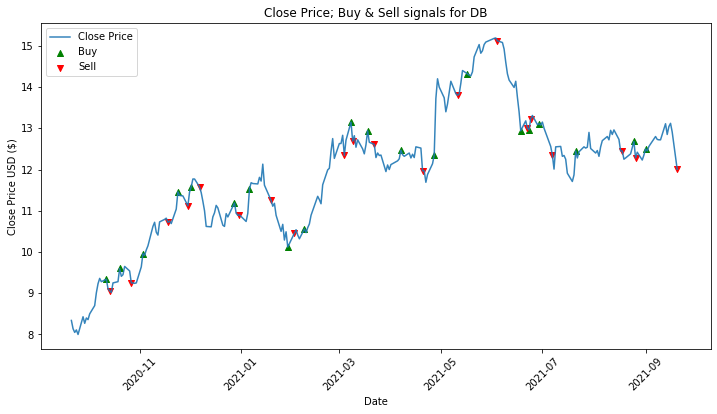

[*********************100%***********************]  1 of 1 completed
('TEGS', '17.29%', '14.35%', '0.57895', '0.86513', '0.40485', 19)


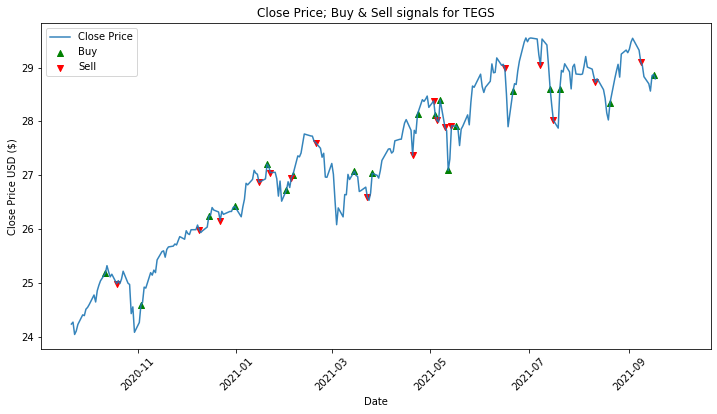

[*********************100%***********************]  1 of 1 completed
('OCCI', '88.65%', '59.75%', '0.53333', '4.56813', '1.41089', 15)


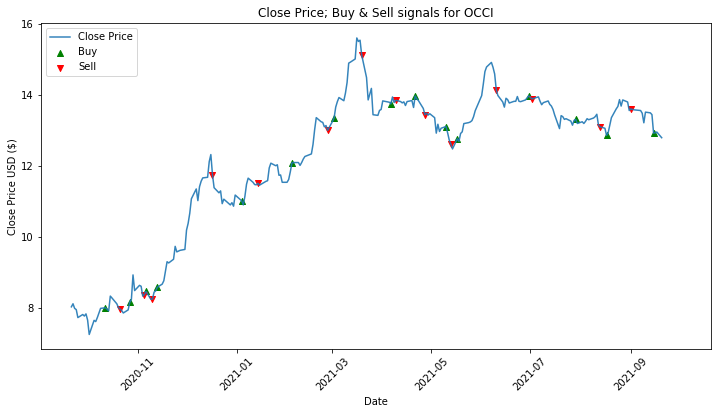

[*********************100%***********************]  1 of 1 completed
('UVV', '27.13%', '20.28%', '0.56250', '1.49831', '0.45221', 16)


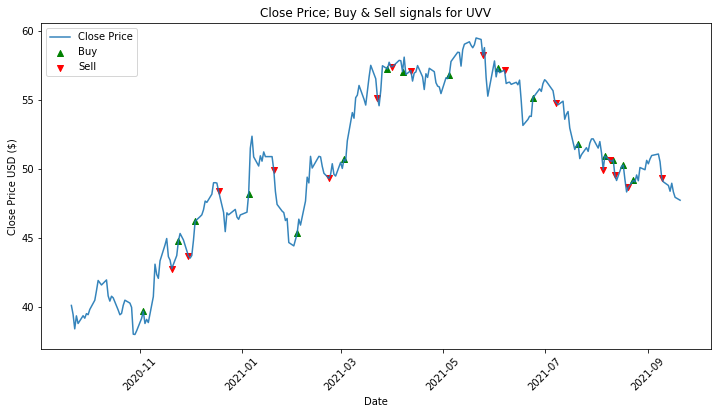

[*********************100%***********************]  1 of 1 completed
('ADSK', '26.33%', '16.77%', '0.58824', '1.48012', '0.55765', 17)


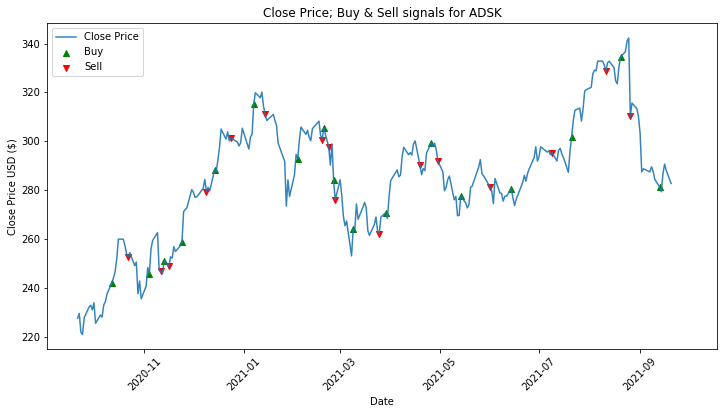

[*********************100%***********************]  1 of 1 completed
('HROW', '112.02%', '61.76%', '0.50000', '6.99395', '3.59916', 14)


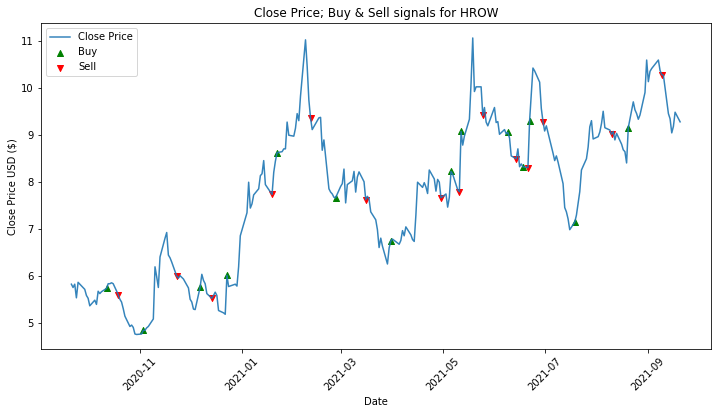

[*********************100%***********************]  1 of 1 completed
('FDG', '31.72%', '21.48%', '0.58333', '2.45834', '1.24841', 12)


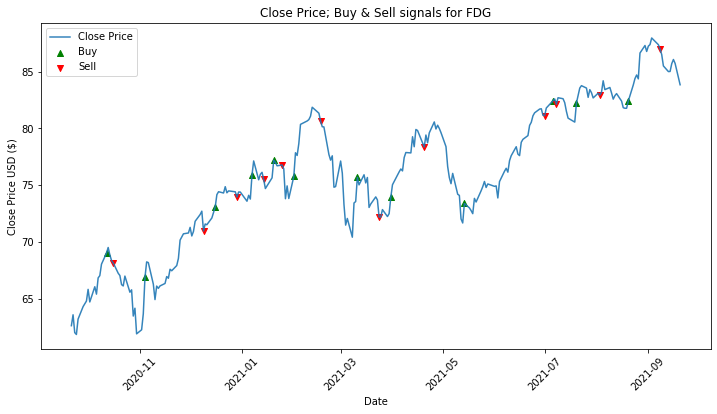

[*********************100%***********************]  1 of 1 completed
selling at close APPF
('APPF', '24.16%', '-27.78%', '0.42857', '1.97994', '-0.13233', 14)


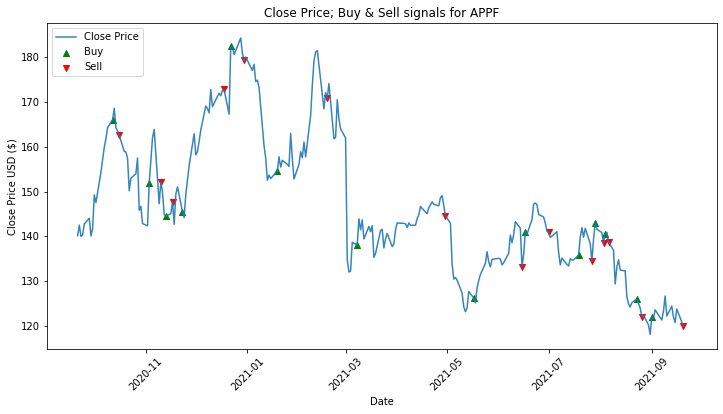

[*********************100%***********************]  1 of 1 completed
('ASYS', '74.42%', '97.19%', '0.53333', '4.06784', '0.74404', 15)


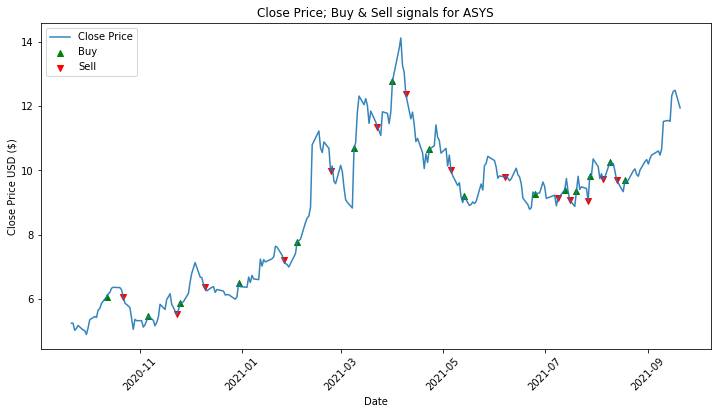

[*********************100%***********************]  1 of 1 completed
('ECF', '26.10%', '24.50%', '0.50000', '1.81826', '0.53047', 14)
[('PACB', '174.77%', '115.55%', '0.56250', '5.93863', '3.18820', 16), ('GSL', '224.25%', '218.05%', '0.56250', '7.52029', '4.94733', 16), ('AEIS', '54.32%', '16.68%', '0.57895', '2.50692', '0.13773', 19), ('SSY', '161.68%', '124.30%', '0.43750', '6.56135', '0.32743', 16), ('RIBT', '41.26%', '32.57%', '0.50000', '2.73743', '-0.38476', 18), ('TATT', '53.90%', '26.15%', '0.41176', '2.90898', '-0.27885', 17), ('NNDM', '151.96%', '87.42%', '0.50000', '6.68680', '0.98500', 18), ('UXIN', '192.12%', '162.50%', '0.50000', '9.92565', '0.79316', 16), ('MRNA', '448.00%', '449.60%', '0.61538', '22.26658', '9.10491', 13), ('NS', '84.00%', '45.47%', '0.60000', '4.39725', '1.60723', 15), ('TV', '78.35%', '73.01%', '0.41176', '4.06541', '0.91533', 17), ('DTEA', '273.69%', '108.20%', '0.57143', '10.70707', '4.73991', 14), ('LKCO', '507.37%', '121.36%', '0.57143', '24.5668

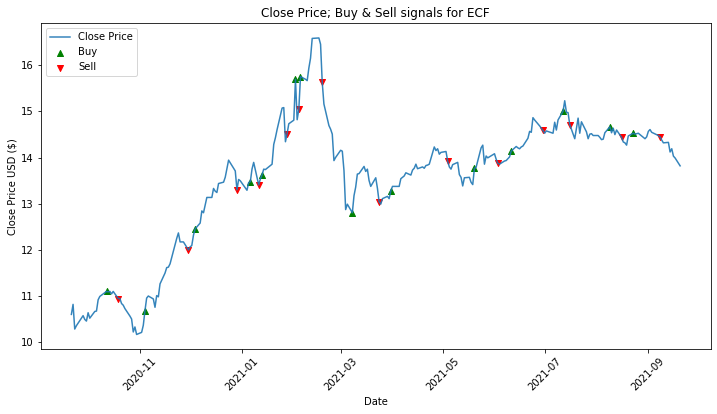

[*********************100%***********************]  1 of 1 completed
('NVRO', '38.19%', '-19.46%', '0.64286', '2.92643', '0.73486', 14)


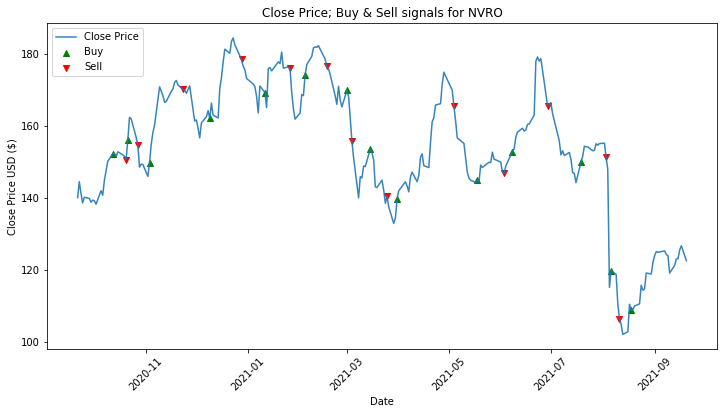

[*********************100%***********************]  1 of 1 completed
('CRUS', '45.03%', '21.17%', '0.64286', '2.95015', '0.90187', 14)


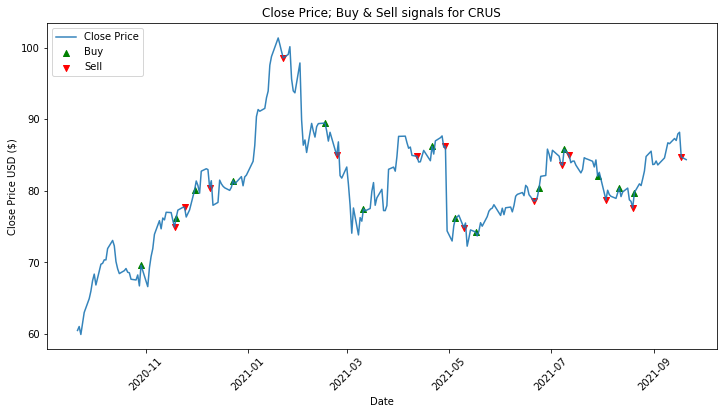

[*********************100%***********************]  1 of 1 completed
('ANSS', '20.68%', '2.67%', '0.53333', '1.50423', '0.28113', 15)


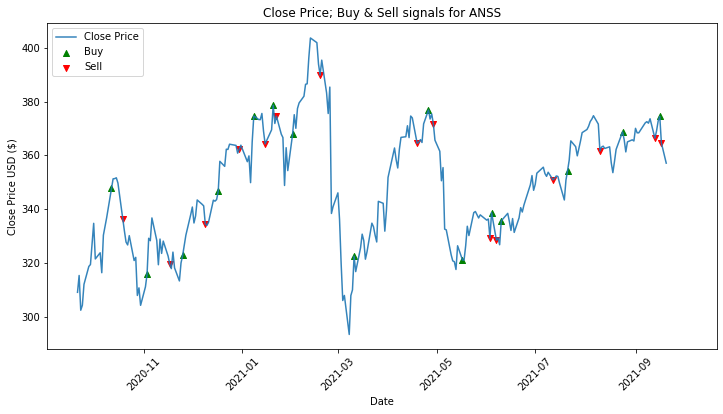

[*********************100%***********************]  1 of 1 completed
('NICE', '32.11%', '19.93%', '0.50000', '1.94008', '0.39631', 16)


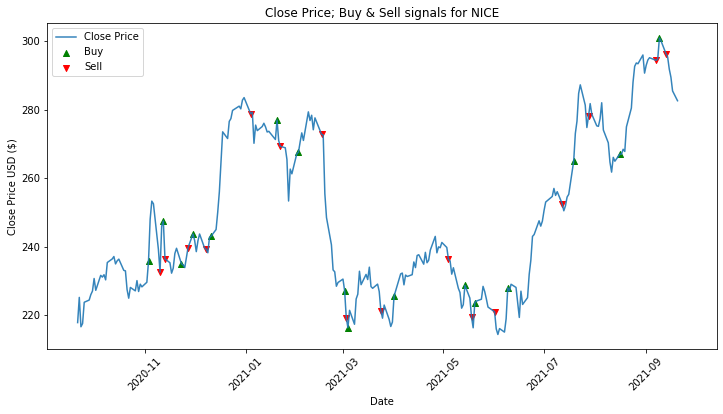

[*********************100%***********************]  1 of 1 completed
('PFD', '14.50%', '-0.34%', '0.29412', '0.78225', '-0.10497', 17)


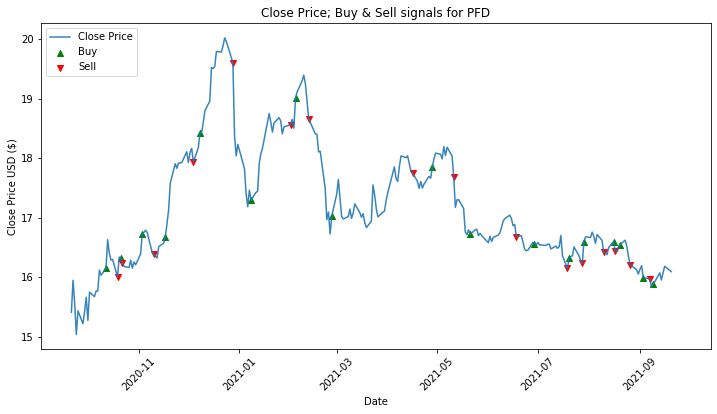

[*********************100%***********************]  1 of 1 completed
('EW', '29.98%', '39.05%', '0.50000', '1.92474', '0.12062', 16)
[('PACB', '174.77%', '115.55%', '0.56250', '5.93863', '3.18820', 16), ('GSL', '224.25%', '218.05%', '0.56250', '7.52029', '4.94733', 16), ('AEIS', '54.32%', '16.68%', '0.57895', '2.50692', '0.13773', 19), ('SSY', '161.68%', '124.30%', '0.43750', '6.56135', '0.32743', 16), ('RIBT', '41.26%', '32.57%', '0.50000', '2.73743', '-0.38476', 18), ('TATT', '53.90%', '26.15%', '0.41176', '2.90898', '-0.27885', 17), ('NNDM', '151.96%', '87.42%', '0.50000', '6.68680', '0.98500', 18), ('UXIN', '192.12%', '162.50%', '0.50000', '9.92565', '0.79316', 16), ('MRNA', '448.00%', '449.60%', '0.61538', '22.26658', '9.10491', 13), ('NS', '84.00%', '45.47%', '0.60000', '4.39725', '1.60723', 15), ('TV', '78.35%', '73.01%', '0.41176', '4.06541', '0.91533', 17), ('DTEA', '273.69%', '108.20%', '0.57143', '10.70707', '4.73991', 14), ('LKCO', '507.37%', '121.36%', '0.57143', '24.56689

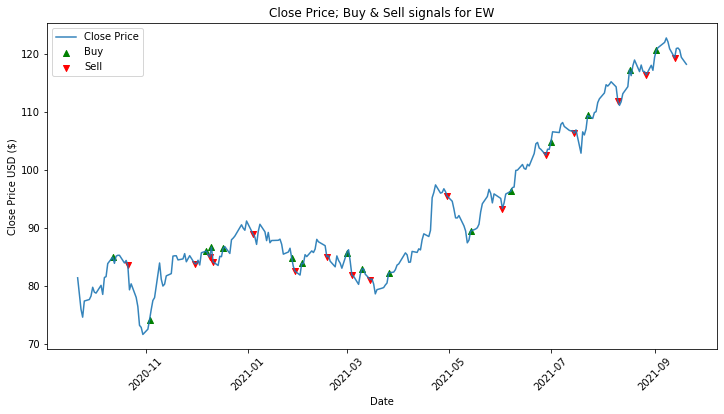

[*********************100%***********************]  1 of 1 completed
('DDOG', '28.89%', '26.54%', '0.47059', '2.25471', '-0.05464', 17)


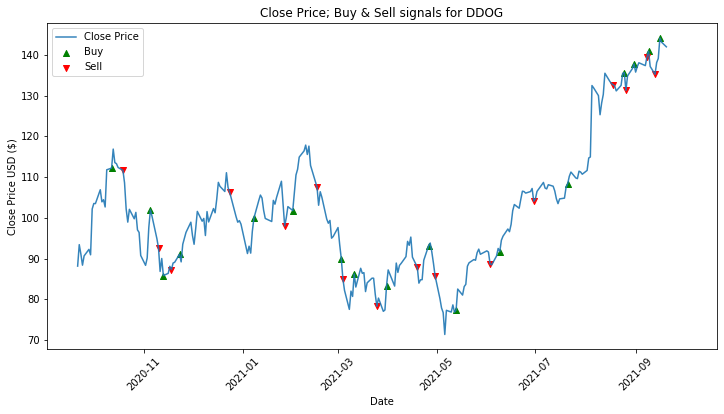

[*********************100%***********************]  1 of 1 completed
('IRDM', '62.42%', '52.50%', '0.64286', '4.03999', '1.51514', 14)


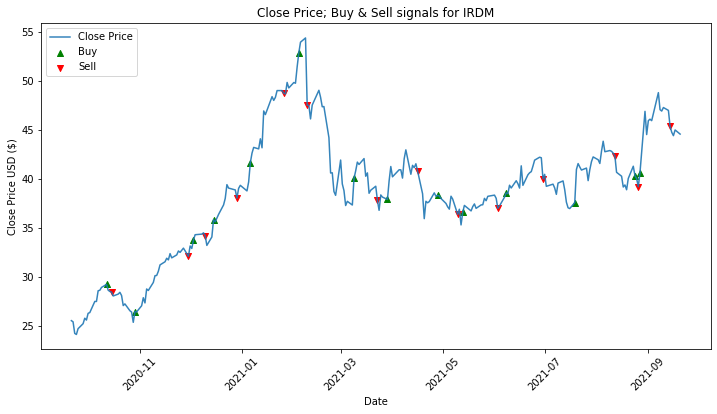

[*********************100%***********************]  1 of 1 completed
('NMTR', '158.88%', '73.43%', '0.50000', '10.04984', '1.09200', 12)


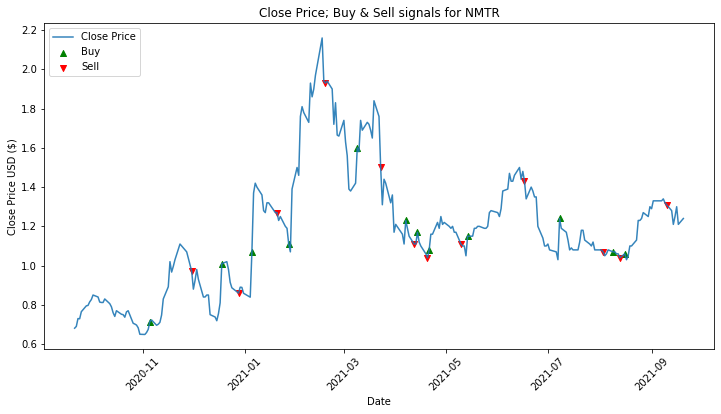

[*********************100%***********************]  1 of 1 completed
('ID', '57.22%', '-1.19%', '0.60000', '5.84002', '2.66259', 10)


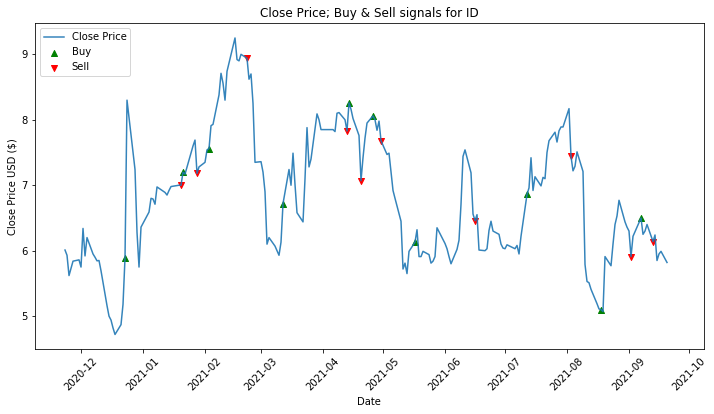

[*********************100%***********************]  1 of 1 completed
('GME', '2122.65%', '1586.38%', '0.63636', '71.37982', '8.99063', 11)


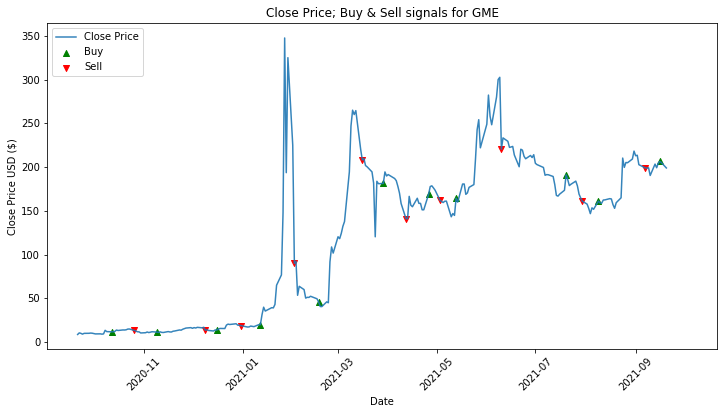

[*********************100%***********************]  1 of 1 completed
('ROKU', '103.53%', '42.30%', '0.61538', '6.19008', '1.23226', 13)


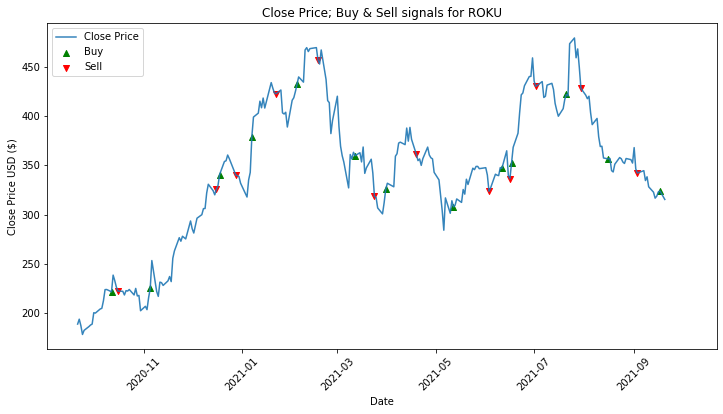

[*********************100%***********************]  1 of 1 completed
('HI', '41.21%', '37.53%', '0.62500', '2.32261', '0.24586', 16)


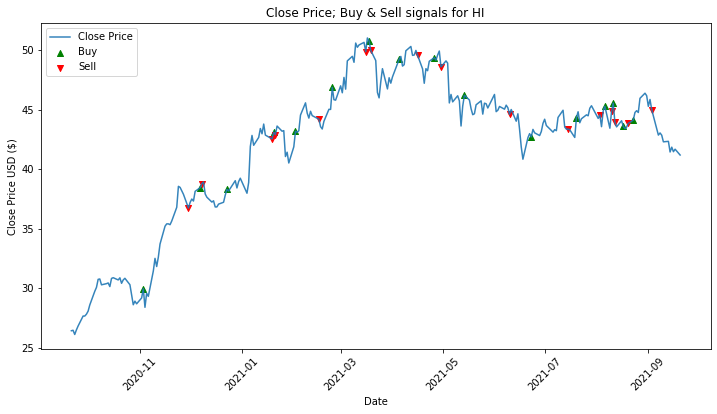

[*********************100%***********************]  1 of 1 completed
('LPG', '60.67%', '32.57%', '0.53846', '4.31603', '1.02556', 13)


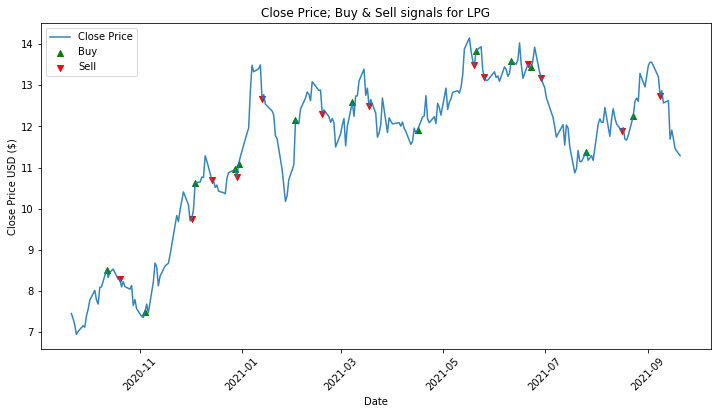

[*********************100%***********************]  1 of 1 completed
('BOXL', '131.34%', '61.87%', '0.66667', '7.83030', '3.50706', 12)


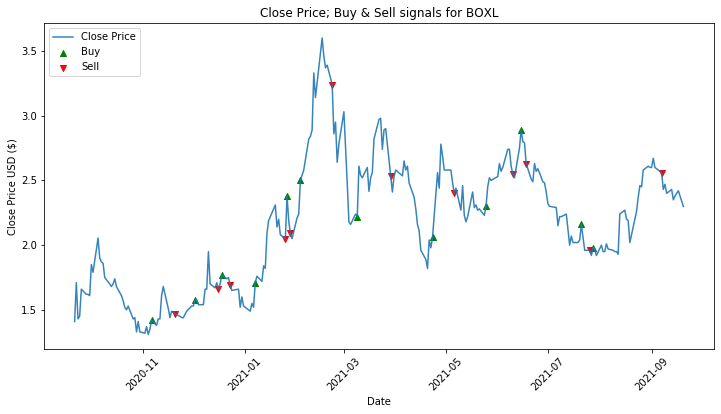

[*********************100%***********************]  1 of 1 completed
('SQ', '45.72%', '42.16%', '0.53846', '3.09131', '0.27323', 13)


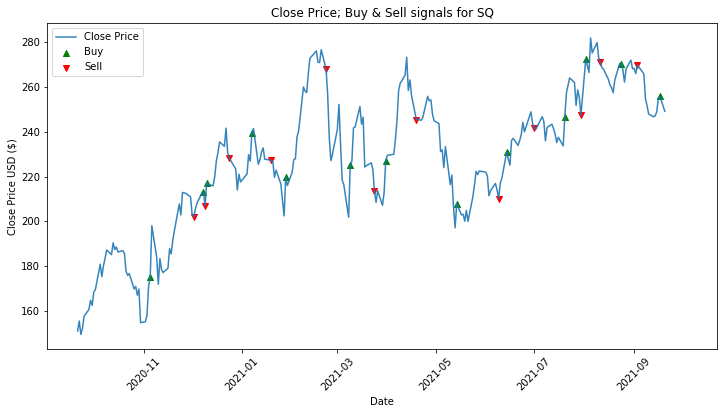

[*********************100%***********************]  1 of 1 completed
('CTLT', '57.39%', '42.16%', '0.71429', '3.76495', '2.05571', 14)


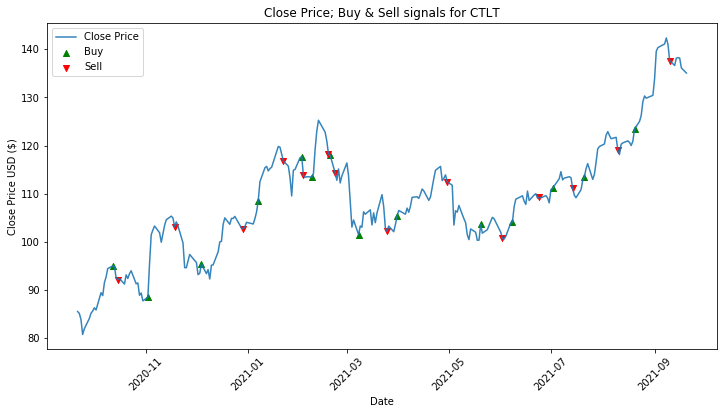

[*********************100%***********************]  1 of 1 completed
('REKR', '214.24%', '38.00%', '0.53846', '13.14434', '2.93183', 13)


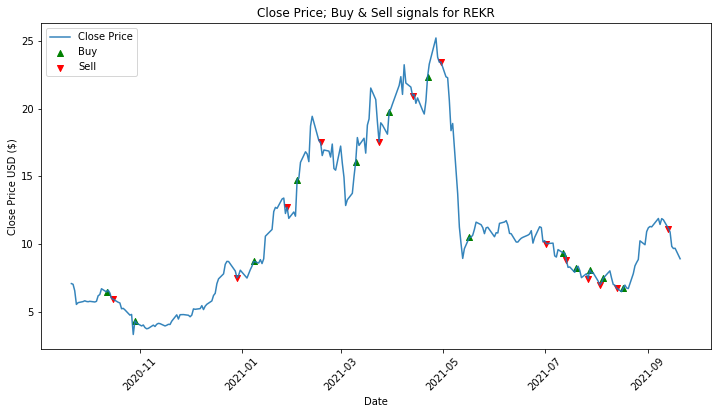

[*********************100%***********************]  1 of 1 completed
('FIZZ', '86.58%', '38.67%', '0.57143', '5.75102', '1.28654', 14)


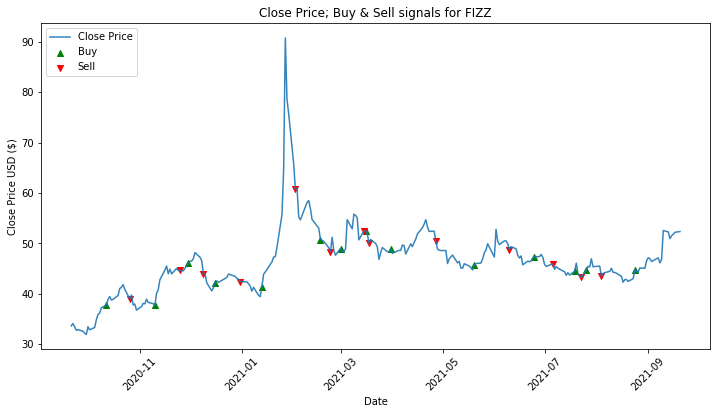

[*********************100%***********************]  1 of 1 completed
('SPSC', '63.59%', '66.44%', '0.73333', '3.75339', '0.98499', 15)


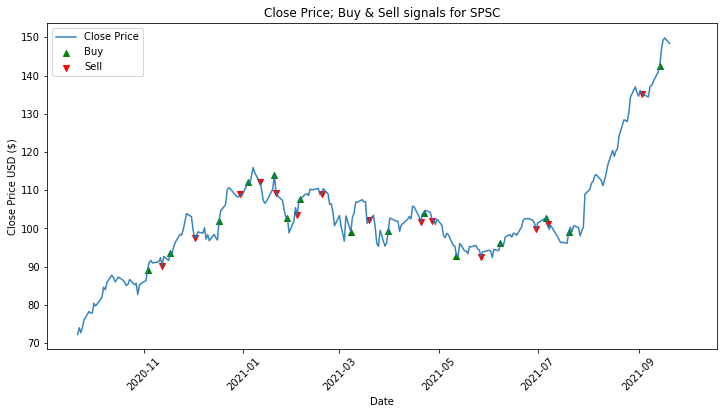

[*********************100%***********************]  1 of 1 completed
('JRO', '20.00%', '27.96%', '0.75000', '1.21541', '0.18944', 16)


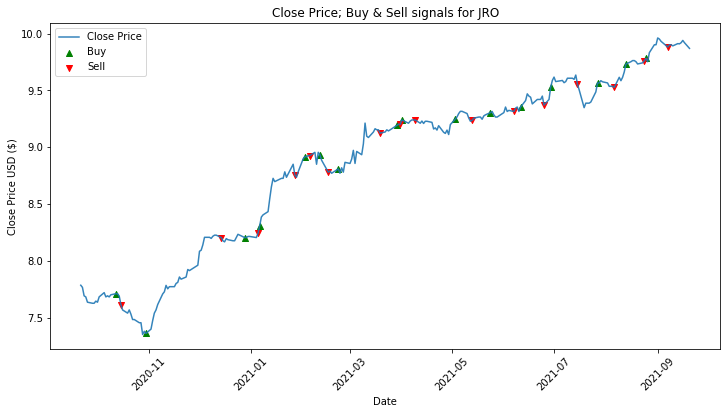

[*********************100%***********************]  1 of 1 completed
('EBON', '12.13%', '-78.94%', '0.45455', '3.95209', '-1.58098', 11)
[('PACB', '174.77%', '115.55%', '0.56250', '5.93863', '3.18820', 16), ('GSL', '224.25%', '218.05%', '0.56250', '7.52029', '4.94733', 16), ('AEIS', '54.32%', '16.68%', '0.57895', '2.50692', '0.13773', 19), ('SSY', '161.68%', '124.30%', '0.43750', '6.56135', '0.32743', 16), ('RIBT', '41.26%', '32.57%', '0.50000', '2.73743', '-0.38476', 18), ('TATT', '53.90%', '26.15%', '0.41176', '2.90898', '-0.27885', 17), ('NNDM', '151.96%', '87.42%', '0.50000', '6.68680', '0.98500', 18), ('UXIN', '192.12%', '162.50%', '0.50000', '9.92565', '0.79316', 16), ('MRNA', '448.00%', '449.60%', '0.61538', '22.26658', '9.10491', 13), ('NS', '84.00%', '45.47%', '0.60000', '4.39725', '1.60723', 15), ('TV', '78.35%', '73.01%', '0.41176', '4.06541', '0.91533', 17), ('DTEA', '273.69%', '108.20%', '0.57143', '10.70707', '4.73991', 14), ('LKCO', '507.37%', '121.36%', '0.57143', '24.5

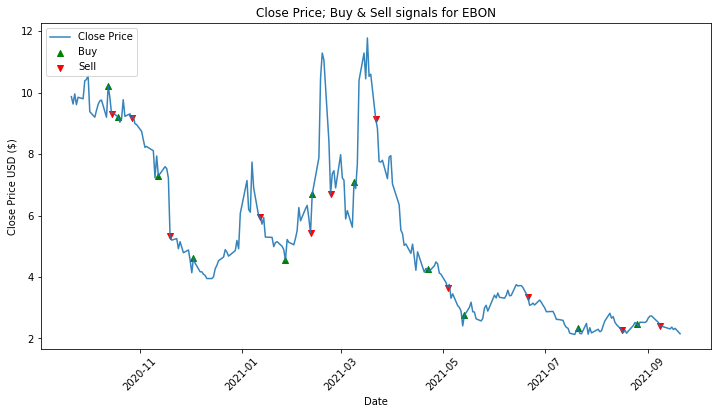

[*********************100%***********************]  1 of 1 completed
('MYJ', '24.33%', '21.68%', '0.76923', '1.74769', '0.95777', 13)


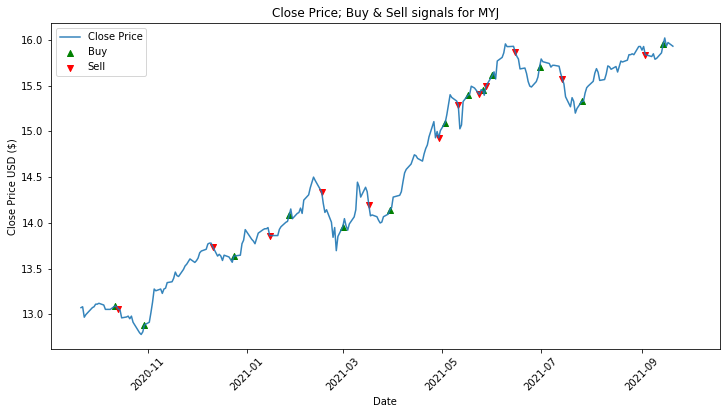

[*********************100%***********************]  1 of 1 completed
('CDNS', '45.36%', '39.56%', '0.60000', '2.67331', '1.42221', 15)


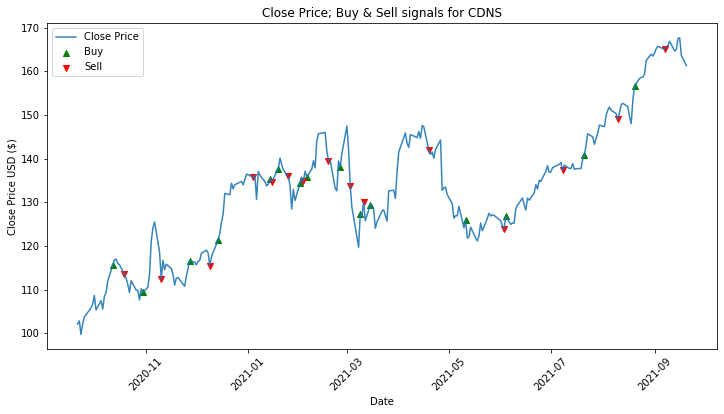

[*********************100%***********************]  1 of 1 completed
('SRV', '93.46%', '82.02%', '0.64286', '5.27741', '2.76893', 14)


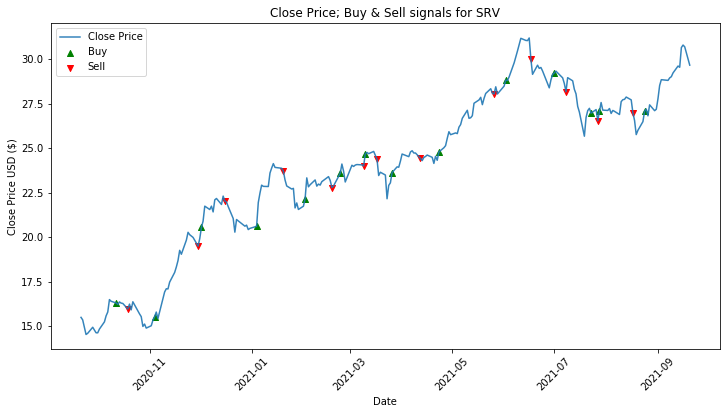

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SYX: No data found, symbol may be delisted
single positional indexer is out-of-bounds
[*********************100%***********************]  1 of 1 completed
('HUBS', '82.85%', '110.88%', '0.50000', '4.74542', '0.48805', 16)


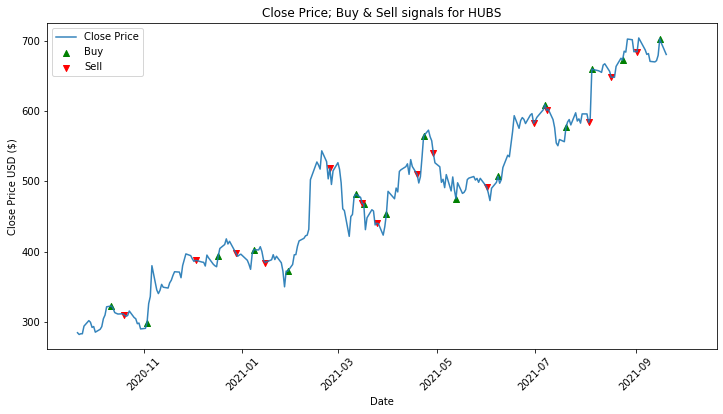

[*********************100%***********************]  1 of 1 completed
('ANGI', '68.55%', '8.57%', '0.50000', '4.20051', '1.69156', 14)


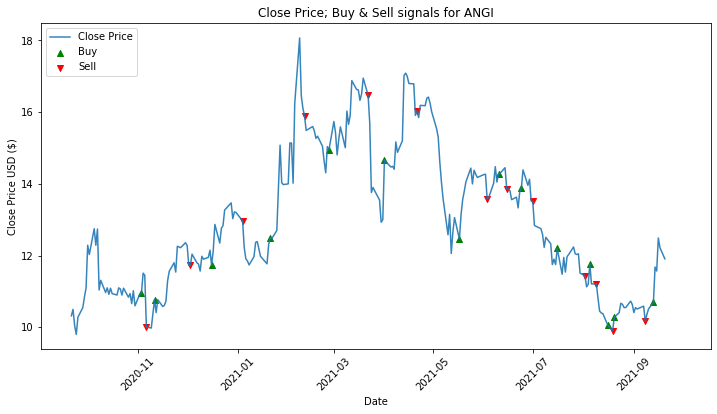

[*********************100%***********************]  1 of 1 completed
('MORN', '51.65%', '51.31%', '0.64286', '3.14188', '1.38220', 14)


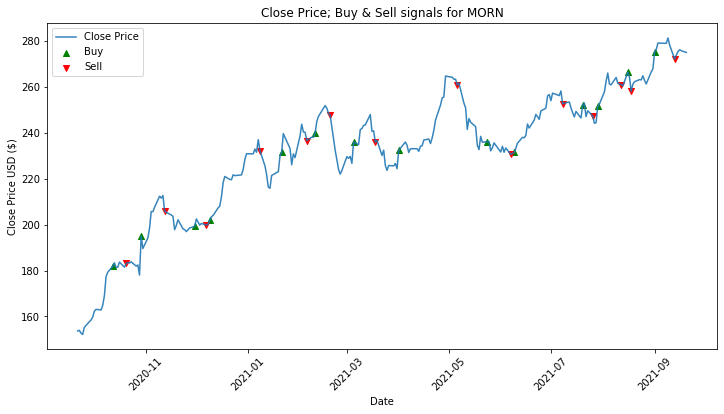

[*********************100%***********************]  1 of 1 completed
('NSTG', '83.71%', '37.22%', '0.50000', '5.75542', '1.12256', 14)


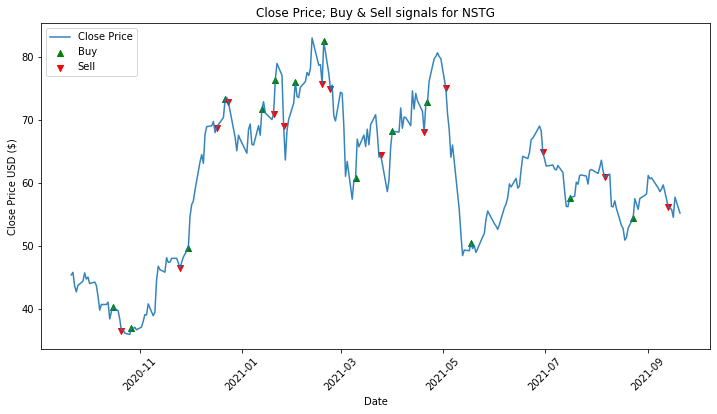

[*********************100%***********************]  1 of 1 completed
('MDLA', '59.37%', '7.82%', '0.50000', '5.72076', '1.35487', 12)


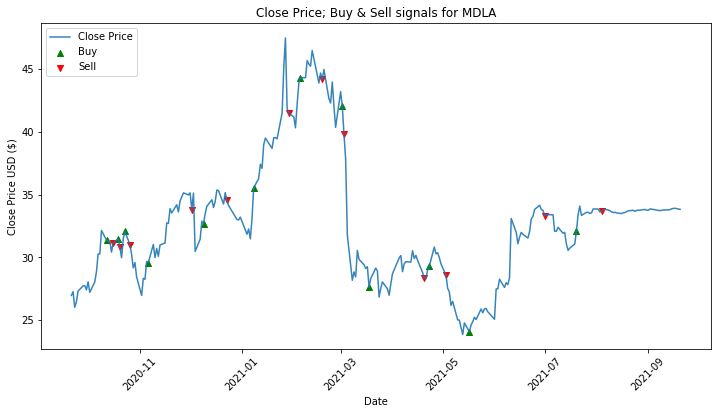

[*********************100%***********************]  1 of 1 completed
('GRFS', '24.88%', '-12.95%', '0.72727', '2.48756', '1.23094', 11)


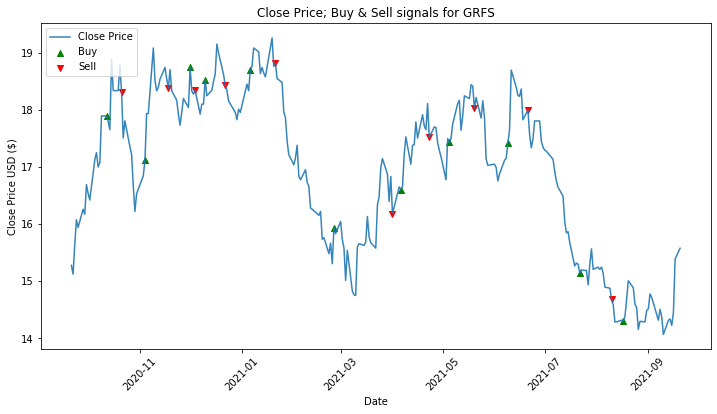

[*********************100%***********************]  1 of 1 completed
('AGR', '10.83%', '-5.86%', '0.60000', '0.84179', '0.10644', 15)


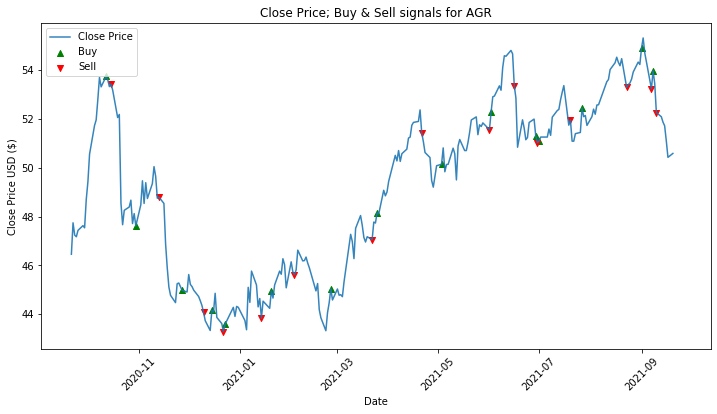

[*********************100%***********************]  1 of 1 completed
('JNJ', '14.47%', '11.36%', '0.69231', '1.08486', '0.42907', 13)


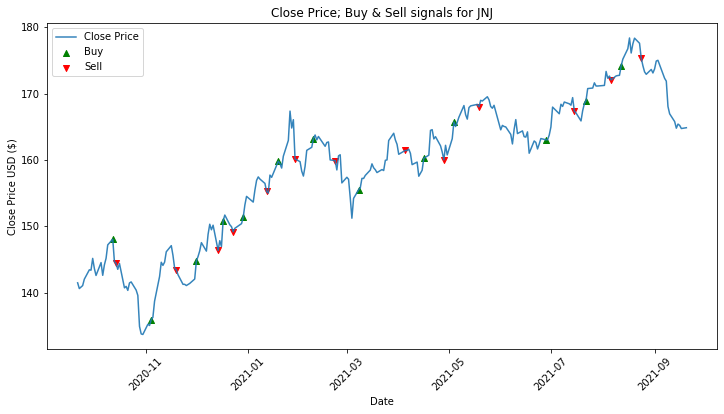

[*********************100%***********************]  1 of 1 completed
('SRAX', '221.82%', '136.65%', '0.63636', '14.96958', '7.03171', 11)


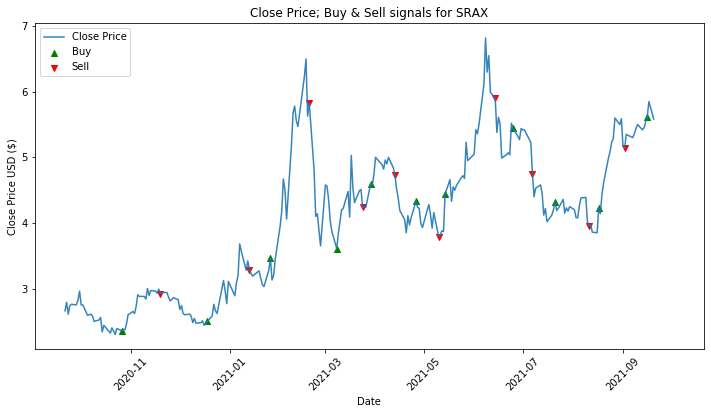

[*********************100%***********************]  1 of 1 completed
selling at close NET
('NET', '94.77%', '124.98%', '0.62500', '4.96709', '1.19558', 16)


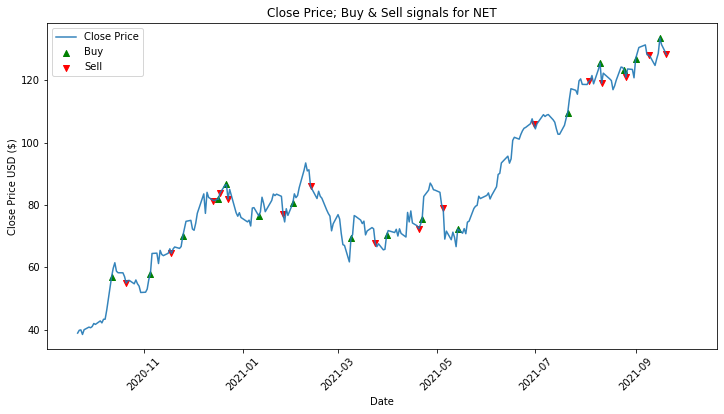

[*********************100%***********************]  1 of 1 completed
('FFC', '21.09%', '14.10%', '0.72727', '1.84969', '0.69833', 11)


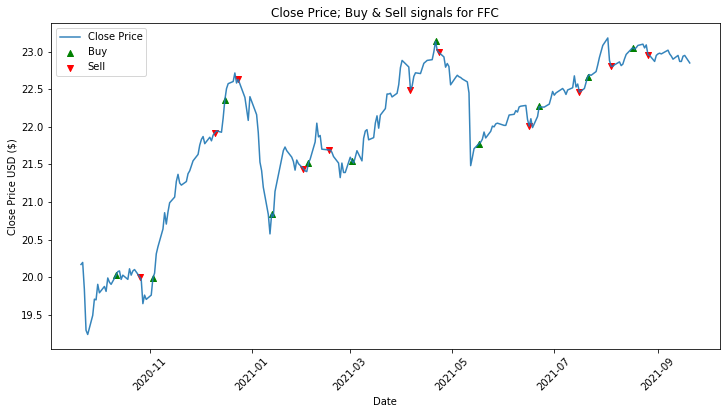

[*********************100%***********************]  1 of 1 completed
('TIPT', '118.51%', '86.28%', '0.47059', '4.99487', '1.39426', 17)


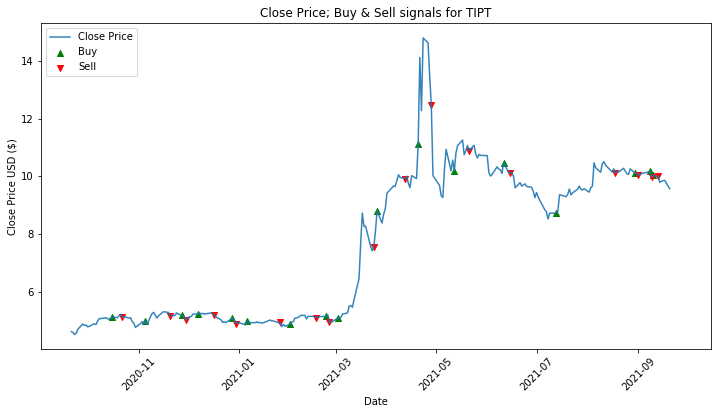

[*********************100%***********************]  1 of 1 completed
('CL', '-4.65%', '-2.75%', '0.33333', '-0.20003', '-0.74439', 21)


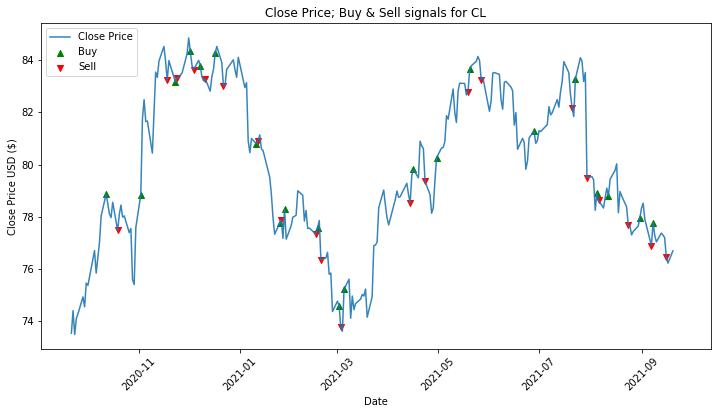

[*********************100%***********************]  1 of 1 completed
('SMPL', '64.90%', '56.00%', '0.53333', '4.28952', '0.94842', 15)


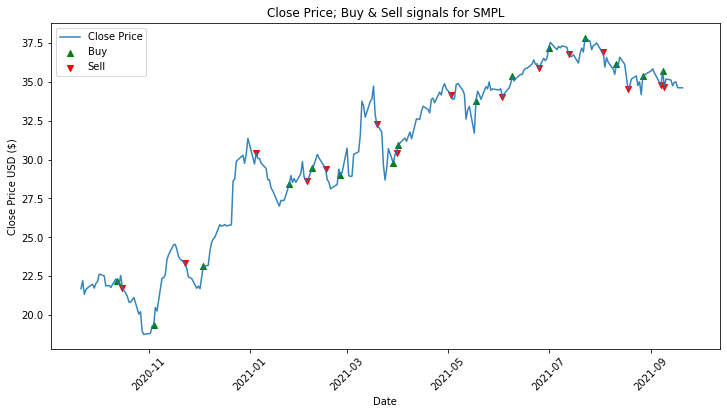

[*********************100%***********************]  1 of 1 completed
selling at close CDLX
('CDLX', '65.94%', '4.98%', '0.50000', '3.61748', '0.34175', 18)


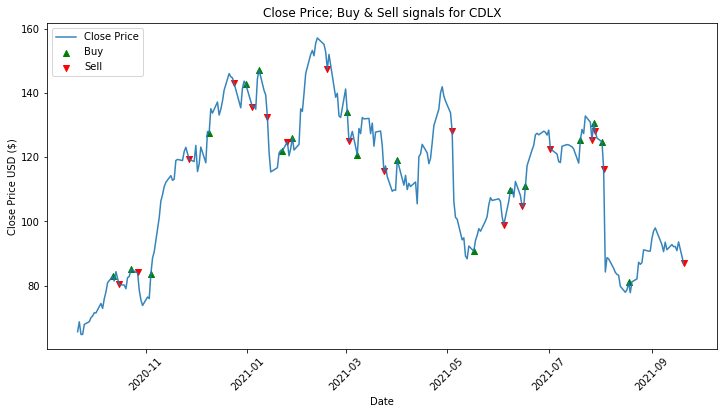

[*********************100%***********************]  1 of 1 completed
('CLWT', '25.24%', '20.45%', '0.52941', '1.21941', '-1.27683', 17)


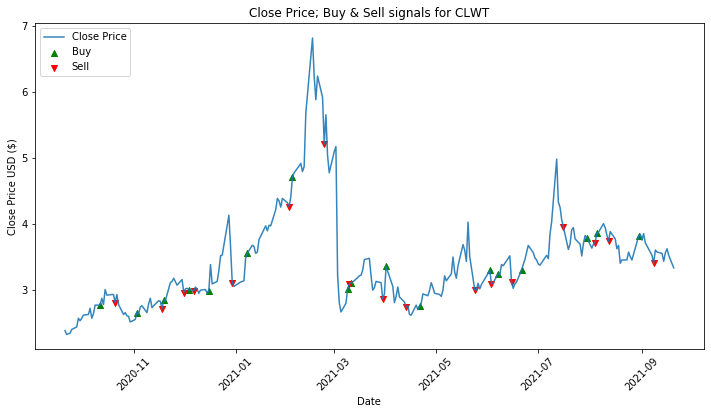

[*********************100%***********************]  1 of 1 completed
('TWLO', '19.29%', '3.03%', '0.61111', '1.19648', '-0.12562', 18)


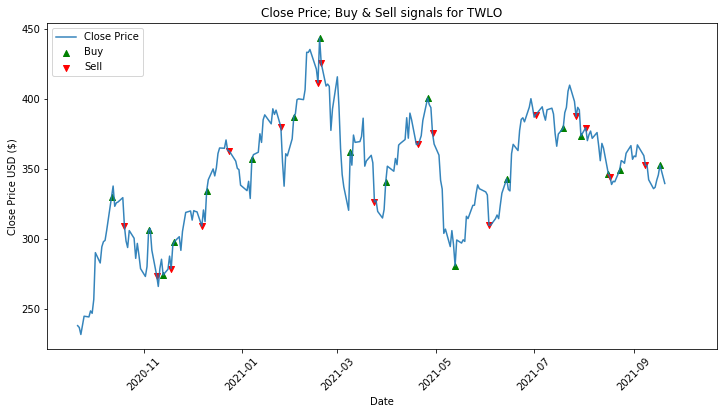

[*********************100%***********************]  1 of 1 completed
selling at close NGMS
('NGMS', '130.09%', '59.57%', '0.46154', '6.82054', '-0.03559', 13)


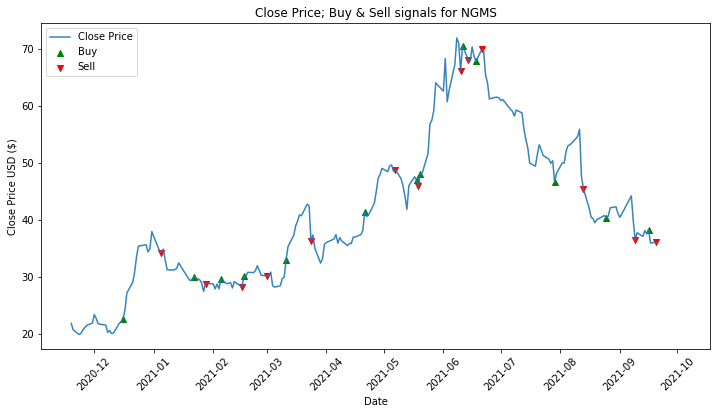

[*********************100%***********************]  1 of 1 completed
('SESN', '99.24%', '-26.31%', '0.50000', '8.46824', '-0.40075', 14)


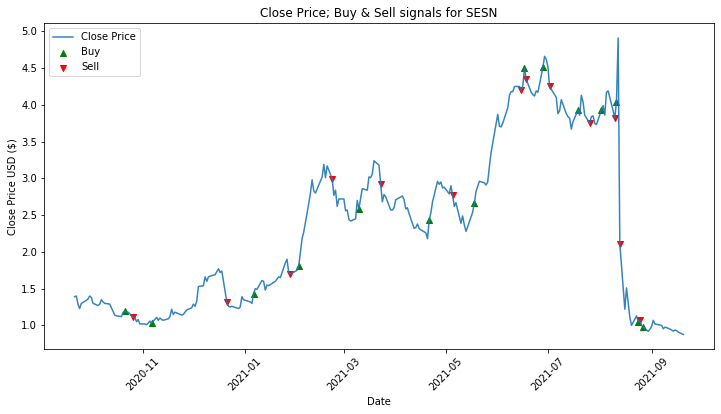

[*********************100%***********************]  1 of 1 completed
('STAA', '141.55%', '136.43%', '0.64286', '6.62062', '3.04386', 14)


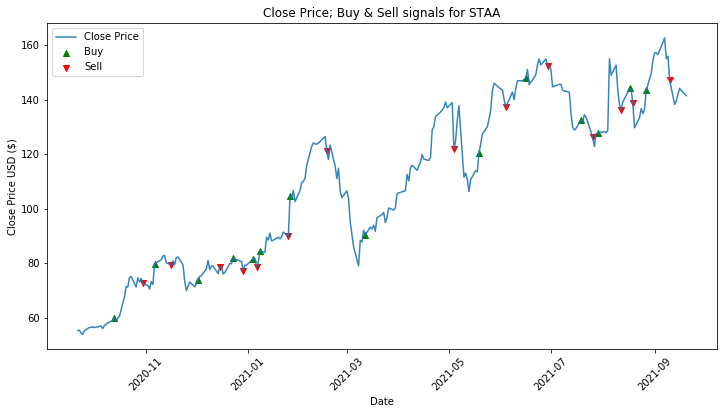

[*********************100%***********************]  1 of 1 completed
('Z', '9.12%', '0.35%', '0.43750', '0.51209', '-2.65820', 16)


KeyboardInterrupt: 

In [5]:
update()


In [ ]:
# Runs this code for when we are backtesting on every stock in the market
gathering_data=False
if (gathering_data):
    # d = {'AA': '1.2705256001557423', 'AACG': '1.4077666706094465', 'AACQ': '21.57504231933815', 'ABUS': '2.2670809867862807', 'ACEL': '3.6576565895049398', 'ACER': '209.00011920940324', 'ACEV': '15.399931335711152', 'ACGLO': '1.4498613553759585', 'ACIW': '1.7397827544979267', 'ACM': '1.7432153068920195', 'ACTC': '1.357048997498584', 'ACV': '1.2169674107586939', 'ACY': '2.2682930497544183', 'ADUS': '14.428559521977741', 'ADXS': '37.60867934258674', 'AEG': '3.967991190597769', 'AEIS': '1.6123594041138452', 'AEL': '2.092616868785461', 'AEM': '6.885950646251139', 'AES': '1.5391781139149139', 'AEY': '6.214288086307534', 'AFGE': '2.4939844626459924', 'AFINP': '1.6656035862124967', 'AFL': '1.6936870929114605', 'AFMD': '1.4434209839458976', 'AGEN': '1.409328333965313', 'AGFY': '1.790960570695805', 'AGNCO': '2.528284635803868', 'AGO': '1.2840346413680044', 'AGR': '1.9410187117298943', 'AGTC': '1.7391275953933387', 'AHCO': '1.3491772971733675', 'AIM': '2.485713623981357', 'AIN': '10.917027517632683', 'AINV': '1.625130837511771', 'AIRI': '6.77419335456348', 'AL': '1.2352842810824782', 'ALBO': '1.5041890492033514', 'ALC': '1.7284750639648157', 'ALEC': '1.8549067656769282', 'ALGT': '1.6720916899407714', 'ALIM': '1.347857320779043', 'ALL': '1.398508994483739', 'ALPN': '1.4093750829972755', 'ALRN': '2.8357581846088187', 'AMAL': '3.0836485675130647', 'AMBA': '1.481118261497703', 'AMCX': '8.19816123036639', 'AMPE': '1.7963802017965165', 'AMSF': '27.026465225319093', 'AMTX': '1.257268876704057', 'ANGI': '4.533090578747222', 'ANIX': '12.27277229654162', 'ANTM': '1.2493439573967031', 'AON': '1.681257626160782', 'APLE': '62.51729569962323', 'APLT': '1.4136315600510336', 'APOG': '1.2757965164903093', 'APPF': '3.0184727085755196', 'APTO': '17.23747706202973', 'APVO': '1.474041564442074', 'AQB': '1.6606218499872822', 'AQMS': '2.4558257471606133', 'ARDC': '1.2736948779952961', 'ARL': '2.035012580501818', 'ARMP': '12.399964714184899', 'AROC': '3.102809548019944', 'ARVN': '1.2299372337229642', 'ARWR': '1.3703704550736566', 'ASH': '2.502400017884106', 'ASIX': '1.2226727900881704', 'ASR': '1.6450663768620106', 'ATNM': '164.99508602489746', 'ATOM': '1.683217018405782', 'ATOS': '1.4120881352184294', 'ATUS': '1.4657929324254315', 'AUMN': '1.3157894519592344', 'AVDG': '1.4531253131170816', 'AWP': '1.2991622355969885', 'AXL': '2.1470021879174057', 'AXTA': '12.514294225997363', 'AYRO': '2.484373707789658', 'AZEK': '1.5658926133116675', 'AZPN': '3.029893540930247', 'AZZ': '1.4598921791572839', 'BAND': '1.5846316396119489', 'BATRA': '5.757895413131382', 'BB': '2.2765293934073343', 'BBU': '2.196157032891095', 'BBVA': '1.639460665581198', 'BCAB': '4.544343224713635', 'BCAT': '1.2471546924350878', 'BCEI': '1.7252604439115296', 'BCOV': '11.732402015522062', 'BCSF': '2.8255769348606905', 'BCX': '1.7546114760634948', 'BDN': '1.2131010566322342', 'BERY': '1.2404111238543114', 'BFI': '5.231113255779036', 'BFK': '2.0018562269339784', 'BFZ': '2.2924758612637413', 'BGH': '2.9817043086821964', 'BH': '1.324363997279584', 'BHC': '1.6910333919671734', 'BILL': '1.2781237596446022', 'BIVI': '3.8367631129670303', 'BJRI': '1.6993763060018883', 'BK': '1.9533241657281726', 'BKNG': '3.457918359285387', 'BLE': '2.4117185630737454', 'BLIN': '1.2742029338210321', 'BMTC': '1.8764974763102373', 'BNGO': '2.791569105350141', 'BNS': '1.4405353117150135', 'BOMN': '1.227278356108686', 'BPMP': '1.350434909309491', 'BPYPN': '2.369503518361738', 'BPYPO': '2.613345490148429', 'BRC': '2.102738579016995', 'BSQR': '3.4999997682041686', 'BSVN': '2.6303437494731288', 'BSX': '3.569791477224842', 'BTA': '1.5134595958600074', 'BTAQU': '1.7333456251668935', 'BTN': '2.1442308662205796', 'BTRS': '1.5449328948148453', 'BUFF': '4.359924945831441', 'BW': '1.7136605122534125', 'BWG': '2.282721056378275', 'BXC': '1.9388399470993325', 'C': '4.2909634259074485', 'CAAP': '6.100001430510565', 'CAAS': '1.7350426993382968', 'CACI': '2.076186975222054', 'CAE': '5.227157867069466', 'CAF': '1.2518751424297492', 'CAN': '11.878608018608285', 'CAPA': '3.3624707200980675', 'CAPR': '3.2549026574322317', 'CAR': '1.201720896304805', 'CASA': '2.485147116032867', 'CB': '2.0151991501741477', 'CBLI': '1.7114757278343113', 'CBZ': '1.8921024095605905', 'CCAP': '1.4245112203714183', 'CCIV': '1.8482904332251238', 'CCK': '1.2677823162470305', 'CCNC': '3.979167059891738', 'CCO': '6.851068470802842', 'CDAK': '2.2744152081134614', 'CDR': '3.683709674944348', 'CDZI': '2.5748997483380194', 'CEE': '3.488076998912417', 'CENHU': '3.7500357636736448', 'CEQP': '5.075625390112638', 'CEVA': '2.4995913157760534', 'CF': '2.1494853756545758', 'CFACU': '12.517648576781967', 'CGA': '1.3106522001139653', 'CHCT': '1.7163719305178544', 'CHGG': '1.4728988696001637', 'CHNG': '1.3931108948499296', 'CIDM': '3.0952394423123426', 'CLII': '2.4870469521579106', 'CLLS': '2.193553464762735', 'CLNE': '1.2009934204745856', 'CLNY': '2.1243104918965026', 'CLS': '2.3625033602130507', 'CLSK': '2.539262578003221', 'CLVR': '16.999923706345726', 'CLWT': '1.7545637577562405', 'CMLF': '2.694300487411501', 'CMLFU': '2.156996258212014', 'CMPR': '7.0653419250801415', 'CMPS': '5.672131625959147', 'CND': '1.4000114441572808', 'CNET': '1.7142855318224974', 'CNI': '1.5449787436776579', 'CNMD': '1.399833017266746', 'CNQ': '1.9782218955255964', 'CNS': '1.336548027252512', 'CNSL': '1.5687426023003386', 'CNTY': '1.245762614834916', 'CODX': '1.484637875092396', 'COKE': '1.8717789943284968', 'COMM': '1.5201794062372438', 'CONE': '1.2547179362381395', 'CONN': '2.1740099430021926', 'COP': '1.6294408950088768', 'CORT': '1.4126150440187761', 'COUP': '2.3453484634464115', 'CPG': '10.922772170796053', 'CPLP': '3.428520162353065', 'CPSH': '2.001680690755145', 'CPSS': '1.5929209944205838', 'CPTA': '1.9675959002853884', 'CQP': '3.3148553212203473', 'CRC': '1.2108541714852392', 'CRDB': '1.2903225806451613', 'CREG': '1.2407077731797924', 'CRESY': '48.00003973646775', 'CRK': '16.149212386669785', 'CRNT': '2.5633811692762865', 'CRTO': '1.2630254569159305', 'CRUS': '1.4186332104258292', 'CRY': '9.034476975339294', 'CTXR': '2.651933739136643', 'CUB': '2.4636890501691093', 'CURI': '3.467532033239886', 'CURO': '1.9214328899637243', 'CUZ': '1.905118248553503', 'CVEO': '6.5270493635788736', 'CVGI': '1.3009259361462018', 'CVLG': '1.5129217188814443', 'CVV': '1.2352965925792951', 'CW': '121.52516496312589', 'CXE': '5.057928222522367', 'CXH': '1.4280564251555896', 'CYBR': '2.937320610943233', 'CYTHW': '1.6937731401921696', 'CZR': '1.422467639082791', 'DB': '1.8357932089239986', 'DCBO': '1.539666045517239', 'DCO': '1.9552944407743567', 'DCP': '1.6322059167607983', 'DCRBU': '3.382927517623598', 'DD': '2.493085580165095', 'DDF': '26.54552923642994', 'DESP': '2.5714293248249764', 'DFHT': '1.8397975114252805', 'DFHY': '1.4392050092628348', 'DFIN': '1.2486535797509326', 'DGLY': '2.5000015685433032', 'DHCNI': '1.356514905705775', 'DIAX': '1.2659314548120495', 'DIN': '2.4526845117648928', 'DISCK': '257.9076501595228', 'DISH': '2.2995840067788538', 'DKL': '1.4274074114451472', 'DKNG': '1.415629120390544', 'DMAC': '6.655326250369325', 'DMB': '1.2113115303144315', 'DMTK': '2.536586861842701', 'DNMR': '2.5493180982183192', 'DOX': '1.4507218476916834', 'DPG': '1.4608068110608223', 'DRH': '5.837805699980743', 'DSE': '3.324168661391597', 'DSL': '2.9568795893241875', 'DSM': '1.5625786740248588', 'DSPG': '16.916638409697793', 'DSX': '1.575000521540621', 'DTEA': '1.8334843137838732', 'DTIL': '1.3678551041344518', 'DTSS': '1.6218545523501677', 'DTW': '1.3653766935293092', 'DXC': '1.5449404058625877', 'DXPE': '55.46345099973018', 'DY': '2.4556133384315415', 'EAD': '1.3620180889867708', 'EARN': '1.3550731970185368', 'EB': '51.87078077893312', 'EBS': '2.1281573029378804', 'EDAP': '1.2141712327731047', 'EDD': '3.701783019920272', 'EDIT': '2.0863078791889267', 'EFOI': '1.7285221743243644', 'EGHT': '8.870367394226031', 'EGO': '5.541468100745262', 'EGY': '2.5410955235443238', 'EHI': '1.4531468212335845', 'EIM': '1.2819940727045325', 'ELAN': '2.812719652525669', 'ELAT': '7.287131912404352', 'ELP': '3.2783640239719696', 'ELY': '1.4559899084621328', 'ELYS': '11.619792390787083', 'ENDP': '1.744897811475355', 'EOG': '15.189306336011393', 'EOSE': '4.414027987967306', 'EOSEW': '1.7771766326006722', 'EPAC': '2.340709966484443', 'EQH': '2.165736847866557', 'EQNR': '1.8261502671637204', 'ERF': '223.47711003828866', 'ES': '2.374448355107651', 'ESSCU': '1.4152369880245776', 'EUCG': '2.6585001745287724', 'EURN': '1.2461692904616932', 'EVER': '1.8776083080769512', 'EVLO': '1.3411140969286375', 'EXAS': '637.6108144192257', 'EXC': '1.9646282449415533', 'EXFO': '1.4054060236567099', 'EXK': '1.6800002712673898', 'EXPE': '1.4810992080148313', 'EXPI': '1.458208793691847', 'EXPR': '1.2675366015323666', 'EYEG': '6.259519711536278', 'EYEN': '4.376811894667371', 'FAII': '2.2242848412423464', 'FCO': '1.2674220829600544', 'FCPT': '1.5824345266701383', 'FDEU': '1.646121079447704', 'FDUS': '1.727647464113236', 'FENG': '1.2246756708008908', 'FFBW': '1.3443650741826505', 'FGRO': '1.5936170097640028', 'FHI': '2.087715459296518', 'FICO': '1.311750065507717', 'FINS': '1.5629455357756292', 'FITBO': '1.2536890629728465', 'FIV': '1.297158822240419', 'FIZZ': '1.6858722857543895', 'FLY': '9.928601839237057', 'FMBI': '461.4366288492707', 'FOXA': '4.52892996944114', 'FPAY': '3.2812485680917765', 'FPH': '1.2526686756045056', 'FRAF': '6.767384013550964', 'FRGI': '1.5994071088640494', 'FRSX': '1.723708038859687', 'FSD': '1.3917162770835552', 'FSEA': '3.519176061625939', 'FSI': '1.8478901718166134', 'FSLY': '1.998890255480981', 'FTCVW': '2.2727264353067524', 'FTFT': '2.209295043717603', 'FTHM': '1.8966306803176824', 'FUSE': '1.369233026446099', 'FWONA': '5.051023156780238', 'FWONK': '2.0940223257210397', 'G': '1.291141495999818', 'GAIA': '1.4470335423638012', 'GAIN': '1.2012532488233723', 'GAM': '1.4280505195766369', 'GBIO': '8.02278001562577', 'GCP': '1.3179355544268108', 'GDOT': '1.2771014198017347', 'GE': '1.3497960283737294', 'GEVO': '2.046913226997861', 'GH': '1.2688962869109892', 'GHL': '2.3058471584928553', 'GHVIU': '1.9989279472119468', 'GIB': '2.0086943594431235', 'GILT': '4.425521657578049', 'GLG': '1.5826115337657771', 'GME': '1.346802271154024', 'GMS': '1.2951940340685504', 'GNPX': '1.7078154286620681', 'GNSS': '1.3653855029883324', 'GNUS': '2.4497912372191366', 'GOAC': '10.249958276708867', 'GOLD': '2.2322430699303086', 'GP': '4.116113908480266', 'GPN': '1.8799988165778303', 'GPP': '6.107229263181441', 'GRA': '1.9968672645774133', 'GSAT': '1.2090911714006076', 'GSBD': '1.2891204249252624', 'GSL': '1.6528542972987899', 'GSLD': '4.274743862847414', 'GTYH': '2.352380552313568', 'GWRE': '3.314582043153822', 'H': '7.317603828658636', 'HAFC': '46.372405837089545', 'HAL': '6.64559292144181', 'HBM': '1.3789427554611489', 'HCKT': '3.0185110594303954', 'HCM': '1.415822713182788', 'HDB': '2.01118466594338', 'HGLB': '3.1379460347070265', 'HGV': '1.8458179127086292', 'HIE': '3.4599825992898627', 'HMY': '1.898430204990653', 'HNGR': '2.713252857001694', 'HNW': '1.355015678881733', 'HOG': '2.1044216343050275', 'HOLX': '1.9312046008814108', 'HOOK': '1.6868206379348651', 'HPI': '1.7816089195818061', 'HPK': '7.877152278650976', 'HQY': '1.2621324882731448', 'HROW': '5.075691591582473', 'HTBX': '3.473573793027249', 'HTD': '1.7588603036942831', 'HWCC': '2.2549116303894086', 'IAA': '1.5685075231146', 'IART': '3.067546497487769', 'IBIO': '2.2543972220968493', 'ICMB': '4.42207335255448', 'ICON': '1.2557974079684417', 'ICUI': '1.406307198715733', 'ID': '1.2253305257050429', 'IDEX': '5.528301299021449', 'IDXG': '5.077914200231987', 'IEP': '3.0607808794719196', 'IFF': '1.319845041558346', 'IGACU': '4.347825005286661', 'IHG': '994.961898395722', 'IIF': '1.2871872737590873', 'IIIV': '1.7024304218271744', 'IMBI': '2.0750855011387945', 'IMGN': '1.2987912713269332', 'IMO': '4.257443811311974', 'IMRN': '4.048662701183219', 'IMTX': '2.4224494929712743', 'INDB': '5.544646147321787', 'INFN': '1.2678937797803858', 'ING': '2.2617781762711804', 'INSG': '2.880174657464159', 'INSM': '2.7120466543869024', 'INSW': '1.70101030598319', 'INVO': '1.2279872333582122', 'IOSP': '6.511010699605267', 'IQI': '1.7832611043383422', 'IRDM': '1.3927058431907402', 'IRWD': '1.2668361710904075', 'ISD': '1.2555556948310984', 'ISEE': '1.2433961437189855', 'ISR': '3.215849364964296', 'ITGR': '2.798964280543726', 'ITI': '2.9499995708465576', 'ITIC': '1.3793791646464753', 'ITRI': '1.2816154041779362', 'IVA': '1.4419435634679885', 'IVDG': '2.7545691775978325', 'IVSG': '1.3692972153243512', 'IZEA': '1.3586001982280285', 'JACK': '1.2090080536034624', 'JAGX': '19.163613467598953', 'JAN': '1.2478591827337422', 'JAX': '2.0310069840011886', 'JDD': '2.2158769741654276', 'JEMD': '7.148002414540902', 'JMIA': '1.6191629104542822', 'JMPNZ': '2.2266445279298805', 'JNCE': '1.7159999847412108', 'JPC': '1.7065319117854043', 'JQC': '2.373985908022436', 'JRI': '1.8723151770975206', 'JRO': '1.817945425433181', 'KBH': '1.5916505457376366', 'KBNT': '9.818176596618574', 'KBR': '1.3332850032050836', 'KMB': '1.2443518666880307', 'KNGS': '2.4609835484106535', 'KNL': '1.3221786011458372', 'KNOP': '1.3432812826298912', 'KODK': '1.3734294175913448', 'KOP': '4.28504130213124', 'KOSS': '1.6490082292756414', 'KPTI': '5.5614006615480625', 'KRMD': '28.774996095896697', 'KTF': '1.8962365700967305', 'KURA': '1.775506907330061', 'KXIN': '1.764286125436093', 'KYMR': '1.28164155228343', 'LAZR': '1.5678173481001625', 'LBRT': '4.745790427394807', 'LC': '7.628974513642935', 'LDOS': '2.1637105621733235', 'LEDS': '1.3603033438011454', 'LEG': '1.2194052888627456', 'LEO': '1.9027959995509842', 'LEU': '1.4719881992143347', 'LGND': '1.5632581025219523', 'LITB': '2.8218685480852925', 'LLNW': '8.631577527424403', 'LMST': '2.2758669223827903', 'LMT': '3.6240908928356195', 'LNDC': '4.858155471926801', 'LNTH': '2.717390922581155', 'LOCO': '1.2147740972677297', 'LODE': '1.4388186726316918', 'LOMA': '1.3155339199047806', 'LPI': '6.208297251398273', 'LPTX': '24.111098380741083', 'LRMR': '1.3613633890513657', 'LSXMA': '1.7320973148771766', 'LSXMK': '1.9462587368617978', 'LTRX': '1.5723681847392368', 'LUMN': '1.6757787744021126', 'LX': '110.66399781521201', 'LXRX': '1.265306202992072', 'LYG': '2.0311461197842986', 'LYL': '1.440384527873365', 'LYV': '4.302674994160274', 'MACK': '1.6529746142332726', 'MAIN': '1.2049403404725416', 'MARA': '1.5113687206229895', 'MARK': '2.4740743618770433', 'MATW': '1.3729396782436651', 'MAXN': '2.662789253494773', 'MBII': '7.157892970167571', 'MBNKP': '1.4163848622200788', 'MCHP': '1.3308960878329419', 'MCRB': '1.2033423786727402', 'MDIA': '3.1363651141645543', 'MEOH': '3.7208257289039617', 'MERC': '2.319413047919701', 'MFD': '1.254552800470696', 'MFIN': '1.252500534355704', 'MFL': '1.6083829599255433', 'MGLN': '1.4497708278416013', 'MGM': '1.4497688363162116', 'MGRC': '1.7803988201140868', 'MGU': '3.7139761292164697', 'MHD': '2.4416208061188853', 'MHO': '1.6097672041072402', 'MIME': '1.2694709246689397', 'MKL': '3.0337191877077188', 'MODN': '3.0182834458561323', 'MORN': '1.6395387833001018', 'MPA': '1.2645503538477014', 'MPC': '2.1453358417162374', 'MRCC': '3.8836399403086803', 'MRIN': '2.1924341764724153', 'MRLN': '5.624549556850383', 'MRNA': '1.2025906083650342', 'MSTR': '1.5294308101053853', 'MTL': '2.7551003328615242', 'MTLS': '7.900513476008268', 'MTNB': '6.875002733229511', 'MUA': '1.7526476294695006', 'MUDS': '2.6414135575913456', 'MUDSU': '1.8308253647155188', 'MUDSW': '2.2061612900637866', 'MUFG': '2.52727204157325', 'MUJ': '1.3033968670328444', 'MUR': '4.58986544265678', 'MVF': '1.3243280327565146', 'MVO': '1.352937286940167', 'MXE': '1.2767731813723886', 'MXF': '1.9067489012558072', 'MYC': '1.4086652264059087', 'MYD': '1.5194866556081967', 'MYI': '1.637179681098409', 'MYJ': '2.934711560044893', 'MYOV': '1.3421053805972565', 'MYT': '2.6908889029808956', 'NAC': '1.635013750479217', 'NAD': '1.5051581148049076', 'NAT': '1.2471882774960306', 'NATI': '12.282408005999327', 'NBN': '1.307079663506164', 'NCTY': '743.5971742737797', 'NCV': '1.2361660703699506', 'NDLS': '1.4216218494167208', 'NEA': '1.6312397848661795', 'NEP': '1.4447296494201456', 'NEV': '1.6104762223141955', 'NGD': '1.6043951293434109', 'NHS': '1.613289789934632', 'NHTC': '1.7399994923769715', 'NKTX': '2.3523512297618123', 'NM': '1.5505592122006038', 'NMRK': '1.6513217112145822', 'NMTR': '2.3198751152989034', 'NNBR': '10.070596207106462', 'NNDM': '1.729485364000088', 'NOA': '4.18789827558384', 'NOAH': '1.7594759799611406', 'NOK': '3.3469015647144094', 'NPTN': '1.9771238183867759', 'NQP': '1.4216601801433075', 'NRK': '1.5956277035916842', 'NRUC': '2.129904022163954', 'NSL': '2.0259089223226474', 'NSS': '1.459220203639902', 'NTB': '1.6854733863263434', 'NTCT': '2.746164353862381', 'NTNX': '1.7659392082672671', 'NTR': '1.2811713373530644', 'NTRSO': '1.3152284300869899', 'NUO': '1.4123298779775852', 'NUW': '2.835858918248928', 'NVAX': '1.2603595303063087', 'NVCR': '1.5368526080859684', 'NVEE': '1.3260569718209878', 'NVG': '1.472143359188463', 'NVGS': '275.99365821094796', 'NVRO': '1.5016229755649804', 'NVT': '1.41562358376357', 'NWHM': '3.7294695082172646', 'NWPX': '1.616354253387043', 'NXJ': '1.971222528204508', 'NXP': '1.2890709185415405', 'NXTD': '3.653507883864317', 'NYMTN': '1.5731623671544268', 'NYMTO': '1.638962735323117', 'NZF': '2.2376154069260594', 'OCCI': '4.3671465028840455', 'OCCIP': '1.5521806562582525', 'OCSI': '1.660920109043319', 'OEC': '1.3309686903405182', 'OESX': '1.5292728322642093', 'OHI': '1.3616517022207262', 'OI': '1.9143938715721673', 'OIA': '1.406744145965597', 'OII': '5.451126160363573', 'OM': '6.286742642143068', 'OMAB': '17.25188914676086', 'ONCT': '20.82357895179726', 'ONCY': '2.1156460648689905', 'OOMA': '1.5003654474774093', 'OPEN': '1.509064805493626', 'OR': '2.951903033468945', 'ORC': '2.250282491537781', 'ORLA': '1.2295688001621443', 'OSH': '1.795931151138892', 'OSTK': '1.5801831827048642', 'OTLK': '6.503028998187297', 'OTRAU': '1.5843103815817523', 'OTTR': '1.3642413344031352', 'OVID': '1.8980102189056338', 'OVV': '1.9046736867646834', 'OXLC': '7.704343715995647', 'PAC': '1.7816438333205429', 'PACB': '1.2477477937493715', 'PANL': '1.48438284893257', 'PANW': '1.341324504815378', 'PASG': '1.3139723000315895', 'PBPB': '2.206767090490074', 'PCGU': '3.69085197774891', 'PCK': '4.3154102826012934', 'PCOM': '1.4655586526688722', 'PCQ': '2.364142986748293', 'PDAC': '2.3617041135805175', 'PDI': '2.13416379252904', 'PEN': '1.415141392283835', 'PEO': '3.4198500392489195', 'PFD': '1.4299318430666041', 'PFH': '1.4259926166143932', 'PFLT': '1.3262210196917024', 'PFN': '1.3060476490859543', 'PFSI': '1.3123320824631544', 'PGC': '1.9262194696831174', 'PGTI': '1.4740261252241134', 'PHD': '1.3209585166574032', 'PHG': '5.652143619006106', 'PHK': '4.3266838746070375', 'PI': '2.4522886240494803', 'PKOH': '7.476724117767987', 'PLCE': '4.421504585476344', 'PLG': '1.7764697401580982', 'PLNT': '24.043167229451296', 'PLT': '4.099073079677665', 'PMF': '1.841413248572771', 'PML': '5.785434670938817', 'PMX': '2.025059284782055', 'PNF': '1.9308090589487243', 'PODD': '1.3256829537368517', 'POST': '2.608750343322754', 'PPR': '3.12003203214304', 'PPT': '2.4198618231285662', 'PRGS': '2.4173002921177758', 'PRI': '1.4562736070400144', 'PRT': '5.9008554621466525', 'PRTK': '2.9932419610250065', 'PSAC': '1.8232442059668605', 'PSACU': '1.215686258795942', 'PSF': '1.3246840971795781', 'PSN': '4.490742877461011', 'PSTG': '1.8904887595580446', 'PTVE': '1.7453096283056453', 'PUBM': '1.974168104215802', 'PUK': '2.161359493677758', 'PULM': '5.207725745633424', 'PVH': '1.7317974593059289', 'PWFL': '2.182131649011128', 'PXD': '1.2707289421146999', 'PZC': '1.3722571646155', 'QFIN': '1.2064256710123142', 'QLYS': '2.789126156600336', 'QS': '13.605061812569955', 'QTWO': '1.9994718266575797', 'QUOT': '1.3704735006062074', 'RAIL': '3.29810484813414', 'RAPT': '1.3092370360815186', 'RARE': '2.9197331790003003', 'RBA': '1.4257324655713548', 'RBBN': '1.2309579108579227', 'RCB': '2.328084755657818', 'RCON': '1.4787234561968952', 'RCUS': '1.3067305621187875', 'RE': '6.0112298369272565', 'REKR': '2.732838021347087', 'RESN': '6.942030773270861', 'RETA': '1.3167090188580552', 'RGLS': '9.284652359020622', 'RGT': '1.4593718083906995', 'RHE': '1.449061438714987', 'RHP': '5.663753313408682', 'RMBS': '1.3061588869654155', 'RMI': '1.456274078226038', 'RMM': '2.956236598005584', 'RNDB': '1.4379366424528908', 'RNLX': '1.4117425541015902', 'ROCCU': '11.599992370634572', 'ROCK': '1.3425989136619554', 'ROMO': '1.9071497637925794', 'ROST': '1.3916895391377717', 'RPAI': '1.260724432513844', 'RPT': '1.7715938742132988', 'RQI': '1.2565708181401432', 'RSI': '12.390987353082686', 'RXT': '14.023061053077933', 'RY': '1.3813849819075144', 'RYAAY': '1.2159868632667261', 'RYTM': '21.17060279431014', 'RZA': '4.121744700508588', 'SACC': '1.3645678573298263', 'SAIC': '4.658899833544377', 'SALM': '2.516374036430966', 'SAR': '2.546136327074447', 'SBBP': '14.074996930361525', 'SBI': '1.3642391239458773', 'SCD': '2.0205848241804314', 'SCKT': '1.2321429103612878', 'SD': '7.538467728180553', 'SEAS': '2.144702567613839', 'SEE': '1.6771547573197565', 'SEED': '1.659918841150471', 'SEIC': '2.704234119458358', 'SESN': '1.6010734859000795', 'SHAK': '1.9752288567952787', 'SHSP': '1.5921878273599044', 'SI': '1.745613039485528', 'SIBN': '1.2153349450898212', 'SIGI': '6.424995436669266', 'SIGIP': '1.7360071396871997', 'SII': '1.4174126306412846', 'SILK': '2.570964805787696', 'SLMBP': '1.4968279333011523', 'SLP': '1.287531671814448', 'SLRC': '2.7204421502825773', 'SLS': '2.870969283221328', 'SMFG': '14.099958992160827', 'SMPL': '1.3522895417318763', 'SMTC': '1.5451899116055434', 'SNDR': '1.2784363248681394', 'SNEX': '1.3137041021276403', 'SNOW': '7.890834058885197', 'SOJC': '1.2069358693714898', 'SOL': '2.04497147095805', 'SOLO': '5.744001483917236', 'SPCB': '1.7407404177800225', 'SPCE': '1.8229733199159484', 'SPE': '1.3257450302737017', 'SPI': '1.9125945210271516', 'SPLK': '2.3854808615958123', 'SQNS': '1.2183909847739862', 'SRAC': '14.40834783714406', 'SRAX': '3.589654852065363', 'SRL': '3.7593611027710567', 'SRNE': '2.5872427883067006', 'SSPK': '1.955332153105237', 'STCN': '2.740742294222676', 'STE': '1.254683689176564', 'SULR': '1.3822846335365875', 'SUNS': '3.2372915238537723', 'SUNW': '1.3494011079290675', 'SVMK': '1.862875337852708', 'SWCH': '2.034879924059846', 'SWIR': '1.5901270676435373', 'SYN': '5.718946689408262', 'SYTA': '3.225950228860536', 'SYY': '4.703155366130342', 'SZC': '2.358042618877301', 'TAC': '1.2109783468089692', 'TACT': '3.6560265124856866', 'TAP': '4.725903025984623', 'TATT': '1.375938257830527', 'TBB': '1.2241000668385371', 'TCBI': '1.9796547905845627', 'TCF': '1.2783675407913688', 'TCON': '10.971425374674643', 'TCPC': '2.081142502034717', 'TDACU': '1.8847475936860876', 'TDI': '1.2282227034459634', 'TEAF': '2.108756120441397', 'TELA': '2.257424418156324', 'TENX': '1.8323535088643508', 'TEVA': '2.0260440066151237', 'TFX': '1.385345200345921', 'TG': '5.422353452470948', 'TGA': '1.9529662524459352', 'THBR': '3.339709064445253', 'THCB': '2.9984694473653466', 'THO': '1.4261883836779732', 'THRY': '1.2219804864374035', 'THY': '6.53670836970226', 'TIGR': '1.6978302418340343', 'TKAT': '5.339620740470547', 'TMDX': '1.3380781459756386', 'TNC': '1.4556291074691172', 'TNDM': '1.5795954073820115', 'TNK': '1.6077580988832763', 'TOMZ': '2.7723939128900525', 'TPB': '2.637843329918899', 'TPIC': '1.5450264655354675', 'TPVG': '2.915438941364289', 'TRGP': '2.355530507761293', 'TRIP': '11.286323079590346', 'TRNO': '1.450670020211431', 'TRP': '1.9909444211313356', 'TRVN': '1.612121298695367', 'TSC': '6.450985745353636', 'TSIAU': '2.5979377034239373', 'TSLX': '1.3793101499550133', 'TSQ': '2.0256334385270414', 'TTCF': '2.0688977139224813', 'TTOO': '7.8516821906307355', 'TV': '2.111359157331306', 'TVTY': '1.6726716527892254', 'U': '4.4999943901535975', 'UA': '161.67319430315362', 'UAA': '5.103442435881837', 'UAVS': '2.178799656674195', 'UBSI': '2.1666810163586487', 'UFAB': '11.923802571287142', 'ULTA': '6.406618948514967', 'UNF': '1.3471208089701385', 'UNM': '1.3666639905965756', 'UONE': '2.734840739617119', 'UPST': '1.3704036061856149', 'USAC': '1.4492682028740478', 'USCR': '1.398351492880062', 'USIO': '1.2340793440559585', 'UTF': '1.5436472853334353', 'UXIN': '3.147783447363173', 'VCVCU': '4.172125534682443', 'VEC': '5.8185308850538995', 'VER': '1.4452961340420352', 'VERB': '1.2833335498459066', 'VERI': '1.310243193281185', 'VERU': '2.10965342338927', 'VFL': '1.3918048298203793', 'VG': '2.673469546634696', 'VGM': '1.7330459881435616', 'VHC': '35.76913404117168', 'VIACA': '16.17927780877589', 'VIR': '1.3875864779673344', 'VIVO': '1.4594248369766025', 'VJET': '8.449992529555939', 'VKQ': '1.3062143705884048', 'VMD': '7.264643239025518', 'VNE': '1.7083823492055705', 'VNTR': '1.2573526704806623', 'VOD': '20.954506918799304', 'VOLT': '4.888913098763927', 'VOSOU': '1.8000022114169931', 'VOYA': '1.2984101430854695', 'VPG': '2.294945188930652', 'VPV': '2.6068332956941114', 'VRRM': '2.472652658589248', 'VVNT': '1.9139775500277385', 'VVPR': '1.2740312484225038', 'VVR': '1.5523953018050491', 'VXRT': '1.7466844479821464', 'W': '1.775417078851326', 'WAB': '3.299312325208459', 'WBK': '5.850696463498441', 'WDAY': '1.4193196040580383', 'WEC': '2.096114798314998', 'WES': '11.35963100055405', 'WETF': '1.4279476332532368', 'WFC': '1.310121065189342', 'WGO': '1.2077634336568595', 'WING': '1.5614123679740683', 'WKHS': '3.437237725678608', 'WLDN': '2.9078130392359633', 'WLKP': '1.3428097302224', 'WPRT': '1.3065704685325736', 'WRB': '2.5398623455796683', 'WRN': '1.4792045863113708', 'WTFCM': '3.543746756952393', 'WW': '1.500001297515841', 'WWR': '5.843135451409252', 'WWW': '1.6006008673763237', 'WYNN': '5.917248961886586', 'XDAT': '18.651835149306173', 'XNET': '3.281914480782703', 'XONE': '3.727704163336007', 'XP': '2.365080085921499', 'XPER': '1.4882708741124706', 'XPEV': '1.930619327078783', 'YALA': '2.214007855258215', 'YMAB': '1.722580936636639', 'YUM': '5.844523620633333', 'YVR': '14.290402394236635', 'YY': '4.103915572269652', 'ZBH': '1.246408240622197', 'ZKIN': '3.619806657510395', 'ZNH': '4.508481233633983', 'ZNTEU': '2.595342967654939', 'ZOM': '3.3772565550929174', 'ZTO': '1.3803650965660599', 'ZTR': '2.5931224972697486', 'ZUO': '2.839507197592502'}
    df = pd.DataFrame(d.items(), columns=['Ticker', 'Outperform Ratio 2y'])
    df.to_excel( r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\{fdate}.xlsx'.format(fdate = 'AllStocks2y'), sheet_name = datetime.now().strftime("%m-%d-%H-%M"), index=True)

    path = r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\AllStocks1y.xlsx'
    path2 = r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\AllStocks2y.xlsx'
    path3 = r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\AllStocks5y.xlsx'
    df = pd.read_excel((path), index_col = 0)
    df2 = pd.read_excel((path2), index_col = 0)
    df3 = pd.read_excel((path3), index_col = 0)

    temp_df = pd.merge(df, df2, how = 'inner')
    full_df = pd.merge(temp_df, df3, how = 'inner')

    full_df['Outperform Ratio 1y'] = pd.to_numeric(full_df['Outperform Ratio 1y'], downcast='float')
    full_df['Outperform Ratio 2y'] = pd.to_numeric(full_df['Outperform Ratio 2y'], downcast='float')
    full_df['Outperform Ratio 5y']= pd.to_numeric(full_df['Outperform Ratio 5y'], downcast='float')

    full_df['Outperform Ratio Full'] = (full_df['Outperform Ratio 1y'] + full_df['Outperform Ratio 2y'] + full_df['Outperform Ratio 5y'])/3

    full_df = full_df.sort_values(by = ['Outperform Ratio Full'], ascending = False)
    full_df.to_excel( r'C:\Users\amoog\Desktop\crypto_trader\spreadsheets\{fdate}.xlsx'.format(fdate = 'AllStocksFull'), sheet_name = 'today', index=True)
    full_df.head(60)
elif (~gathering_data):
    new = [('PACB', '506.18%', '387.02%', '0.66667', '13.65495', '5.86349', 15), ('DSE', '-25016.88%', '24796.26%', '0.68421', '0.10567', '-3.24467', 19), ('GSL', '248.42%', '196.13%', '0.62500', '8.28053', '5.35357', 16), ('AEIS', '89.01%', '47.34%', '0.52941', '4.54348', '1.33759', 17), ('SSY', '225.25%', '183.84%', '0.64706', '7.32605', '1.60969', 17), ('RIBT', '94.34%', '79.25%', '0.64286', '6.06056', '2.29124', 14), ('TATT', '72.62%', '50.58%', '0.56250', '4.11436', '0.87101', 16), ('NNDM', '379.29%', '285.21%', '0.47059', '12.16220', '2.39770', 17), ('UXIN', '234.52%', '182.61%', '0.60000', '13.59526', '4.32482', 15), ('MRNA', '494.58%', '395.49%', '0.72727', '26.11090', '10.87872', 11), ('NS', '66.61%', '53.56%', '0.66667', '3.66494', '0.89322', 15), ('TV', '118.83%', '108.43%', '0.56250', '6.15392', '3.07718', 16), ('DTEA', '399.40%', '279.00%', '0.60000', '11.55070', '5.19274', 15), ('LKCO', '584.90%', '196.50%', '0.72727', '34.66823', '9.31539', 11), ('CREG', '269.67%', '227.87%', '0.57143', '9.95140', '4.96970', 14), ('SYTA', '137.54%', '27.72%', '0.72727', '8.23274', '3.66604', 11), ('MSTR', '476.39%', '348.63%', '0.76923', '16.84842', '7.84353', 13), ('WWE', '56.88%', '9.25%', '0.62500', '3.53385', '1.64529', 16), ('ARCB', '83.55%', '68.71%', '0.69231', '5.15210', '2.68386', 13), ('YTRA', '255.76%', '172.47%', '0.64286', '9.88481', '4.52406', 14), ('VIAC', '179.00%', '54.26%', '0.60000', '6.50610', '3.03162', 15), ('SPB', '67.38%', '48.65%', '0.81818', '5.28897', '2.88702', 11), ('CTXR', '279.43%', '126.29%', '0.84615', '10.19557', '5.81593', 13), ('RLGT', '29.84%', '12.84%', '0.62500', '1.88215', '0.40150', 16), ('RNLX', '178.40%', '136.60%', '0.75000', '11.53961', '6.90499', 12), ('MARA', '1794.47%', '1315.08%', '0.75000', '27.58354', '13.72660', 12), ('BCOR', '53.94%', '42.15%', '0.52941', '3.28041', '1.16789', 17), ('AINC', '269.66%', '161.36%', '0.75000', '14.29547', '4.30378', 12), ('CYBE', '51.65%', '19.23%', '0.84615', '4.85559', '2.93853', 13), ('MIE', '119.18%', '127.96%', '0.64706', '5.40787', '2.66303', 17), ('MCHP', '62.50%', '32.51%', '0.71429', '3.93988', '2.09283', 14), ('ADBE', '55.95%', '29.77%', '0.64706', '3.40326', '1.29094', 17), ('PHD', '27.88%', '24.70%', '0.75000', '1.62124', '0.74769', 16), ('PFSI', '36.99%', '20.49%', '0.66667', '2.27848', '1.18455', 15), ('ALEC', '177.07%', '130.02%', '0.60000', '8.54012', '2.77827', 15), ('GMS', '105.40%', '80.67%', '0.64286', '6.83402', '3.20908', 14), ('HOLX', '34.47%', '16.75%', '0.64706', '1.89460', '0.65727', 17), ('MMSI', '43.14%', '35.25%', '0.73333', '2.74090', '1.50541', 15), ('CATO', '136.06%', '121.94%', '0.56250', '6.40847', '3.33125', 16), ('ELY', '81.23%', '70.16%', '0.60000', '5.30347', '1.80461', 15), ('DKNG', '87.87%', '39.45%', '0.50000', '4.92125', '1.47581', 16), ('CTR', '143.41%', '149.87%', '0.69231', '7.78240', '3.94959', 13), ('BSTZ', '80.57%', '61.60%', '0.61538', '4.93260', '2.32623', 13), ('CPG', '171.21%', '140.02%', '0.64286', '7.45481', '2.74685', 14), ('CBLI', '252.82%', '156.92%', '0.66667', '13.20262', '3.69750', 12), ('NTNX', '75.60%', '68.62%', '0.66667', '4.13770', '1.51070', 15), ('JPC', '23.64%', '20.22%', '0.61111', '1.26159', '0.67485', 18), ('BCOV', '104.44%', '16.98%', '0.71429', '6.52022', '2.32120', 14), ('BSQR', '526.47%', '112.50%', '0.64286', '27.05839', '2.02521', 14), ('RFI', '34.77%', '31.02%', '0.53333', '2.11173', '0.95038', 15), ('AVNW', '275.49%', '244.71%', '0.62500', '10.14675', '2.14623', 16), ('VIACA', '152.21%', '51.58%', '0.53333', '5.90277', '2.38086', 15), ('DISCK', '128.91%', '34.00%', '0.53846', '6.24944', '1.85756', 13), ('SMM', '51.87%', '67.94%', '0.73333', '2.77613', '1.22419', 15), ('KOD', '149.06%', '86.41%', '0.72727', '8.42481', '2.10599', 11), ('MCS', '100.15%', '18.36%', '0.58333', '8.25958', '2.75818', 12), ('THRY', '229.83%', '232.46%', '0.60000', '8.44326', '3.02814', 15), ('CDOR', '64.57%', '32.39%', '0.64286', '6.48435', '1.89481', 14), ('ZS', '80.55%', '73.61%', '0.64286', '4.90354', '1.98224', 14), ('LPI', '247.46%', '231.60%', '0.69231', '9.75406', '3.89017', 13), ('SI', '1027.64%', '626.37%', '0.63636', '31.36909', '7.55122', 11), ('HEAR', '112.60%', '61.57%', '0.64286', '6.82835', '1.40457', 14), ('COKE', '86.02%', '67.53%', '0.66667', '6.12707', '1.76989', 12), ('OKTA', '49.41%', '18.70%', '0.66667', '3.77660', '1.36825', 12), ('CRC', '101.62%', '82.28%', '0.66667', '9.67023', '3.23378', 9), ('KYMR', '101.62%', '81.73%', '0.66667', '7.11626', '2.45146', 12), ('DFIN', '174.78%', '173.39%', '0.76923', '7.92304', '5.27989', 13), ('RADI', '109.84%', '93.48%', '0.64286', '6.00876', '2.73435', 14), ('FTHM', '75.17%', '39.79%', '0.61111', '2.95379', '0.61614', 18), ('CCK', '45.53%', '30.29%', '0.61111', '2.26908', '0.94447', 18), ('IBN', '78.26%', '85.53%', '0.61111', '3.40903', '1.68785', 18), ('RDI', '118.32%', '38.74%', '0.63636', '10.32798', '3.87181', 11), ('ACY', '405.60%', '355.60%', '0.53333', '22.46217', '1.55986', 15), ('DB', '42.84%', '30.08%', '0.57895', '2.14885', '0.71948', 19), ('TEGS', '18.26%', '16.57%', '0.66667', '0.96159', '0.57251', 18), ('OCCI', '67.76%', '47.29%', '0.60000', '3.96509', '0.71507', 15), ('UVV', '44.30%', '28.72%', '0.76923', '3.00045', '1.94216', 13), ('ADSK', '29.28%', '25.68%', '0.55556', '1.59032', '0.56031', 18), ('HROW', '75.44%', '35.80%', '0.50000', '5.11147', '1.77290', 16), ('FDG', '43.73%', '29.83%', '0.66667', '3.40923', '1.89043', 12), ('APPF', '40.55%', '-17.28%', '0.58333', '3.96908', '1.77898', 12), ('ASYS', '77.61%', '89.96%', '0.64286', '4.65268', '1.96087', 14), ('ECF', '35.74%', '27.96%', '0.64286', '2.50260', '1.23045', 14), ('NVRO', '49.77%', '12.60%', '0.64286', '3.34576', '1.22407', 14), ('CRUS', '66.87%', '39.49%', '0.69231', '4.29521', '1.63734', 13), ('ANSS', '25.33%', '10.45%', '0.60000', '1.68481', '0.48948', 15), ('NICE', '34.60%', '25.32%', '0.56250', '2.07620', '0.55188', 16), ('PFD', '27.70%', '6.86%', '0.64286', '1.79951', '0.86003', 14), ('EW', '46.84%', '39.14%', '0.66667', '3.00729', '1.23093', 15), ('DDOG', '59.63%', '29.93%', '0.57143', '4.36599', '0.61051', 14), ('IRDM', '50.58%', '40.56%', '0.64286', '3.60993', '1.01340', 14), ('NMTR', '132.63%', '57.52%', '0.46667', '6.76233', '-0.63408', 15), ('ID', '56.21%', '32.95%', '0.62500', '6.71950', '2.77609', 8), ('GME', '4560.64%', '3262.23%', '0.63636', '72.79094', '10.71533', 11), ('ROKU', '229.57%', '215.22%', '0.69231', '9.78366', '5.05616', 13), ('HI', '76.23%', '72.92%', '0.75000', '5.34129', '1.81741', 12), ('LPG', '45.19%', '36.02%', '0.53333', '3.23099', '0.01228', 15), ('BOXL', '64.49%', '12.50%', '0.61538', '4.40459', '0.70697', 13), ('SQ', '79.01%', '66.74%', '0.69231', '4.84912', '1.86538', 13), ('CTLT', '41.84%', '31.87%', '0.64706', '2.25312', '0.90476', 17), ('REKR', '292.53%', '78.02%', '0.58333', '15.29325', '5.03656', 12), ('FIZZ', '130.76%', '50.87%', '0.71429', '7.66586', '3.49305', 14), ('SPSC', '35.04%', '24.63%', '0.63158', '1.71220', '0.07284', 19), ('JRO', '25.98%', '25.88%', '0.86667', '1.65653', '0.62005', 15), ('EBON', '69.30%', '-59.69%', '0.62500', '6.54372', '0.58441', 16), ('MYJ', '19.25%', '13.87%', '0.73333', '1.24638', '0.45220', 15), ('CDNS', '40.79%', '29.96%', '0.58824', '2.22203', '1.03793', 17), ('SRV', '72.45%', '65.51%', '0.64286', '4.30819', '1.63818', 14), ('SYX', '82.08%', '83.30%', '0.64286', '4.38393', '2.09112', 14), ('HUBS', '103.78%', '98.34%', '0.56250', '5.25874', '1.07471', 16), ('ANGI', '39.14%', '-14.86%', '0.46667', '2.87907', '0.41653', 15), ('MORN', '74.78%', '56.84%', '0.64286', '4.12149', '2.18377', 14), ('NSTG', '88.21%', '53.47%', '0.46667', '5.71445', '1.43166', 15), ('MDLA', '72.62%', '6.92%', '0.61538', '6.44087', '2.34197', 13), ('GRFS', '24.33%', '-4.73%', '0.66667', '1.99571', '0.64353', 12), ('AGR', '26.89%', '11.50%', '0.64286', '1.85733', '0.58851', 14), ('JNJ', '17.94%', '16.70%', '0.78571', '1.25611', '0.68351', 14), ('SRAX', '135.43%', '40.07%', '0.50000', '10.93491', '2.98390', 12), ('NET', '202.93%', '197.07%', '0.69231', '10.50890', '3.47465', 13), ('FFC', '22.64%', '14.19%', '0.76923', '1.68407', '0.71194', 13), ('TIPT', '126.61%', '95.25%', '0.61538', '6.83861', '2.53463', 13), ('CL', '8.53%', '8.67%', '0.40909', '0.40118', '-0.14079', 22), ('SMPL', '69.70%', '49.12%', '0.61538', '5.53989', '1.77324', 13), ('CDLX', '60.90%', '52.52%', '0.52941', '3.51255', '-0.06753', 17), ('CLWT', '83.27%', '68.44%', '0.60000', '4.04809', '0.96791', 15), ('TWLO', '54.41%', '52.92%', '0.60000', '3.44269', '0.65521', 15), ('NGMS', '162.13%', '122.89%', '0.60000', '10.65235', '2.18313', 10), ('SESN', '357.73%', '250.00%', '0.46667', '16.07426', '8.20863', 15), ('STAA', '180.91%', '165.40%', '0.61538', '8.09367', '4.01917', 13), ('Z', '77.65%', '33.07%', '0.53333', '4.44956', '1.03760', 15), ('NOVT', '34.28%', '30.78%', '0.50000', '2.14521', '1.00625', 14), ('TEAF', '38.99%', '43.28%', '0.57143', '2.49111', '0.84074', 14), ('GEVO', '418.68%', '243.96%', '0.61538', '22.37848', '7.15222', 13), ('CYTHW', '337.43%', '185.71%', '0.70000', '21.83852', '0.12921', 10), ('KDP', '28.65%', '23.46%', '0.76923', '2.13172', '0.70591', 13), ('FSI', '78.45%', '41.03%', '0.50000', '7.90268', '0.50000', 12), ('CALB', '43.36%', '37.46%', '0.64706', '2.40408', '0.06013', 17), ('HQL', '19.46%', '24.50%', '0.71429', '1.26520', '0.31116', 14), ('BXC', '105.72%', '81.40%', '0.57143', '6.66969', '2.31627', 14), ('JJSF', '27.01%', '24.73%', '0.62500', '1.68709', '0.38732', 16), ('GMAB', '37.07%', '17.03%', '0.57143', '2.83368', '0.79334', 14), ('TRNO', '29.54%', '18.49%', '0.66667', '2.51233', '0.96939', 12), ('CIDM', '212.50%', '123.61%', '0.58333', '12.76520', '3.91959', 12), ('SWCH', '40.76%', '21.41%', '0.63636', '4.05977', '1.09274', 11), ('BILL', '161.49%', '114.93%', '0.53846', '11.13520', '4.12587', 13), ('USWS', '323.33%', '233.33%', '0.76923', '14.71965', '-1.44019', 13), ('ZUO', '37.51%', '33.46%', '0.50000', '2.54729', '0.33200', 14), ('RYN', '33.33%', '32.92%', '0.58333', '2.74922', '0.91649', 12), ('EXPR', '591.75%', '395.88%', '0.50000', '28.46522', '4.70729', 12), ('ESSCU', '-0.55%', '2.01%', '0.30000', '0.08540', '-2.41869', 10), ('VOSOU', '5.45%', '4.23%', '0.66667', '0.90813', '-0.10568', 6), ('PFO', '27.88%', '15.64%', '0.77778', '2.98160', '1.12264', 9), ('MDB', '70.08%', '65.51%', '0.57143', '4.42378', '0.71038', 14), ('ELTK', '40.29%', '33.95%', '0.60000', '2.53156', '0.79205', 15), ('XYF', '198.17%', '195.97%', '0.43750', '10.41624', '0.88275', 16), ('JFR', '28.24%', '26.85%', '0.71429', '1.87288', '0.74975', 14), ('EXPO', '21.06%', '19.30%', '0.57895', '1.13801', '-0.11396', 19), ('EYES', '823.37%', '362.79%', '0.61538', '19.39014', '1.70300', 13), ('UFPI', '30.41%', '26.04%', '0.56250', '1.84097', '0.49762', 16), ('TAEQ', '9.86%', '6.04%', '0.64286', '0.71684', '0.27211', 14), ('GILT', '239.66%', '111.89%', '0.58333', '12.54152', '1.39589', 12), ('SNEX', '34.11%', '20.46%', '0.66667', '2.61743', '1.41771', 12), ('SZC', '69.72%', '58.04%', '0.61538', '4.68045', '1.12910', 13), ('INOV', '63.45%', '46.26%', '0.71429', '4.92547', '1.28384', 14), ('ODP', '128.19%', '127.18%', '0.56250', '6.91080', '0.84299', 16), ('NRK', '11.34%', '13.02%', '0.66667', '0.71971', '0.36826', 15), ('SOHO', '83.76%', '22.84%', '0.50000', '4.39063', '-0.06501', 16), ('CE', '60.48%', '52.37%', '0.72727', '4.71632', '1.93142', 11), ('CWEN', '45.17%', '20.57%', '0.58333', '3.47553', '1.26221', 12), ('PTR', '39.55%', '43.59%', '0.57143', '2.64296', '0.68422', 14), ('SNPS', '37.27%', '31.85%', '0.50000', '2.56384', '1.01748', 14), ('RWLK', '87.34%', '15.63%', '0.60000', '4.41293', '0.38582', 15), ('GLV', '28.25%', '31.24%', '0.57143', '1.94504', '0.42545', 14), ('BERY', '31.01%', '20.17%', '0.60000', '2.08472', '0.20578', 15), ('SWBI', '56.38%', '39.77%', '0.64286', '3.36149', '0.58005', 14), ('OSH', '60.30%', '23.74%', '0.53333', '4.28359', '1.04548', 15), ('CNSL', '32.28%', '8.04%', '0.57143', '3.07867', '0.35522', 14), ('NRUC', '7.10%', '3.82%', '0.66667', '0.58975', '0.26665', 12), ('ZG', '68.62%', '33.87%', '0.53333', '3.89265', '0.46313', 15), ('IAA', '31.03%', '16.38%', '0.66667', '2.40570', '0.93265', 12), ('PCTY', '46.98%', '47.01%', '0.60000', '2.91877', '0.11002', 15), ('IVSG', '15.03%', '13.53%', '0.55556', '1.62211', '0.91399', 9), ('FOCS', '42.90%', '36.41%', '0.57143', '2.97086', '0.38591', 14), ('BST', '38.00%', '33.38%', '0.57143', '2.30953', '1.14535', 14), ('TEF', '31.67%', '31.47%', '0.56250', '1.60908', '0.64090', 16), ('GH', '32.65%', '19.88%', '0.53333', '1.65583', '-0.35193', 15), ('PD', '43.97%', '41.12%', '0.66667', '2.38247', '0.32905', 15), ('WDAY', '30.01%', '20.62%', '0.60000', '1.78628', '0.09410', 15), ('AES', '50.76%', '42.24%', '0.57143', '2.74073', '1.31990', 14), ('SNFCA', '42.12%', '37.28%', '0.50000', '3.18103', '0.81668', 12), ('SWI', '22.04%', '3.89%', '0.61538', '2.17405', '0.81988', 13), ('TDF', '17.60%', '13.69%', '0.47059', '0.94621', '-0.06572', 17), ('RMBS', '69.13%', '66.40%', '0.61538', '4.28024', '1.92924', 13), ('SULR', '26.89%', '15.37%', '0.70000', '2.60345', '0.41003', 10), ('MODV', '89.90%', '84.41%', '0.61538', '5.19789', '1.15543', 13), ('MMP', '42.52%', '39.02%', '0.66667', '2.81257', '0.97487', 12), ('CVAC', '165.59%', '-16.80%', '0.58333', '15.02768', '0.65431', 12), ('CORE', '33.70%', '26.73%', '0.50000', '2.98145', '0.32375', 12), ('FLC', '20.18%', '19.50%', '0.62500', '1.17215', '0.52030', 16), ('TLRY', '231.91%', '183.87%', '0.53846', '10.13252', '1.31351', 13), ('TPIC', '77.04%', '39.27%', '0.60000', '3.83130', '0.68582', 15), ('QTWO', '40.83%', '4.89%', '0.58333', '3.59882', '0.79391', 12), ('CHN', '28.45%', '17.24%', '0.53333', '1.68393', '0.36186', 15), ('DISCA', '112.63%', '28.85%', '0.53846', '5.37666', '0.78054', 13), ('PSAC', '76.76%', '40.47%', '0.58333', '5.17841', '1.45489', 12), ('NQP', '15.22%', '15.39%', '0.75000', '1.22080', '0.65110', 12), ('VVR', '28.01%', '24.74%', '0.71429', '1.90563', '0.47296', 14), ('INSM', '35.15%', '-11.19%', '0.57143', '2.42666', '0.18770', 14), ('AVDG', '21.02%', '16.04%', '0.53846', '1.60171', '0.53013', 13), ('SJR', '58.56%', '58.66%', '0.50000', '2.99763', '0.15280', 20), ('NCV', '38.54%', '31.55%', '0.60000', '2.40361', '0.46695', 15), ('MGIC', '20.26%', '10.66%', '0.43750', '1.50205', '-0.25232', 16), ('BFK', '18.52%', '14.40%', '0.60000', '1.18837', '0.28692', 15), ('TWN', '74.56%', '68.72%', '0.63636', '5.31603', '3.05858', 11), ('NAC', '11.24%', '12.37%', '0.64286', '0.76850', '0.42844', 14), ('PFH', '7.20%', '4.96%', '0.66667', '0.59984', '0.14001', 12), ('AEZS', '289.74%', '97.44%', '0.61538', '12.05530', '1.34030', 13), ('PRO', '60.86%', '7.98%', '0.54545', '6.89595', '-0.19742', 11), ('CVEO', '116.67%', '98.63%', '0.64286', '7.95415', '0.45150', 14), ('FGB', '53.36%', '68.30%', '0.56250', '3.16924', '0.47520', 16), ('FMX', '51.37%', '50.71%', '0.55000', '2.47896', '0.46981', 20), ('AAPL', '23.15%', '17.15%', '0.57143', '1.80246', '0.23310', 14), ('SPGI', '15.89%', '14.88%', '0.60000', '1.06967', '0.07262', 15), ('SXTC', '95.56%', '-17.75%', '0.53333', '9.23813', '-0.00158', 15), ('EGHT', '106.05%', '58.16%', '0.57143', '6.67257', '0.11914', 14), ('LIVKU', '-13.50%', '4.96%', '0.57143', '-1.73397', '-3.21735', 7), ('ABNB', '33.48%', '-3.26%', '0.62500', '4.19701', '0.39276', 8), ('NEO', '59.11%', '14.50%', '0.54545', '5.70837', '0.43899', 11), ('SSP', '75.26%', '66.63%', '0.56250', '3.19434', '0.42248', 16), ('NVDA', '61.21%', '60.83%', '0.57143', '3.66237', '1.04514', 14), ('LEG', '27.16%', '19.81%', '0.58333', '2.13673', '0.47172', 12), ('SRAC', '71.24%', '1.62%', '0.66667', '5.10564', '-0.04850', 12), ('COR', '27.12%', '17.66%', '0.63636', '2.53918', '0.71836', 11), ('VVPR', '141.78%', '89.14%', '0.60000', '12.85112', '0.43570', 15), ('PBPB', '46.07%', '43.31%', '0.52941', '2.55118', '-0.39530', 17), ('BAMH', '5.85%', '3.86%', '0.66667', '0.67666', '0.03881', 9), ('AER', '66.92%', '65.43%', '0.56250', '4.22861', '0.08477', 16), ('SAIC', '26.81%', '5.11%', '0.58333', '2.36639', '0.13222', 12), ('PCI', '27.52%', '25.75%', '0.81818', '2.34333', '0.89386', 11), ('ESTC', '51.42%', '38.53%', '0.50000', '4.02818', '-0.94645', 14)]
    df = pd.DataFrame(new, columns =['Ticker', 'Profit (in %)', 'Wouldve Made (in %)', 'Profitable Trade Ratio', 'Avg Return', 'Avg Without Best', '# of Trades'])


In [ ]:
# Strip %, Fill na, set columns to numeric
df['Profit'] = df['Profit (in %)'].str.rstrip('%')
df['Wouldve Made'] = df['Wouldve Made (in %)'].str.rstrip('%')
df['Profit'] = df['Profit'].fillna(0)
df['Wouldve Made'] = df['Wouldve Made'].fillna(0)

df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Avg Without Best'] = pd.to_numeric(df['Avg Without Best'], errors='coerce')
df['Profitable Trade Ratio'] = pd.to_numeric(df['Profitable Trade Ratio'], errors='coerce')
df['Wouldve Made'] = pd.to_numeric(df['Wouldve Made'], errors='coerce')

In [ ]:
# Outperform of our profit vs 'buy and hold' 
df['Outperform Ratio'] = df['Profit'] / df['Wouldve Made']

# Filters out any losing stocks, overall and on average per trade
filter = (df[["Profit", "Avg Without Best"]] > 0).all(axis=1)
df = df[filter]

# If wouldve made was negative, changes logic of Outperform Ratio, replace na
df['Outperform Ratio'] = df.apply(lambda x : (((-1 * x['Wouldve Made']) + x['Profit']) / (-1 * x['Wouldve Made'])) if (x['Wouldve Made'] < 0) else x['Outperform Ratio'], axis = 1)
df['Outperform Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Creates a rough score
df['Rough Score'] = df['# of Trades'] * pd.to_numeric(df['Avg Without Best'],errors='coerce') * pd.to_numeric(df['Profitable Trade Ratio'],errors='coerce')* pd.to_numeric(df['Outperform Ratio'],errors='coerce')
df.head(5)

In [ ]:
# Filters low Outperform ratios, and low Profitable Trade Ratios
filter1 = (df[["Outperform Ratio"]] > 1).all(axis=1)
df = df[filter1]
filter2 = (df[["Profitable Trade Ratio"]] > .5).all(axis=1)
df = df[filter2]

df.head(5)

In [ ]:
# Breakdown: num trades: 30, avg w/o best: 25, profitable trade ratio: 25, outperform ratio: 20
a = (df['Outperform Ratio'])
q, bins = pd.qcut(a, 20, retbins=True, duplicates = 'drop')
print(bins)
bins = bins.tolist()
df['Outperform Bin Score'] = pd.cut(x=df['Outperform Ratio'], bins=bins, labels=False)
df['Outperform Bin Score'] = df['Outperform Bin Score'].fillna(0)
df['Outperform Bin Score'] = df.apply(lambda x : 20 if (x['Outperform Bin Score'] > 10) else x['Outperform Bin Score'], axis = 1)
df['Outperform Bin Score'] = df.apply(lambda x : 10 if (x['Outperform Bin Score'] > 6) else x['Outperform Bin Score'], axis = 1)

a = (df['# of Trades'])
q, bins = pd.qcut(a, 4, retbins=True, duplicates = 'drop')
print(bins)
bins = bins.tolist()
df['# Trades Bin Score'] = pd.cut(x=df['# of Trades'], bins=bins, labels=False)
df['# Trades Bin Score'] = df['# Trades Bin Score'].fillna(0)
df['# Trades Bin Score'] = (1+df['# Trades Bin Score'])*6

a = (df['Avg Without Best'])
q, bins = pd.qcut(a, 25, retbins=True, duplicates = 'drop')
print(bins)
bins = bins.tolist()
df['Avg w/o Best Bin Score'] = pd.cut(x=df['Avg Without Best'], bins=bins, labels=False)
df['Avg w/o Best Bin Score'] = df['Avg w/o Best Bin Score'].fillna(0)

a = (df['Profitable Trade Ratio'])
q, bins = pd.qcut(a, 25, retbins=True,duplicates = 'drop')
print(bins)
bins = bins.tolist()
df['Profitable Trade Ratio Bin Score'] = pd.cut(x=df['Profitable Trade Ratio'], bins=bins, labels=False)
df['Profitable Trade Ratio Bin Score'] = df['Profitable Trade Ratio Bin Score'].fillna(0)

df.head(10)

In [ ]:
df['Total Score'] = ((df['Outperform Bin Score'] + df['# Trades Bin Score'] + df['Avg w/o Best Bin Score'] + df['Profitable Trade Ratio Bin Score']))
df['Total Score Adj'] = df.apply(lambda x : math.sqrt(x['Total Score'])*10 if (x['Total Score'] > 0) else x['Total Score'], axis = 1)
# df = df.drop(columns=['Profit', 'Wouldve Made', 'Avg Without Best','Profitable Trade Ratio','Outperform Ratio'])
df = df.sort_values(by=['Total Score Adj'], ascending = False)
len(oneyear)


In [ ]:
big=[]
small = []
dupes=[]
fiveyear = ['CPTA', 'CHN', 'SCD', 'WWE', 'GAM', 'NZF', 'FSD', 'SYTA', 'MIE', 'PANW', 'CRC', 'KYMR', 'APPF', 'DDF', 'SAR', 'MORN', 'DMTK', 'ID', 'PBFX', 'SI', 'RNLX', 'THRY', 'NGMS', 'NVG', 'INTC', 'CCAP', 'CHY', 'MDXG', 'NXJ', 'NHS', 'RADI', 'MYI', 'RMM', 'TSLX', 'TBBK', 'PSAC', 'MRNA', 'BLE', 'DKNG', 'CYTHW', 'NATI', 'FCO', 'PHK', 'CYBE', 'VIACA', 'FC', 'URI', 'FDEU', 'TDF', 'EDI', 'NRK', 'DPG', 'WFG', 'LTRX', 'RMT', 'PCK', 'EHI', 'MFD', 'QTWO', 'IESC', 'NAC', 'IVSG', 'VFL', 'CVAC', 'CHDN', 'BLK', 'ANSS', 'ACV', 'RVT', 'SPE', 'AVDG', 'RGT', 'ALGT', 'SRLP', 'PML', 'NAD', 'VGM', 'OXLC', 'OSW', 'NTNX', 'MLAB', 'FTHM', 'MYJ', 'BKNG', 'DCP', 'NEA', 'FUND', 'KAR', 'NKX', 'ISD', 'CXH', 'NAZ', 'BWG', 'WEX', 'MMU', 'TBIO', 'WAB', 'BILL', 'BA', 'VOSOU', 'Z', 'HRZN', 'JGH', 'JOF', 'TWTR', 'NTRSO', 'NRUC', 'HQL', 'PKE', 'JTA', 'JMPNZ', 'NGM', 'LOW', 'SULR', 'JRO', 'JCE', 'HNW', 'MMM', 'TVTY', 'RQI', 'ABNB', 'NQP', 'NMZ', 'ADPT', 'CALB', 'HTY', 'VTN', 'ELAT', 'PSEC', 'IAA', 'BGH', 'PFH', 'BFK', 'PDI', 'KBR', 'BAMH', 'DSM', 'NPV', 'GRX', 'CBOE', 'FAUG', 'HTD', 'OSH', 'NUO', 'KTF', 'PFC', 'LEO', 'MYC', 'KF', 'MYD', 'VPV', 'DSL', 'EAD', 'IT', 'ARNC', 'JPS', 'RMI', 'LBRT', 'DFHY', 'FIF', 'MUJ', 'NEV', 'ROMO', 'MQY', 'UZD', 'THY', 'JTD', 'IVDG', 'BTT', 'NCV', 'ZTR', 'DTF', 'EUCG', 'ASPS', 'BTA', 'VLT', 'RIDE']
oneyear=['PACB', 'DSE', 'GSL', 'AEIS', 'SSY', 'RIBT', 'TATT', 'NNDM', 'UXIN', 'MRNA', 'NS', 'TV', 'DTEA', 'LKCO', 'CREG', 'SYTA', 'MSTR', 'WWE', 'ARCB', 'YTRA', 'VIAC', 'SPB', 'CTXR', 'RLGT', 'RNLX', 'MARA', 'BCOR', 'AINC', 'CYBE', 'MIE', 'MCHP', 'ADBE', 'PHD', 'PFSI', 'ALEC', 'GMS', 'HOLX', 'MMSI', 'CATO', 'ELY', 'DKNG', 'CTR', 'BSTZ', 'CPG', 'CBLI', 'NTNX', 'JPC', 'BCOV', 'BSQR', 'RFI', 'AVNW', 'VIACA', 'DISCK', 'SMM', 'KOD', 'MCS', 'THRY', 'CDOR', 'ZS', 'LPI', 'SI', 'HEAR', 'COKE', 'OKTA', 'CRC', 'KYMR', 'DFIN', 'RADI', 'FTHM', 'CCK', 'IBN', 'RDI', 'ACY', 'DB', 'TEGS', 'OCCI', 'UVV', 'ADSK', 'HROW', 'FDG', 'APPF', 'ASYS', 'ECF', 'NVRO', 'CRUS', 'ANSS', 'NICE', 'PFD', 'EW', 'DDOG', 'IRDM', 'NMTR', 'ID', 'GME', 'ROKU', 'HI', 'LPG', 'BOXL', 'SQ', 'CTLT', 'REKR', 'FIZZ', 'SPSC', 'JRO', 'EBON', 'MYJ', 'CDNS', 'SRV', 'SYX', 'HUBS', 'ANGI', 'MORN', 'NSTG', 'MDLA', 'GRFS', 'AGR', 'JNJ', 'SRAX', 'NET', 'FFC', 'TIPT', 'CL', 'SMPL', 'CDLX', 'CLWT', 'TWLO', 'NGMS', 'SESN', 'STAA', 'Z', 'NOVT', 'TEAF', 'GEVO', 'CYTHW', 'KDP', 'FSI', 'CALB', 'HQL', 'BXC', 'JJSF', 'GMAB', 'TRNO', 'CIDM', 'SWCH', 'BILL', 'USWS', 'ZUO', 'RYN', 'EXPR', 'ESSCU', 'VOSOU', 'PFO', 'MDB', 'ELTK', 'XYF', 'JFR', 'EXPO', 'EYES', 'UFPI', 'TAEQ', 'GILT', 'SNEX', 'SZC', 'INOV', 'ODP', 'NRK', 'SOHO', 'CE', 'CWEN', 'PTR', 'SNPS', 'RWLK', 'GLV', 'BERY', 'SWBI', 'OSH', 'CNSL', 'NRUC', 'ZG', 'IAA', 'PCTY', 'IVSG', 'FOCS', 'BST', 'TEF', 'GH', 'PD', 'WDAY', 'AES', 'SNFCA', 'SWI', 'TDF', 'RMBS', 'SULR', 'MODV', 'MMP', 'CVAC', 'CORE', 'FLC', 'TLRY', 'TPIC', 'QTWO', 'CHN', 'DISCA', 'PSAC', 'NQP', 'VVR', 'INSM', 'AVDG', 'SJR', 'NCV', 'MGIC', 'BFK', 'TWN', 'NAC', 'PFH', 'AEZS', 'PRO', 'CVEO', 'FGB', 'FMX', 'AAPL', 'SPGI', 'SXTC', 'EGHT', 'LIVKU', 'ABNB', 'NEO', 'SSP', 'NVDA', 'LEG', 'SRAC', 'COR', 'VVPR', 'PBPB', 'BAMH', 'AER', 'SAIC', 'PCI', 'ESTC', 'WTFCM', 'CLDR', 'GBLI', 'LAIX', 'NXTD', 'PANW', 'BYND', 'ALRM', 'DISH', 'NTRSO', 'SREA', 'OLED', 'UZD', 'DFHY', 'HFRO', 'EQH', 'PNW', 'EXC', 'GGT', 'AHT', 'FPAY', 'AWK', 'TWTR', 'HBM', 'CIG', 'WEA', 'NCA', 'FAMI', 'NCZ', 'WUGI', 'HPI', 'G', 'BFZ', 'IVDG', 'EUCG', 'SOJC', 'EBR']
twoyear=['PEAK', 'HP', 'TXG', 'COKE', 'GOGL', 'EAST', 'MVO', 'QRHC', 'BAK', 'PFN', 'HLI', 'EMO', 'BOE', 'RWT', 'CLS', 'ADPT', 'PBT', 'GOOD', 'SHYF', 'MYGN', 'CLRO', 'HLIT', 'NTR', 'EMR', 'MOXC', 'BDJ', 'TA', 'STAR', 'EGY', 'AWR', 'SPCE', 'XOM', 'IGA', 'TSC', 'EXPR', 'NICE', 'BRY', 'GLV', 'DLX', 'EGRX', 'QDEL', 'ABB', 'PFL', 'LB', 'PRTS', 'ARDC', 'CDXS', 'GTES', 'HBIO', 'TTWO', 'FLGT', 'DEA', 'ADTN', 'TXT', 'XPEL', 'DMLP', 'DOCU', 'RUN', 'IGD', 'SLCT', 'BTO', 'PTON', 'O', 'MTDR', 'TPX', 'BCEI', 'LNDC', 'SMID', 'ALKS', 'SLG', 'SRI', 'LOOP', 'ROMO', 'AWK', 'IDE', 'OSUR', 'NVT', 'MCA', 'EAD', 'ITRI', 'VRNS', 'XVV', 'DHF', 'AMPY', 'AXGN', 'IPOE', 'CTLT', 'MLI', 'GS', 'MUJ', 'BBY', 'LYFE', 'LAND', 'BR', 'CC', 'MDP', 'DCUE', 'RGR', 'UPWK', 'D', 'ST', 'JNJ', 'TGB', 'J', 'GRTX', 'EXC', 'LILA', 'PAE', 'FIF', 'VER', 'WTS', 'CIM', 'DOX', 'ALVR', 'ITT', 'WTTR', 'DEO', 'EXP', 'EC', 'OI', 'SPXC', 'MGRC', 'RTAI', 'DELL', 'ERII', 'EME', 'ETW', 'SAND', 'OPY', 'SYF', 'DUK', 'QCOM', 'SNP']

dupes = fiveyear + twoyear + oneyear


# Convert final list to set() and then set to list() to remove duplicates for a big list
big = list(set(dupes))
print(len(big))
# Uses set to get all possible overlaps for better outcomes
small= list(set(fiveyear) & set(twoyear))+list(set(fiveyear) & set(oneyear))+list(set(twoyear) & set(oneyear))
print(len(small))